# Exploratory Data Analysis

### Process

####    1) Correlation between Sale Price and quantitative features to determine high level priority of feature evaluation
    
####    2) Individual Feature Analysis:

    a) Scatterplots (quantitative variables), kernel density estimates (categorical variables), and correlations used to evaluate features individually with similar features analyzed together.
    
    b) Summary of analysis for each feature/set of features to inform feature engineering and potential model inclusion
    
    c) Feature Engineering

In [2]:
#Import main libraries - additional libraries used throughout may be imported as needed within code
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

#import train data
train_full = pd.read_csv("../Data/train_full_clean.csv")
test_full = pd.read_csv("../Data/test_full_clean.csv")

### Sales Price Correlations and Histogram

In [3]:
#Correlations with quantitative variables done with bothSalePrice and log(SalePrice),sorted in descending order
train_full["log_price"] = train_full["SalePrice"].apply(lambda x: np.log(x))
train_full.corr()[["SalePrice","log_price"]].sort_values(by = "log_price", ascending = False)

SalePrice  log_price
log_price              0.946134   1.000000
SalePrice              1.000000   0.946134
Overall Qual           0.800207   0.822774
Gr Liv Area            0.697038   0.687774
Garage Cars            0.647781   0.667168
Garage Area            0.649897   0.650243
Year Built             0.571849   0.624449
Total Bsmt SF          0.629303   0.622162
Year Remod/Add         0.550370   0.599459
1st Flr SF             0.618486   0.599086
Full Bath              0.537969   0.565855
TotRms AbvGrd          0.504014   0.496502
Fireplaces             0.471093   0.484733
Mas Vnr Area           0.503579   0.442512
BsmtFin SF 1           0.423856   0.409357
Wood Deck SF           0.326490   0.330145
Garage Yr Blt          0.258645   0.329109
Open Porch SF          0.333476   0.328268
Half Bath              0.283001   0.300542
Bsmt Full Bath         0.283332   0.285957
Lot Area               0.296566   0.279942
2nd Flr SF             0.248452   0.256771
Bsmt Unf SF            0.190861   0.194833
Bedroom AbvGr          0.137067   0.175737
Lot Frontage           0.181456   0.145198
Screen Porch           0.134581   0.125983
Missing Lot Frontage   0.036631   0.077087
Missing Mas Vnr Area   0.070256   0.075992
3Ssn Porch             0.048732   0.054918
Mo Sold                0.032735   0.031396
Pool Area              0.023106   0.029990
Unnamed: 0             0.027789   0.027257
BsmtFin SF 2           0.016432   0.026777
Misc Val              -0.007375   0.000637
Yr Sold               -0.015203  -0.019595
Bsmt Half Bath        -0.045290  -0.025922
Overall Cond          -0.097019  -0.037098
Id                    -0.051398  -0.046616
Low Qual Fin SF       -0.041594  -0.051124
MS SubClass           -0.087335  -0.069966
Kitchen AbvGr         -0.125444  -0.136489
Enclosed Porch        -0.135656  -0.149210
PID                   -0.255052  -0.269126

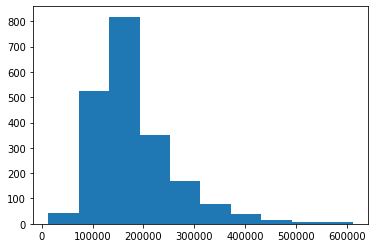

In [33]:
plt.hist(train_full["SalePrice"]);

Categories at the top are most highly correlated and therefore scatterplots of these categories may be best to prioritize in the model (and are evaluated first below).

High priority quantitative features may include:

    a) Overall quality
    b) Total Garage Area
    c) Basement Square Feet

Given the right-skewed distribution of price shown above, log transformation on price improves correlation for a majority of the quantitative variables. Below analysis for each feature leaves price as is to retain interpretability. Modeling will be performed on log-price for improved performance. 

### EDA Order:

    1) Key Quality Metrics
    2) Indoor SF and Space Quality
    3) Garage Features
    4) Construction Years
    5) Number of Rooms and Quality
    6) Indoor Features and Utilities
    7) Building Type and Construction Features
    8) Outdoor Features
    9) Lot Characteristics
    10) Sales Characteristics and Neighborhood

### 1) Key Quality Metrics

    a) Overall Quality
    b) Overall Condition
    c) Functionality

#### 1) Key Quality Metrics: a) Overall Quality

Overall Qual
1      48725.000000
2      51081.000000
3      81309.103448
4     107744.037736
5     134963.644760
6     162891.102767
7     203430.285383
8     271437.044000
9     370197.376623
10    417396.565217
Name: SalePrice, dtype: float64


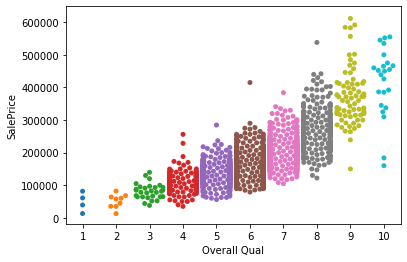

In [4]:
#Plot overall quality vs sales price
fig, ax = plt.subplots()
sns.swarmplot(x = train_full["Overall Qual"], y = train_full["SalePrice"])
print(train_full.groupby(by="Overall Qual")["SalePrice"].mean())

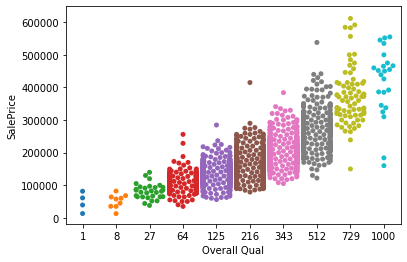

In [9]:
# Plot overall quality cubed vs sales price
fig, ax = plt.subplots()
sns.swarmplot(x = train_full["Overall Qual"] ** 3, y = train_full["SalePrice"])

In [6]:
#Check correlation with sales price for two features above (overall quality and overall quality cubed)
adj = train_full["Overall Qual"] ** 3
print(f'Overall Qual corr: {np.corrcoef(np.log(train_full["SalePrice"]),train_full["Overall Qual"])[0][1]}')
print(f'Overall Qual ^3 corr: {np.corrcoef(train_full["SalePrice"],adj)[0][1]}')

Overall Qual corr: 0.8227742142426637
Overall Qual ^3 corr: 0.8322716874254036


##### Analysis:
The first swarmplot above confirms overall quality rating is strongly correlated with sale price, though at higher ratings the mean tends to increase faster. As such, a swarmplot for quality rating ^ 3 was created and correlation to sales price tested. Correlation of 0.83 compared to appears to be slightly higher though not significantly

#### 1) Key Quality Metrics: b) Overall Condition

Overall Cond
1     59625.000000
2     65364.833333
3     99786.000000
4    114034.571429
5    207055.988870
6    148952.665761
7    155327.270370
8    155913.366337
9    198177.586207
Name: SalePrice, dtype: float64

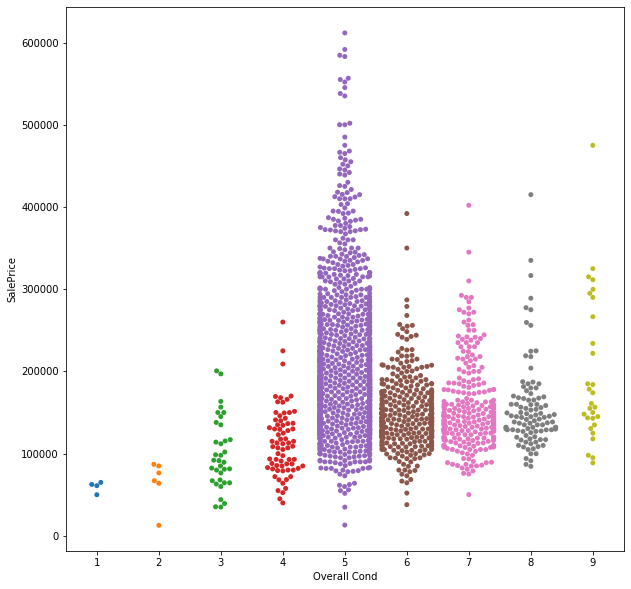

In [7]:
#Plot Overall Condition vs Sales Price
fig, ax = plt.subplots(figsize = (10,10))
sns.swarmplot(x = train_full["Overall Cond"], y = train_full["SalePrice"])
train_full.groupby("Overall Cond")["SalePrice"].mean()

In [41]:
#Overall conditon correlation to overall quality
np.corrcoef(train_full["Overall Qual"],train_full["Overall Cond"])[0][1]

-0.08277041754203525

383044.5257731959

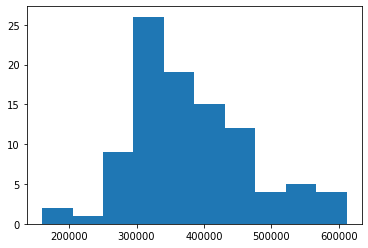

In [42]:
# Test for potential interaction between high Qual score and Cond score = 5
plt.hist(train_full[(train_full["Overall Qual"] > 8) & (train_full["Overall Cond"] == 5)]["SalePrice"])
train_full[(train_full["Overall Qual"] > 8) & (train_full["Overall Cond"] == 5)]["SalePrice"].mean()

Houses with both high qual score and high cond score do not seem to result in higher sales price than for just high qual score alone, so an interaction term is likely not valuable here.

#####  Analysis:
Overall condition seems to be positively correlated with sales price for ratings 5 or less, but ratings over 5 have lower sales price. 

At lower ratings, mean sale price doesn't increase linearly and would likely be best modeled with dummy variables as opposed to one continous independent variable.

Correlation with overall quality is low, so inclusion would not introduce significant multicollinearity.

#### 1) Key Quality Metrics: b) Functionality

Functional
Maj1    163106.166667
Maj2     87157.714286
Min1    154429.761905
Min2    150424.571429
Mod     148108.724138
Sal      31550.000000
Sev      95750.000000
Typ     183954.749347
Name: SalePrice, dtype: float64

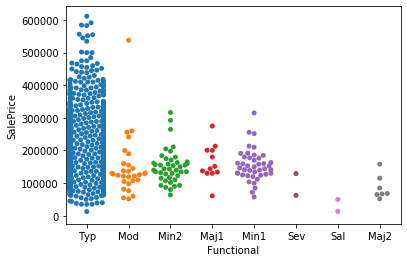

In [43]:
sns.swarmplot(train_full["Functional"], train_full["SalePrice"])

train_full.groupby(by="Functional")["SalePrice"].mean()

##### Functionality Rating Categories:
   
    Typ Typical Functionality
    Min1 Minor Deductions 1
    Min2 Minor Deductions 2
    Mod Moderate Deductions
    Maj1 Major Deductions 1
    Maj2 Major Deductions 2
    Sev Severely Damaged
    Salvage Only

##### Analysis:
Based on the plot above, having a more than minor deductions can significantly lower sales price. The worst functionality ratings in particular have extremely low sales prices and this may be a good way to predict houses with super low prices. 

Minor functionality deductions appear to be slightly lower in price, though not by a significant amount. Dummy variables for 1) Salvage, and 2) severely damaged can be created, with the base case representing all other categories.

### 1) Key Quality Metrics - Summary and Feature Engineering

Overall qual appears to be a strong predictor of sales price with an interpretable linear relationship, while overall cond also is strongly related to sales price, though there is a yet-to-be explained drop in sales price over ratings of 5.

Functionality ratings may be particularly useful at identifying super low priced houses.

In [16]:
#Create dummies for overall quality

train_full = pd.concat([train_full, pd.get_dummies(train_full["Overall Qual"], prefix="Overall_Qual")],axis=1)
test_full = pd.concat([test_full, pd.get_dummies(test_full["Overall Qual"], prefix="Overall_Qual")],axis=1)

train_full.drop(columns="Overall_Qual_1", inplace=True)


In [17]:
#Create dummies for overall condition
train_full = pd.concat([train_full, pd.get_dummies(train_full["Overall Cond"], prefix="Overall Cond")],axis=1)
test_full = pd.concat([test_full, pd.get_dummies(test_full["Overall Cond"], prefix="Overall Cond")],axis=1)


In [18]:
# Create functionality dummies

train_full["Func Maj2 or Sev"] = ((train_full["Functional"]== "Maj2") | 
                                  (train_full["Functional"]== "Sev")).map(lambda x: 1 if x == True else 0)
train_full["Func Salvage"] = (train_full["Functional"]== "Sal").map(lambda x: 1 if x == True else 0)

test_full["Func Maj2 or Sev"] = ((test_full["Functional"]== "Maj2") | 
                                  (test_full["Functional"]== "Sev")).map(lambda x: 1 if x == True else 0)
test_full["Func Salvage"]  = (test_full["Functional"]== "Sal").map(lambda x: 1 if x == True else 0)

### 2) Indoor Square Footage and Space Quality

#### I. Above Ground Area
    a) Gr Liv Area
    b) 1st Flr SF
    c) 2nd Flr SF
    d) 3rd/Other Flr SF

#### II. Basement Area    
    e) Total Bsmt SF
    f) Low Qual Fin SF
    g) Bsmt Fin SF 1
    h) Bsmt Fin SF 2
    i) Bsmt Unf SF 1

#### III. Basement Quality
    j) BsmtFin Type 1
    k) BsmtFin Type 2
    l) Bsmt Quality
    m) Bsmt Condition
    n) Bsmt Exposure
    
#### IV. Interaction With Key Quality Metrics

#### I. Above Ground Living Area:
(excludes bathrooms)


##### a) Gr Liv Area

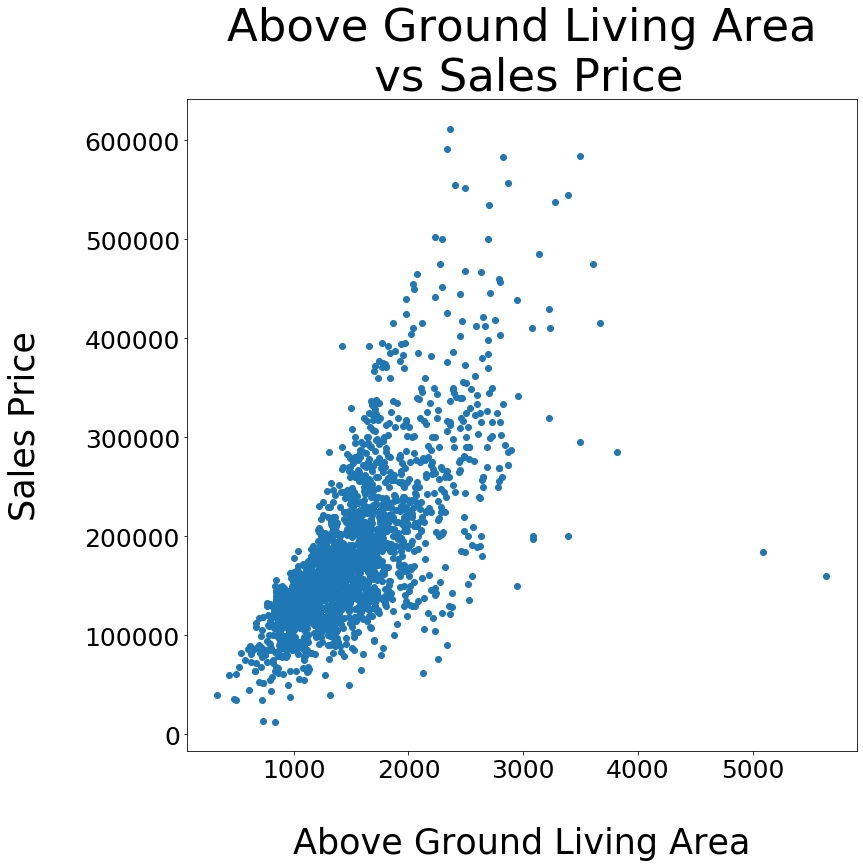

In [10]:
#standard scatterplot for total above ground living area
fig, ax = plt.subplots(figsize = (12,12))
plt.scatter(x = train_full["Gr Liv Area"], y = train_full["SalePrice"])

plt.title("Above Ground Living Area\n vs Sales Price", fontsize=45)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.ylabel("Sales Price\n", fontsize=35)
plt.xlabel("\nAbove Ground Living Area", fontsize=35)
plt.savefig("../Above Ground Living Area.png")

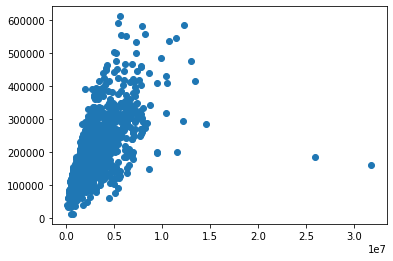

In [45]:
# X^2 transformation
fig, ax = plt.subplots()
plt.scatter(x = (train_full["Gr Liv Area"])**2, y = train_full["SalePrice"])

In [46]:
# Correlations to compare 
print(np.corrcoef(train_full["Gr Liv Area"], train_full["SalePrice"])[0][1])
print(np.corrcoef(train_full["Gr Liv Area"] ** 2, train_full["SalePrice"])[0][1])

0.6970384443056634
0.6296861081373625


##### Analysis:
Above ground living area has a linear relationship with Sale Price but variance in sale price seems to increase at great square footage. However, squaring gr does not increase correlation to sale price.

There are two outliers with extremely high square footage and a much lower than anticipated sales price. These houses also have extremely large listed basement and garage areas, with one having a pool and the other an elevator. minimizing errors in the predictio of prices for these houses will be explored in the model 

##### b) 1st Flr SF

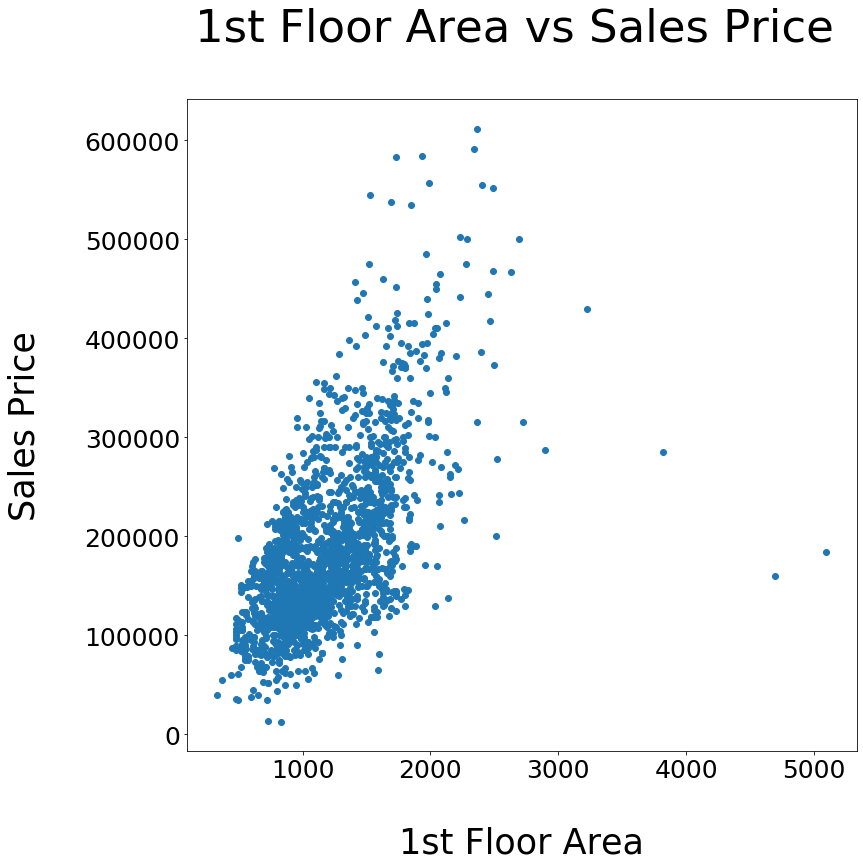

In [804]:
#scatter of 1st Flr SF woth Sale price
fig, ax = plt.subplots(figsize=(12,12))
x = train_full["1st Flr SF"]
y = train_full["SalePrice"]

plt.scatter(x, y)

plt.title("1st Floor Area vs Sales Price \n", fontsize=45)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.ylabel("Sales Price\n", fontsize=35)
plt.xlabel("\n1st Floor Area", fontsize=35)
plt.savefig("../First Floor Area.png")

##### Analysis:
1st floor square feet follows similar trend to total above ground sq feet but a worse correlation. Squaring the 1st floor SF does not seem to improve the strength of the relationship. If included, it may help to also include 2nd floor square feet (analyzed below).

##### c) 2nd Flr SF

Avg Price With 2nd Floor: 
188786.65232558138
Avg Price Without 2nd Floor: 
176186.26112510497


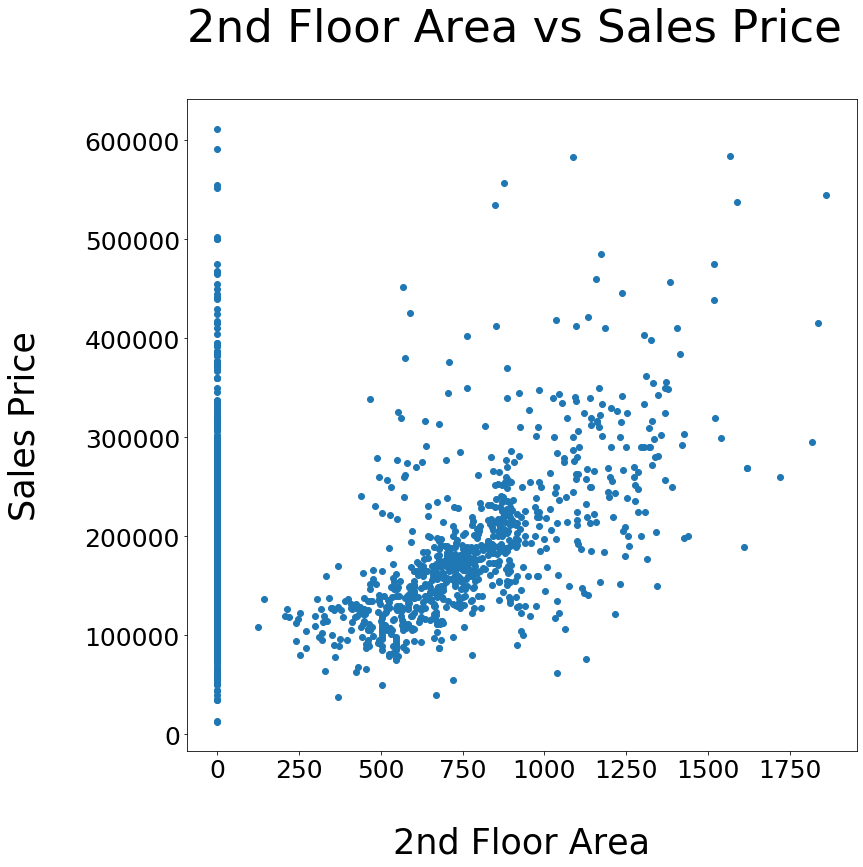

In [803]:
fig, ax = plt.subplots(figsize = (12,12))
plt.scatter(x = train_full["2nd Flr SF"], y = train_full["SalePrice"])

print("Avg Price With 2nd Floor: \n" + str(train_full[train_full["2nd Flr SF"] > 0]["SalePrice"].mean()))
print("Avg Price Without 2nd Floor: \n" + str(train_full[train_full["2nd Flr SF"] == 0]["SalePrice"].mean()))


plt.title("2nd Floor Area vs Sales Price \n", fontsize=45)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.ylabel("Sales Price\n", fontsize=35)
plt.xlabel("\n2nd Floor Area", fontsize=35)
plt.savefig("../2nd Floor Area.png")

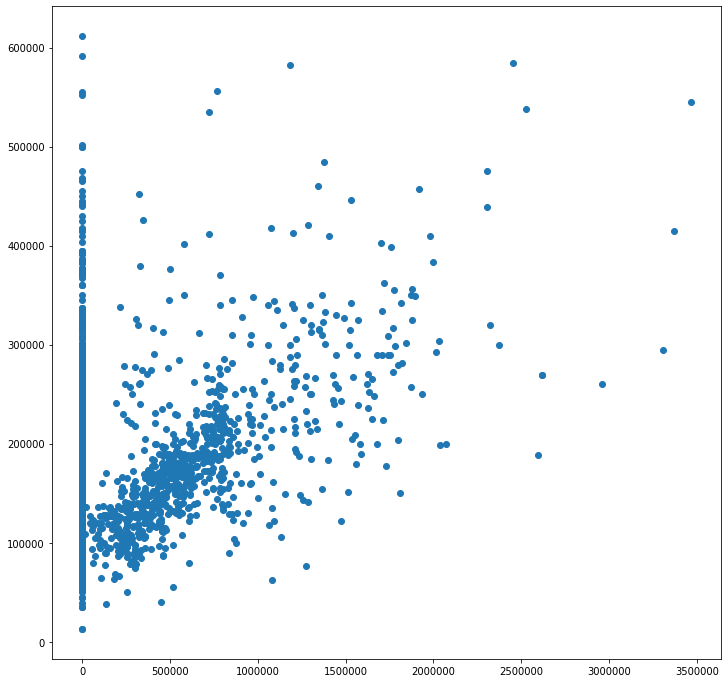

In [53]:
fig, ax = plt.subplots(figsize = (12,12))
plt.scatter(x = train_full["2nd Flr SF"] ** 2, y = train_full["SalePrice"])

##### Analysis:
There are a significant number of homes with no 2nd floor, and those with a second floor have an increasing sales price as sq ft of second floor rises. Inclusion in the model would require separating data into several groups to fit different functions to them. In particular, groups for no second floor and second floor < 500 sq ft would be helpful, with a potentially linear relationship for 2nd floors > 500 sq. ft. That said, there is wide variation in how 2nd floor impacts sales price and therefore it is not a priority feature.

##### d) 3rd/Other Floors SF

No third floor: 182137.26560951438
Third floor: 130198.625


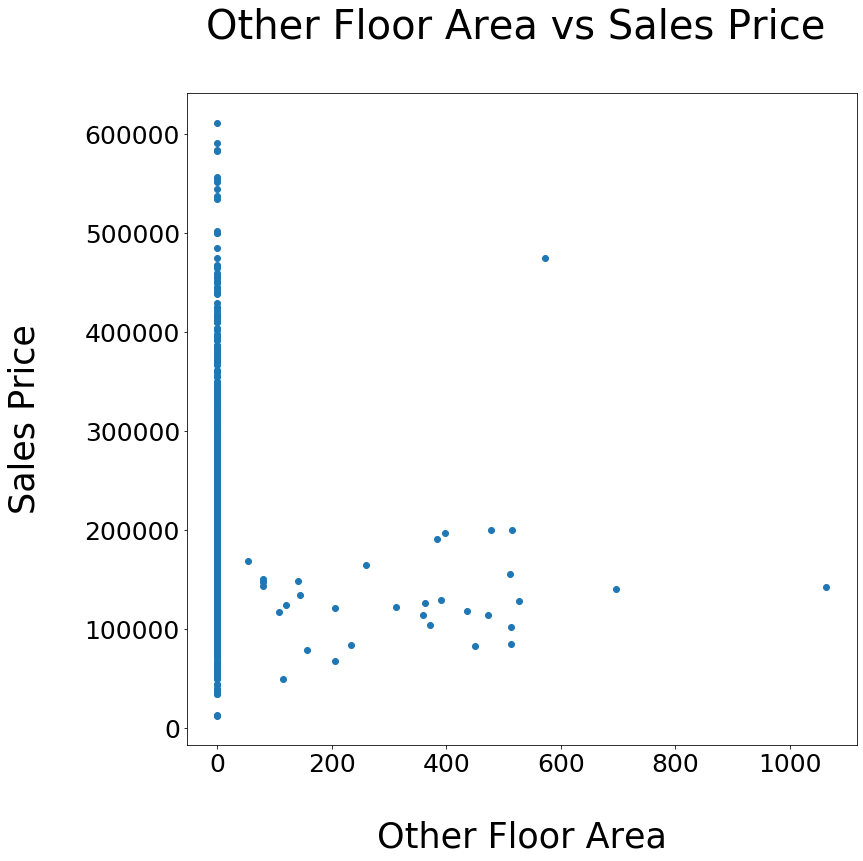

In [802]:
#check if presence of additional floors/space impacts price
floor_3_area = train_full["Gr Liv Area"] - train_full["1st Flr SF"] - train_full["2nd Flr SF"]
plt.subplots(figsize = (12,12))
plt.scatter(x = floor_3_area, y = train_full["SalePrice"])

print("No third floor: " + str(train_full[floor_3_area == 0]["SalePrice"].mean()))
print("Third floor: " + str(train_full[(floor_3_area > 0) & (train_full["SalePrice"] < 400_000)]["SalePrice"].mean()))

plt.title("Other Floor Area vs Sales Price \n", fontsize=40)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.ylabel("Sales Price\n", fontsize=35)
plt.xlabel("\nOther Floor Area", fontsize=35)
plt.savefig("../Other Floor Area.png")

##### Analysis:
Having a 3rd floor seems like it may reduce price with the exception of one outlier. Inclusion in the model could be two dummy variables - one for presence of 3rd floor and a second for the outlier case. The case where both dummy's are = 0 would then represent base case of having no 3rd floor (most of datapoints).

#### II Basement Area

##### e) Total Bsmt SF

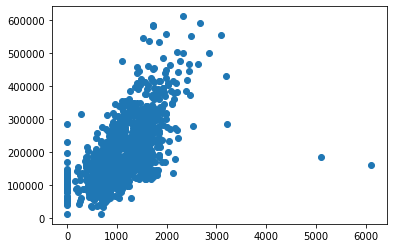

In [60]:
#Basement SF scatter
fig, ax = plt.subplots()
plt.scatter(x = train_full["Total Bsmt SF"], y = train_full["SalePrice"])

In [61]:
#Check to confirm total basement SF is sum of two finished SF measurements (SF 1 and Sf2) and an unfinished SF measurement
train_full["Total Bsmt SF"] - train_full["BsmtFin SF 1"] - train_full["BsmtFin SF 2"] - train_full["Bsmt Unf SF"]

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
11      0.0
12      0.0
13      0.0
14      0.0
15      0.0
16      0.0
17      0.0
18      0.0
19      0.0
20      0.0
21      0.0
22      0.0
23      0.0
24      0.0
25      0.0
26      0.0
27      0.0
28      0.0
29      0.0
       ... 
2021    0.0
2022    0.0
2023    0.0
2024    0.0
2025    0.0
2026    0.0
2027    0.0
2028    0.0
2029    0.0
2030    0.0
2031    0.0
2032    0.0
2033    0.0
2034    0.0
2035    0.0
2036    0.0
2037    0.0
2038    0.0
2039    0.0
2040    0.0
2041    0.0
2042    0.0
2043    0.0
2044    0.0
2045    0.0
2046    0.0
2047    0.0
2048    0.0
2049    0.0
2050    0.0
Length: 2051, dtype: float64

Below is analysis of each component of the total bsmt SF as an alternative to the single measure

191065.3007896626
161155.61398176293


(0, 2000)

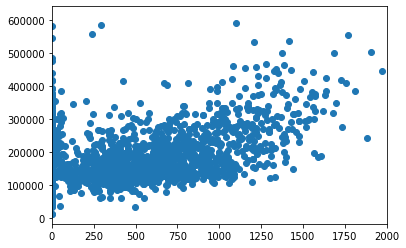

In [62]:
fig, ax = plt.subplots()
plt.scatter(x = train_full["BsmtFin SF 1"], y = train_full["SalePrice"])

print(train_full[train_full["BsmtFin SF 1"] > 0]["SalePrice"].mean())
print(train_full[train_full["BsmtFin SF 1"] == 0]["SalePrice"].mean())

plt.xlim(0,2000)

In [63]:
#Compare correlation with Sales price to total bsmt SF
print(np.corrcoef(train_full["Total Bsmt SF"],train_full["SalePrice"])[0][1])
print(np.corrcoef(train_full["BsmtFin SF 1"],train_full["SalePrice"])[0][1])

0.6293030962146707
0.4238559133946794


Finished bsmt SF type 1 appears to have a positive relationship to price but the correlation is not as strong as with total bsmt SF

Type 2 present: 
171465.82186234818
Type 2 not present: 
182839.41241685144


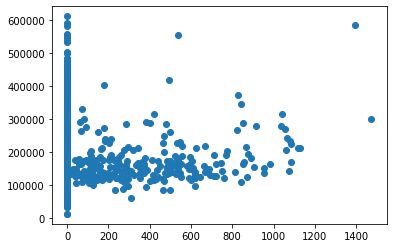

In [65]:
fig, ax = plt.subplots()
plt.scatter(x = train_full["BsmtFin SF 2"], y = train_full["SalePrice"])


print("Type 2 present: \n" + str(train_full[(train_full["BsmtFin SF 2"] > 0)]["SalePrice"].mean()))
print("Type 2 not present: \n" + str(train_full[train_full["BsmtFin SF 2"] == 0]["SalePrice"].mean()))

In [66]:
# Compare correlations
print(np.corrcoef(train_full["Total Bsmt SF"],train_full["SalePrice"])[0][1])
print(np.corrcoef(train_full["BsmtFin SF 2"],train_full["SalePrice"])[0][1])

0.6293030962146707
0.016431693166379054


Bsmt fin type 2 does not have as clear relationships compared to type 1 SF, and may even slightly decrease sale price. Inclusion may be best done as two categories: 0 sq ft vs > 0 sq ft

205503.16911764705
179120.2857142857
143303.6325301205


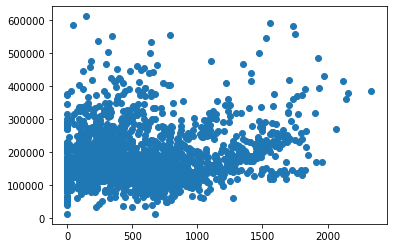

In [67]:
fig, ax = plt.subplots()
plt.scatter(x = train_full["Bsmt Unf SF"], y = train_full["SalePrice"])

print(train_full[(train_full["Bsmt Unf SF"] > 900)]["SalePrice"].mean())
print(train_full[(train_full["Bsmt Unf SF"] > 0) & (train_full["Bsmt Unf SF"] <= 900)]["SalePrice"].mean())
print(train_full[train_full["Bsmt Unf SF"] == 0]["SalePrice"].mean())

For unifinished SF, there is a slightly greater mean price for unfinished basements larger than 900 sq ft though there does not appear to be an obvious linear relationship across all datapoints. So cutoffs used to create categorical variables may be best for this feature

##### Analysis:

Basement SF has a differential impact on pricing depending on whether it is SF 1 or SF 2, and since basements can be finished with different materials, analysis below is on type of finish used on each piece of a basement done to help determine if this is the source of variation. First, a function is created to help visualize the comparison of all options within a variable on one chart.

BsmtFin Type 1
ALQ    164368.017065
BLQ    150107.020000
GLQ    237597.245528
LwQ    153266.921569
Rec    143263.382514
Unf    166155.257048
Name: SalePrice, dtype: float64

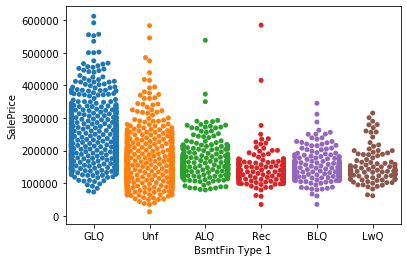

In [11]:
#Evaluate impact of finish types on price
sns.swarmplot(train_full["BsmtFin Type 1"], train_full["SalePrice"])
train_full.groupby(by = "BsmtFin Type 1")["SalePrice"].mean()

BsmtFin Type 2
ALQ    188567.142857
BLQ    156659.020833
GLQ    221300.000000
LwQ    162284.583333
Rec    164538.750000
Unf    185221.284162
Name: SalePrice, dtype: float64

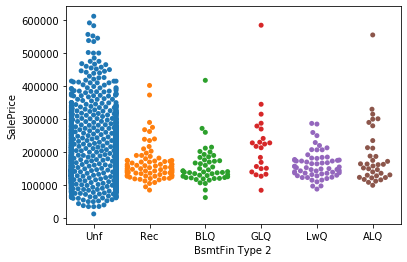

In [12]:
sns.swarmplot(train_full["BsmtFin Type 2"], train_full["SalePrice"])
train_full.groupby(by = "BsmtFin Type 2")["SalePrice"].mean()

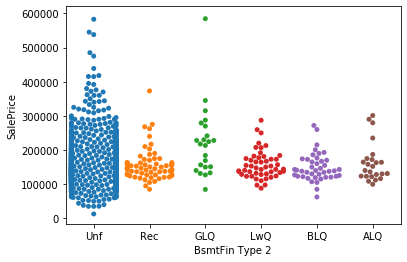

In [13]:
# Filter out type 1 = GLQ to see if additional value can be added by including type 2 finish
sns.swarmplot(train_full[train_full["BsmtFin Type 1"] != "GLQ"]["BsmtFin Type 2"], train_full[train_full["BsmtFin Type 1"] != "GLQ"]["SalePrice"])

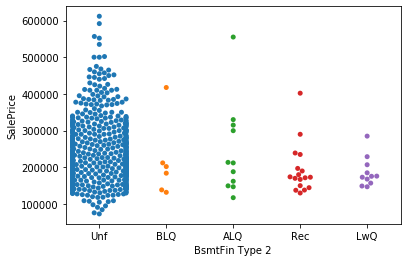

In [14]:
# Filter for only type 1 = GLQ to see if additional value can be added by combining type 1 and type 2 finish
sns.swarmplot(train_full[train_full["BsmtFin Type 1"] == "GLQ"]["BsmtFin Type 2"], train_full[train_full["BsmtFin Type 1"] == "GLQ"]["SalePrice"])

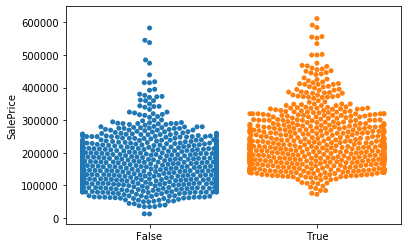

In [15]:
check_GLQ = (train_full["BsmtFin Type 1"] == 'GLQ') | (train_full["BsmtFin Type 2"] == "GLQ")
sns.swarmplot(check_GLQ, train_full["SalePrice"])

##### Analysis:

The only categories that appear to have distributions significantly non overlapping are those without a basement (labeled NA) and those with the GLQ finish.

Difference in impact on price seems to be larger for type 1 than type 2. If included in the model, 1 dummy variable for presence of GLQ finish could be used.

In the third plot above, type 2 data is filtered to exclude or include type 1 = GLQ. There are a variety of basements with GLQ type 2, but not type 1, and these houses similarly have higher prices. By creating a dummy variable for GLQ in either type 1 or type 2, we may better capture the benefit of having a GLQ type basement.

NA/no basement would be accounted for in dummy variables for basement SF features.

#### f) Low Quality Finished SF:

includes both above and below ground SF

Some Low Quality SF: 
140647.15151515152
No Low Quality SF: 
182137.26560951438


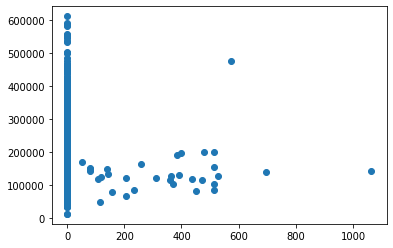

In [73]:
#Low Quality Finished SF scatter
fig, ax = plt.subplots()
plt.scatter(x = train_full["Low Qual Fin SF"], y = train_full["SalePrice"])

print("Some Low Quality SF: \n" + str(train_full[train_full["Low Qual Fin SF"] > 0]["SalePrice"].mean()))
print("No Low Quality SF: \n" + str(train_full[train_full["Low Qual Fin SF"] == 0]["SalePrice"].mean()))

Similar to having a 3rd floor, low quality SF also seems to reduce average price relative to no low quality SF

#### Final indoor SF analysis:

Combinations of various indoor SF measurements are done to prioritize which should be included together

0.7052700682557984

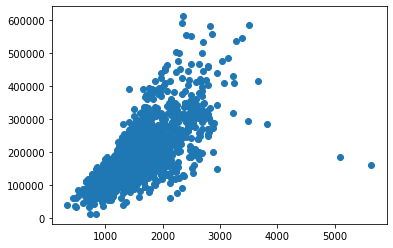

In [74]:
#Check combinations of various SF measurements and impact on correlation to Sale Price

#Combined 1st and 2nd floor SF and remove negative impact of 3rd/other floor SF:
first_second_sf = train_full["1st Flr SF"] + train_full["2nd Flr SF"]
plt.scatter(first_second_sf, train_full["SalePrice"])
np.corrcoef(first_second_sf, train_full["SalePrice"])[0][1]

if instead of looking at total above ground SF, we look tat the combo of just 1st and 2ns floor SF (both of which are positively correlated to price), there is a slight improvement in correlation to Sales Price given 3rd floor space (negatively impact on price) is removed

In [75]:
#Add in basement square footage
first_second_sf = train_full["1st Flr SF"] + train_full["2nd Flr SF"] + train_full["Total Bsmt SF"]
np.corrcoef(first_second_sf, train_full["SalePrice"])[0][1]

0.7831078222221798

Adding in total bsmt SF (the basement SF measure with highest correlation) dramatically improves correlation with sales price to 0.78

In [76]:
#Subtract low quality square footage
first_second_sf = train_full["1st Flr SF"] + train_full["2nd Flr SF"] + train_full["Total Bsmt SF"] - train_full["Low Qual Fin SF"]
np.corrcoef(first_second_sf, train_full["SalePrice"])[0][1]

0.78369169932969

subtracting low quality SF does not appear to significantly improve correlation to sales price

#### III. Basement Quality

In addition to basement SF, data also contains ratings for features of each unit's basement (Quality, Condition, and Exposure), which are evaluated below

##### l) Bsmt Qual

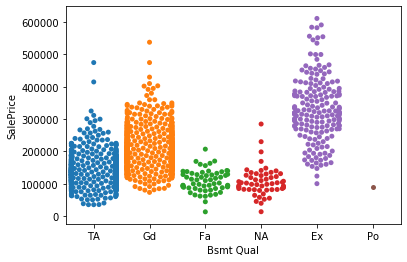

In [77]:
sns.swarmplot(train_full["Bsmt Qual"], train_full["SalePrice"])

Ranking categories include:
Excellent, Good, Average, Fair, Poor, and NA

There is an extremely strong difference in sales price predicted by having an excellent basement vs all other ratings and 

##### m) Bsmt Condition

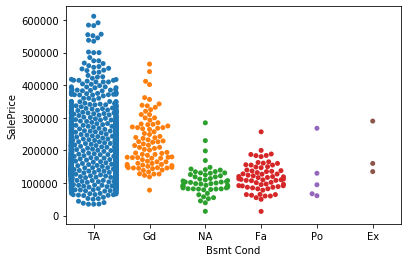

In [79]:
sns.swarmplot(train_full["Bsmt Cond"], train_full["SalePrice"])

##### n) Bsmt Exposure

sns.swarmplot(train_full["Bsmt Exposure"], train_full["SalePrice"])

##### Analysis:
Basement condition and exposure demontsrate weaker differentiation among categories in distribution of sales price, but in general, sales price still increases as the rating within condition and exposure improves.

It's possible that improved differentation can be achieved by combining these ratings into one overall basement rating. This analysis is done below

In [80]:
#map basement ratings to 1-5 scale
bsmt_qual_dict = {"NA" : 0.0, "Po" : 1.0, "Fa" : 2.0, "TA" : 3.0, "Gd" : 4.0, "Ex" : 5.0}
bsmt_expos_dict = {"NA" : 0.0, "No" : 1.0, "Mn" : 2.0, "Av" : 3.0, "Gd" : 4.0}

bsmt_qual_rating = train_full["Bsmt Qual"].map(bsmt_qual_dict)
bsmt_cond_rating = train_full["Bsmt Cond"].map(bsmt_qual_dict)
bsmt_exposure_rating = train_full["Bsmt Exposure"].map(bsmt_expos_dict)

0.0    106341.345455
3.0     77887.500000
4.0     96019.266667
5.0    118466.954545
6.0    140183.450790
7.0    201503.058824
8.0    305137.066038
9.0    297931.761905
Name: SalePrice, dtype: float64

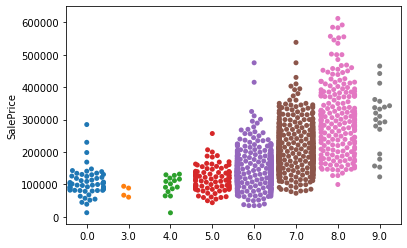

In [81]:
# sum basement quality and condition and plot relationship to sales price
sns.swarmplot(bsmt_qual_rating + bsmt_cond_rating, train_full["SalePrice"])

train_full.groupby(by = bsmt_qual_rating + bsmt_cond_rating)["SalePrice"].mean()

In [83]:
# check correlation to sales price
np.corrcoef((bsmt_qual_rating + bsmt_cond_rating), train_full["SalePrice"])[0][1]

0.508521416494737

In [84]:
# Given mean price among ratings increased faster at higher levels,
# ratings are squared to check for impact on correlation
np.corrcoef((bsmt_qual_rating + bsmt_cond_rating) ** 2, train_full["SalePrice"])[0][1]

0.6250204911745834

In [85]:
# Interaction between bsmt quality and total SF evaluated
np.corrcoef(((bsmt_qual_rating + bsmt_cond_rating) * train_full["Total Bsmt SF"]), train_full["SalePrice"])[0][1]

0.7158977054177884

##### Analysis:

There seems to be a strong positive relationship betwen the sum of a basements quality and condition ratings. Given that ratings 0-4 and 8-9 are similar, these could be grouped together when included in the model.

Correlation with price is higher when this sum is squared, and even higher when interacted with total Bsmt SF. Interacting overall quality with presence of basement type GLQ does not seem to have a big impact on further distinguishing low and high priced houses.

0.0     106341.345455
4.0      83516.666667
5.0      93906.846154
6.0     117179.900000
7.0     137699.218524
8.0     189547.706960
9.0     207413.250000
10.0    212225.422907
11.0    249761.668919
12.0    347421.382716
13.0    421104.000000
Name: SalePrice, dtype: float64

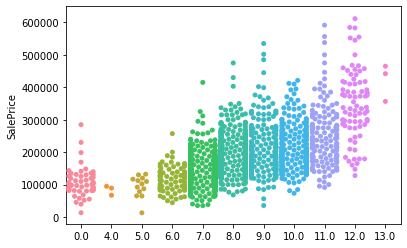

In [86]:
# add basement exposure ratings and replot
sns.swarmplot(bsmt_qual_rating + bsmt_cond_rating + bsmt_exposure_rating, train_full["SalePrice"])

train_full.groupby(by = bsmt_qual_rating + bsmt_cond_rating + bsmt_exposure_rating)["SalePrice"].mean()

In [87]:
#repreat correlation measurements as above with exposure ratings added
np.corrcoef((bsmt_qual_rating + bsmt_cond_rating + bsmt_exposure_rating), train_full["SalePrice"])[0][1]

0.5593173919470049

Adding in basement exposure appears to have similar results to leaving out exposure rating and may not be worth including in the model

#### IV. Interaction With Key Quality Metrics

In [90]:
np.corrcoef(first_second_sf * (train_full["Overall Qual"]), train_full["SalePrice"])[0][1]

0.8639030928822842

In [91]:
np.corrcoef(first_second_sf * (train_full["Overall Cond"]), train_full["SalePrice"])[0][1]

0.6617741763683833

In [92]:
np.corrcoef((first_second_sf + train_full["Total Bsmt SF"]) * (train_full["Overall Qual"]), train_full["SalePrice"])[0][1]

0.8470406789483058

In [93]:
np.corrcoef((first_second_sf + train_full["Total Bsmt SF"]) * (train_full["Overall Cond"]), train_full["SalePrice"])[0][1]

0.6563800920664737

##### Analysis:

Correlations above test interaction terms between overall 1) Quality and Overall Condition and 2) first_and_second_sf measurements +/- total bsmt SF.

Given overall quality is a more powerful predictor of sales price, correlations including this feature are higher. Correlation is also slightly higher when square footage only includes the above ground calculation

### 2) Indoor SF and Quality Summary and Feature Engineering

##### Relationship of indoor SF measurements to price:
      
Of 9 SF measurements analyzed, 6 (Gr Liv Area, 1st and 2nd flr SF, Total Bsmt SF, Bsmt Fin 1 SF, and Bsmt Unf SF) are positively related to price while 3 are negatively related (3rd floor, Bsmt Fin 2, and Low Qual Finished SF). As such, a combination of most of different types of SF are useful for incorporation into the model.

For above ground SF, since Gr liv area includes both 1st and 2nd floor (positive correlation) as well as 3rd floor SF (negative correlation), it's preferrable to separate out these impacts on price by using the individual 1st and 2nd floor SF features and a 3rd/other floor feature. Doing so increased correlation with SalePrice from .69 to .78

In basement SF, even though different components of SF seem to have different impacts on Sales Price, initial feature enginering didn't reveal an ideal way to model these components separately and improve upon correlation strength with sales price. However, incorporation of bsmt finish type and presence of bsmt type 2 is worth testing. 

##### Impact of quality features:

Basement quality, condition, and exposure as distinct variables have limited meaningiful differences in sales price distribution among the categories/ratings. When converted to a 1-5 scale and added together, basement quality + condition demonstrates a potentially stronger relationship.

Further, when this combined quality score is interacted with total bsmt SF, the resulting correlation is also quite high and could provide a valuable feature.

When evaulating the interaction of other quality metrics with square footage, overall quality + adjusted 1st and 2nd floor square footage has a high correlation with sales price and may be worth including as a feature.

In [19]:
#quality * indoor SF interaction
train_full["Overall Qual * Indoor SF"] = train_full["Overall Qual"] * train_full["1st_2nd_Bsmt_SF"]
test_full["Overall Qual * Indoor SF"] = test_full["Overall Qual"] * test_full["1st_2nd_Bsmt_SF"]

KeyError: '1st_2nd_Bsmt_SF'

In [ ]:
# Basement Quality Variables
# Bsmt 6-8 is best

#map basement ratings to 1-5 scale
bsmt_qual_dict = {"NA" : 0.0, "Po" : 1.0, "Fa" : 2.0, "TA" : 3.0, "Gd" : 4.0, "Ex" : 5.0}
bsmt_expos_dict = {"NA" : 0.0, "No" : 1.0, "Mn" : 2.0, "Av" : 3.0, "Gd" : 4.0}

train_full["Bsmt Qual Rating"] = train_full["Bsmt Qual"].map(bsmt_qual_dict)
test_full["Bsmt Qual Rating"] = test_full["Bsmt Qual"].map(bsmt_qual_dict)

train_full["Bsmt Cond Rating"] = train_full["Bsmt Cond"].map(bsmt_qual_dict)
test_full["Bsmt Cond Rating"] = test_full["Bsmt Cond"].map(bsmt_qual_dict)

train_full["Bsmt Expos Rating"] = train_full["Bsmt Exposure"].map(bsmt_expos_dict)
test_full["Bsmt Expos Rating"] = test_full["Bsmt Exposure"].map(bsmt_expos_dict)

train_full["Bsmt_Total_Rating"] = train_full["Bsmt Qual Rating"] + train_full["Bsmt Cond Rating"]
test_full["Bsmt_Total_Rating"] = test_full["Bsmt Qual Rating"] + test_full["Bsmt Cond Rating"]

train_full["Bsmt_Rating_8+"] = (train_full["Bsmt_Total_Rating"] >= 8).map(lambda x: 1 if x == True else 0)
train_full["Bsmt_Rating_7"] = (train_full["Bsmt_Total_Rating"] == 7).map(lambda x: 1 if x == True else 0)
train_full["Bsmt_Rating_6"] = (train_full["Bsmt_Total_Rating"] == 6).map(lambda x: 1 if x == True else 0)
train_full["Bsmt_Rating_<5"] = (train_full["Bsmt_Total_Rating"] <= 5).map(lambda x: 1 if x == True else 0)

test_full["Bsmt_Rating_8+"] = (test_full["Bsmt_Total_Rating"] >= 8).map(lambda x: 1 if x == True else 0)
test_full["Bsmt_Rating_7"] = (test_full["Bsmt_Total_Rating"] == 7).map(lambda x: 1 if x == True else 0)
test_full["Bsmt_Rating_6"] = (test_full["Bsmt_Total_Rating"] == 6).map(lambda x: 1 if x == True else 0)
test_full["Bsmt_Rating_<5"] = (test_full["Bsmt_Total_Rating"] <= 5).map(lambda x: 1 if x == True else 0)

train_full["Bsmt_Total_Rating ^2"] = train_full["Bsmt_Total_Rating"] ** 2
test_full["Bsmt_Total_Rating ^2"] = test_full["Bsmt_Total_Rating"] ** 2

train_full["Bsmt_Total_Rating * Bsmt SF"] = train_full["Bsmt_Total_Rating"] * train_full["Total Bsmt SF"]
test_full["Bsmt_Total_Rating * Bsmt SF"] = test_full["Bsmt_Total_Rating"] * test_full["Total Bsmt SF"]



In [20]:
#Basement quality dummies

train_full["GLQ Basement"] = train_full["BsmtFin Type 1"].map(lambda x: 1 if x=="GLQ" else 0)

test_full["GLQ Basement"] = test_full["BsmtFin Type 1"].map(lambda x: 1 if x=="GLQ" else 0)

In [21]:
#log of indoor SF measurements and remove outliers

train_full["Log 1st Flr SF"] = np.log(train_full["1st Flr SF"] + 1)
train_full["Log 2nd Flr SF"] = np.log(train_full["2nd Flr SF"] + 1)
train_full["Log Total Bsmt SF"] = np.log(train_full["Total Bsmt SF"] + 1)

test_full["Log 1st Flr SF"] = np.log(test_full["1st Flr SF"] + 1)
test_full["Log 2nd Flr SF"] = np.log(test_full["2nd Flr SF"] + 1)
test_full["Log Total Bsmt SF"] = np.log(test_full["Total Bsmt SF"] + 1)

train_full["Large 1st Floor"] = train_full["1st Flr SF"].map(lambda x: 1 if x > 3_500 else 0)
train_full["Large Basement"] = train_full["Total Bsmt SF"].map(lambda x: 1 if x > 5_000 else 0)

test_full["Large 1st Floor"] = test_full["1st Flr SF"].map(lambda x: 1 if x > 3_500 else 0)
test_full["Large Basement"] = test_full["Total Bsmt SF"].map(lambda x: 1 if x > 5_000 else 0)

train_full["Log 1st Flr SF adj"] = train_full["Log 1st Flr SF"] * train_full["Large 1st Floor"]

train_full["Log Total Bsmt SF adj"] = train_full["Log Total Bsmt SF"] * train_full["Large Basement"]

test_full["Log 1st Flr SF adj"] = test_full["Log 1st Flr SF"] * test_full["Large 1st Floor"]

test_full["Log Total Bsmt SF adj"] = test_full["Log Total Bsmt SF"] * test_full["Large Basement"]

### 3) Garage Features

Variables analyzed include:

    a) Garage cars: number of car slots
    b) Garage area: area in SF
    c) Garage Type: location relative to house
    d) Garage Year Built
    e) Garage Finish: Options include finished, rough finished, unfinished
    f) Garage quality
    g) Garage condition

##### 3) Garage Features - a) Garage Cars

Garage Cars
0.0    106065.991228
1.0    126824.591603
2.0    184125.956866
3.0    309382.745247
4.0    229653.846154
5.0    126500.000000
Name: SalePrice, dtype: float64


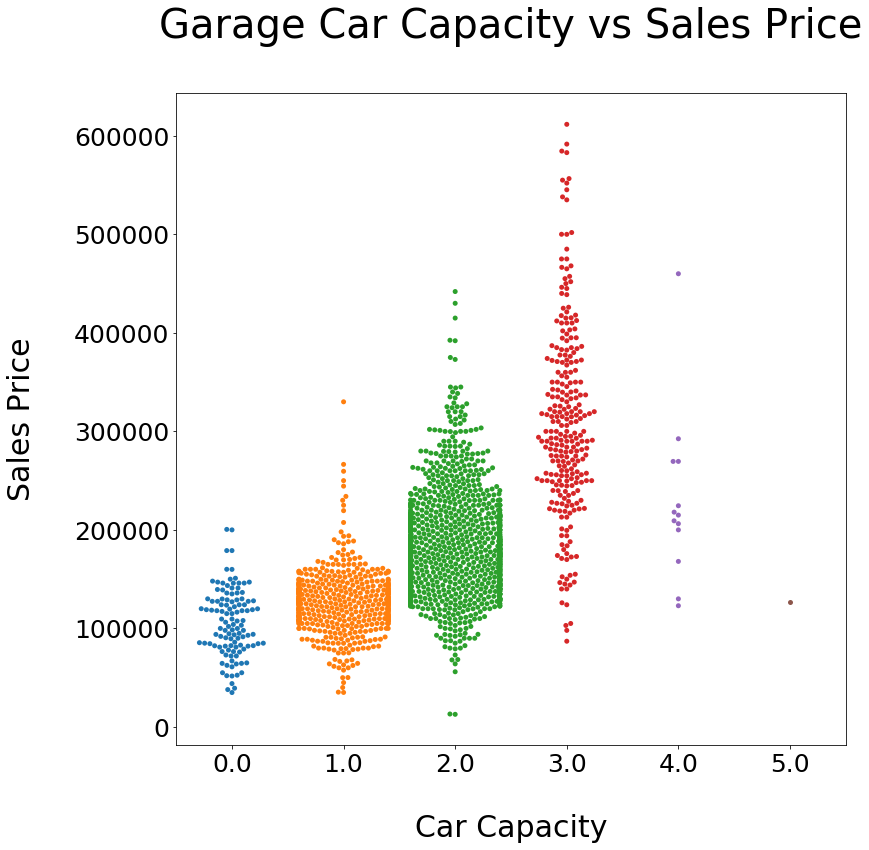

In [817]:
fig, ax = plt.subplots(figsize = (12,12))
sns.swarmplot(x = train_full["Garage Cars"], y = train_full["SalePrice"])
print(train_full.groupby(by="Garage Cars")["SalePrice"].mean())
plt.title("Garage Car Capacity vs Sales Price\n", fontsize=40)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.ylabel("Sales Price\n", fontsize=30)
plt.xlabel("\nCar Capacity", fontsize=30)
plt.savefig("../Garage Cars vs Price.png")

##### Analysis:

from 0-3 cars, price appears to most strongly corrleated with garage cars squared. However, since sample size of units with 4 or 5 car garages is small, sale prices appear to be lower for these houses.

This can be dealt with by recoding Garage Cars as dummy variables with 3-5 cars grouped together as one category (pending outlier analysis to determine if there is a reason for price declines with 4+ car garages).

##### 3) Garage Features - b) Garage Area

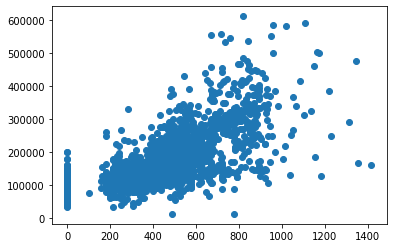

In [97]:
fig, ax = plt.subplots()
plt.scatter(x = train_full["Garage Area"], y = train_full["SalePrice"])

In [98]:
print(np.corrcoef(train_full["Garage Area"],train_full["SalePrice"])[0][1])
print(np.corrcoef(np.log(train_full[train_full["Garage Area"] > 0]["Garage Area"]),
                  np.log(train_full[train_full["Garage Area"] > 0]["SalePrice"]))[0][1])

0.6498968496618989
0.6209172018820658


In [99]:
np.corrcoef(train_full["Garage Cars"], train_full["Garage Area"])[0][1]

0.893441569447665

##### Analysis:
Garage Area tends to have a positive linear relationship to Sale Price. Because Garage Area is highly correlated to Garage Cars, the latter of which appears to be a better predictor, this may not be necessary to include in the model as it risks high coefficients due to multicollinearity.

##### 3) Garage Features - c) Garage Type

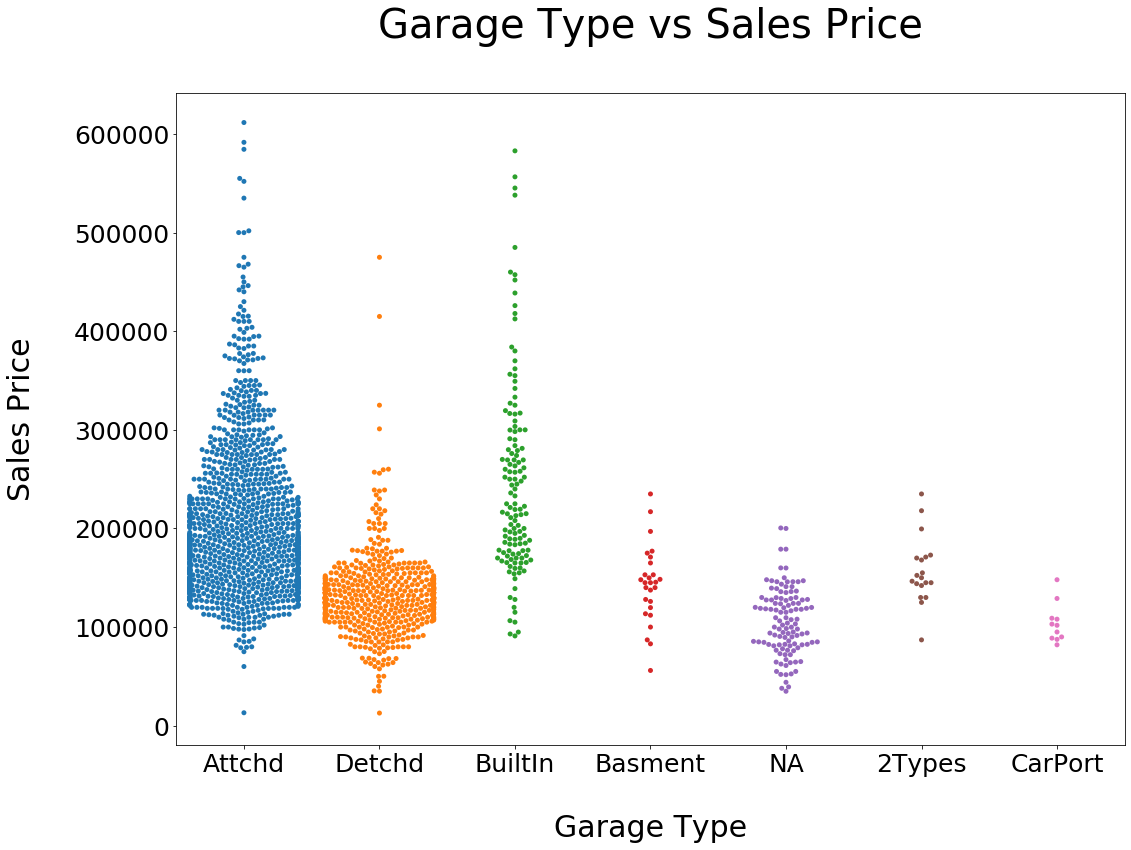

In [816]:
plt.subplots(figsize=(17,12))
sns.swarmplot(train_full["Garage Type"], train_full["SalePrice"])

plt.title("Garage Type vs Sales Price\n", fontsize=40)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.ylabel("Sales Price\n", fontsize=30)
plt.xlabel("\nGarage Type", fontsize=30)
plt.savefig("../Garage Type vs Price.png")

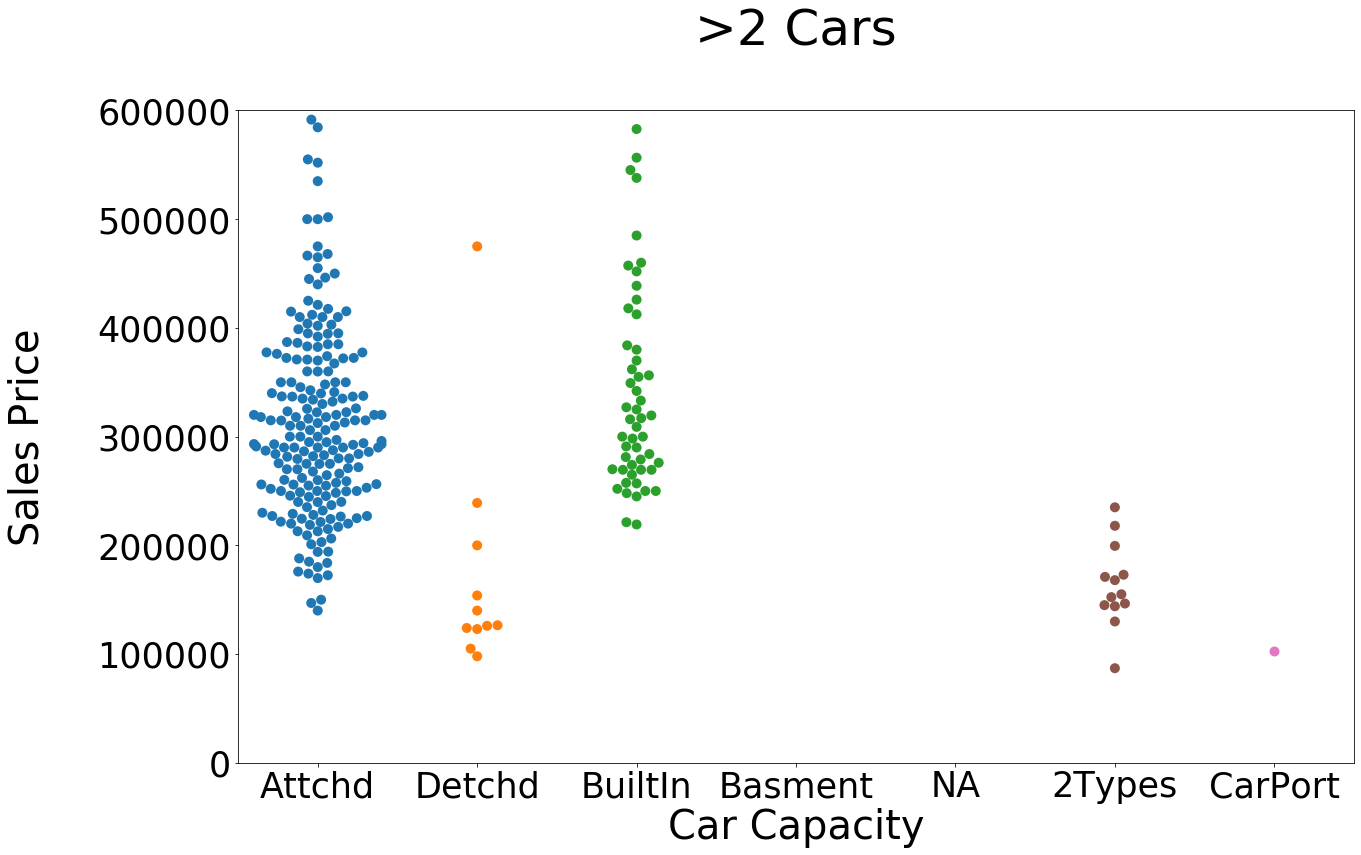

In [848]:
# filter for garages with > 2 car capacity
plt.subplots(figsize=(20,12))
sns.swarmplot(train_full[(train_full["Garage Cars"] > 2)]["Garage Type"],
              train_full[(train_full["Garage Cars"] > 2)]["SalePrice"], s=10, order = ["Attchd", "Detchd", "BuiltIn",
                                                                                      "Basment", "NA", "2Types", "CarPort"])

plt.ylim(0,600_000)

plt.title(">2 Cars\n", fontsize=50)
plt.yticks(fontsize=35)
plt.xticks(fontsize=35)
plt.ylabel("Sales Price\n", fontsize=40)
plt.xlabel("Car Capacity", fontsize=40)
plt.savefig("../Garage 3+ Cars Type.png")

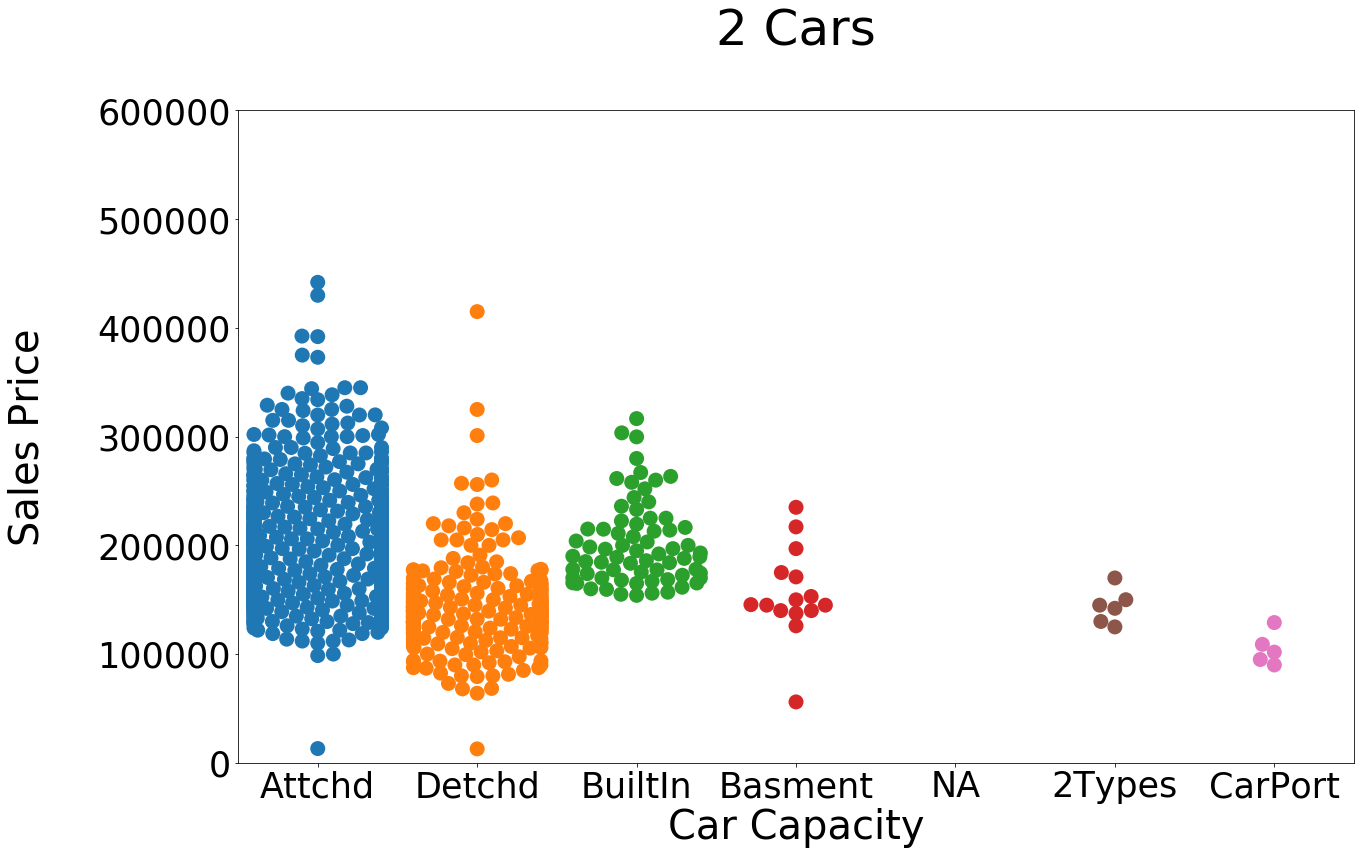

In [849]:
# filter for garages with = 2 car capacity
plt.subplots(figsize=(20,12))
sns.swarmplot(train_full[(train_full["Garage Cars"] == 2)]["Garage Type"],
              train_full[(train_full["Garage Cars"] == 2)]["SalePrice"], s = 15, order = ["Attchd", "Detchd", "BuiltIn",
                                                                                      "Basment", "NA", "2Types", "CarPort"])

plt.ylim(0,600_000)

plt.title("2 Cars\n", fontsize=50)
plt.yticks(fontsize=35)
plt.xticks(fontsize=35)
plt.ylabel("Sales Price\n", fontsize=40)
plt.xlabel("Car Capacity", fontsize=40)
plt.savefig("../2 Cars Type.png")

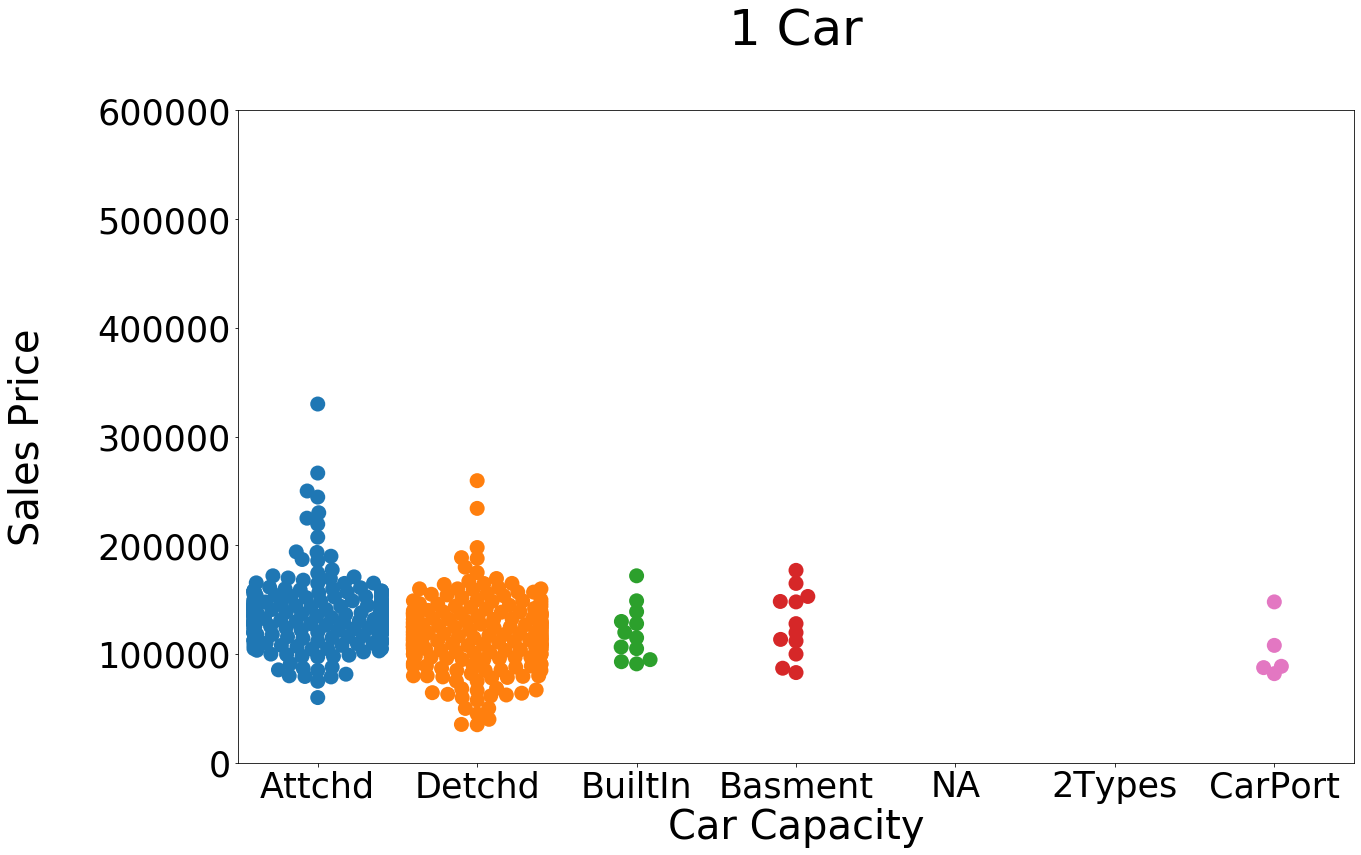

In [850]:
# filter for garages with 1 car capacity
plt.subplots(figsize=(20,12))
sns.swarmplot(train_full[(train_full["Garage Cars"] == 1)]["Garage Type"],
              train_full[(train_full["Garage Cars"] == 1)]["SalePrice"], s = 15, order = ["Attchd", "Detchd", "BuiltIn",
                                                                                      "Basment", "NA", "2Types", "CarPort"])

plt.ylim(0,600_000)

plt.title("1 Car\n", fontsize=50)
plt.yticks(fontsize=35)
plt.xticks(fontsize=35)
plt.ylabel("Sales Price\n", fontsize=40)
plt.xlabel("Car Capacity", fontsize=40)
plt.savefig("../1 Cars Type.png")

##### Analysis:
Impact of garage type on sale price does not appear to be extremely strong, but there could be three distinct groups of low (NA and CarPort), high (Attchd, BuiltIn) and medium (all others)

the second and third plots above filter for only garages with capacity of over 2 or under 2 cars. This does a good job of isolating high priced houses from low priced houses based on garage features, suggesting that an interaction term between garage type and garage cars may be useful.

##### 3) Garage Features - d) Garage Year Built

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100]),
 <a list of 101 Text xticklabel objects>)

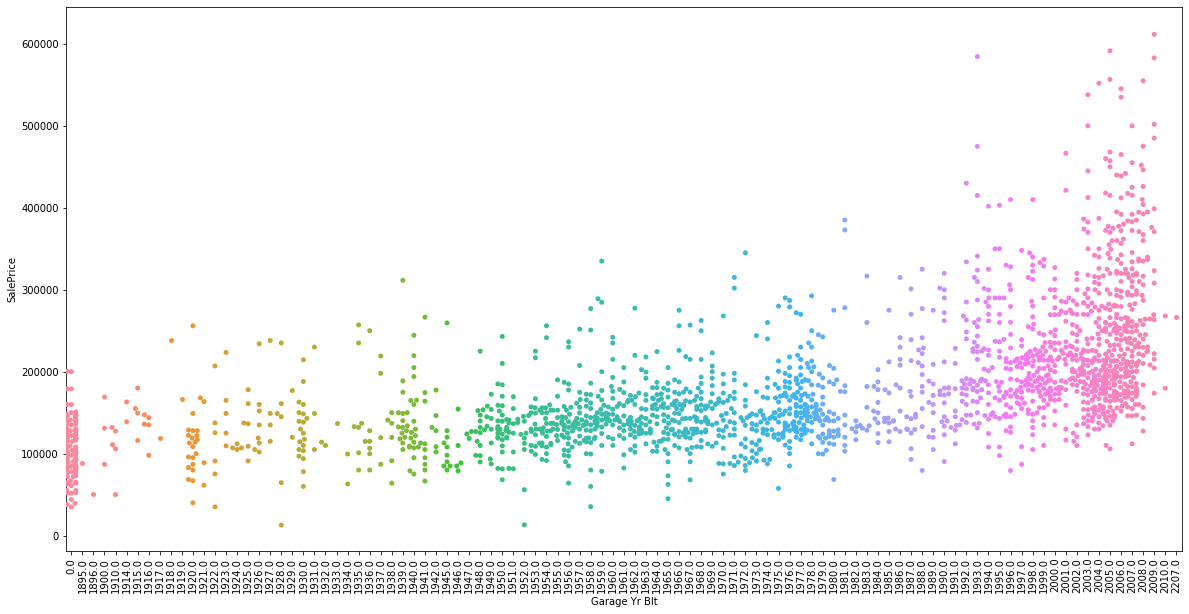

In [852]:
fig, ax = plt.subplots(figsize = (20,10))
sns.swarmplot(train_full["Garage Yr Blt"], train_full["SalePrice"])
plt.xticks(rotation = 90)

##### Analysis:
Garage year built follows almost exactly the same trend as the year of building/last remdeling for the entire hose, and is likely not marginally valuable

##### 3) Garage Features - e) Garage Garage Finish

Garage Finish
Fin        239800.664047
Missing    150909.000000
NA         105669.150442
RFn        204792.036269
Unf        140718.148410
Name: SalePrice, dtype: float64

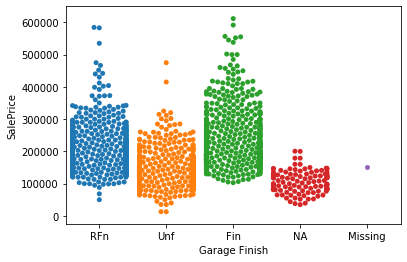

In [383]:
sns.swarmplot(train_full["Garage Finish"],train_full["SalePrice"])
train_full.groupby(by="Garage Finish")["SalePrice"].mean()

Garage Finish
Fin        272395.375000
Missing    150909.000000
NA         105669.150442
RFn        257655.555556
Unf        120635.284091
Name: SalePrice, dtype: float64

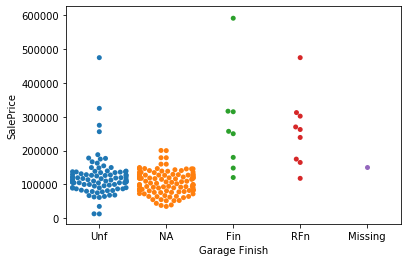

In [386]:
sns.swarmplot(train_full[train_full["Garage Qual"] != "TA"]["Garage Finish"],
              train_full[train_full["Garage Qual"] != "TA"]["SalePrice"])
train_full[train_full["Garage Qual"] != "TA"].groupby(by="Garage Finish")["SalePrice"].mean()

##### Analysis:

As with other categories, having no garage seems to be correlated with a slightly decreased sales price, whereas having a finished garage appears to lead to a higher sales price 

##### 3) Garage Features - f)Garage Quality

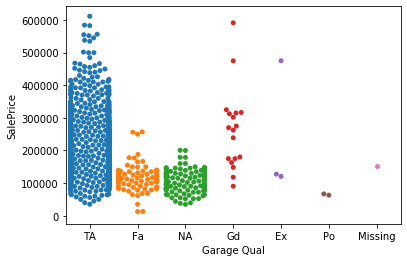

In [109]:
sns.swarmplot(train_full["Garage Qual"],train_full["SalePrice"])

Options for Garage Quality Are As Follows:
Ex Excellent
Gd Good
TA Typical/Average
Fa Fair
Po Poor
NA No Garage

It is interesting that excellent and good garages may have a greater average sales price than others, but the distribution is much more spread out. As such, this feature alone may not be super useful (especially given that the impact of having no garage can be incorporated with other features).

##### 3) Garage Features - g) Garage Condition

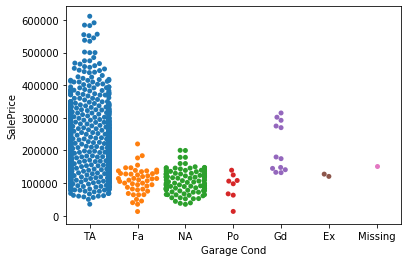

In [110]:
sns.swarmplot(train_full["Garage Cond"],train_full["SalePrice"])

In [111]:
train_full[train_full["Garage Cond"] == "Ex"]

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
412   1549  910203020           30        RM          71.0      6900   Pave   
2000   602  534276040           20        RL          70.0      9100   Pave   

                   Alley Lot Shape Land Contour  ... Misc Feature Misc Val  \
412   NA No alley access       Reg          Lvl  ...           NA        0   
2000  NA No alley access       Reg          Lvl  ...         Shed      450   

     Mo Sold Yr Sold Sale Type SalePrice Missing Lot Frontage  \
412        2    2008       WD     120500                    0   
2000      10    2009       WD     127500                    0   

     Missing Mas Vnr Area  log_price  Outliers  
412                     0  11.699405            
2000                    0  11.755872            

[2 rows x 85 columns]

Options for Garage Quality Are As Follows:

    Ex Excellent

    Gd Good

    TA Typical/Average

    Fa Fair

    Po Poor

    NA No Garage

##### Analysis
Compared to garage quality, this appears to be a slightly more logical distribution with Average and Good rated garages having higher prices than others. There are only two garages with an excellent condition rating and these fall within the distribution of "good" rated garages and therefore do not appear to be outliers  

##### 3) Garage Features - h) Paved Driveway

Paved Drive
N    104562.827815
P    129824.461538
Y    188792.163890
Name: SalePrice, dtype: float64

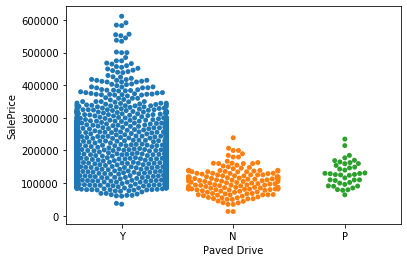

In [112]:
sns.swarmplot(train_full["Paved Drive"],train_full["SalePrice"])
train_full.groupby(train_full["Paved Drive"])["SalePrice"].mean()

##### Analysis:

Having a paved driveway slightly increases sales price relative to not paved, but this is not a large enough difference to be a strong feature alone.

Below analysis explores a combination of garage quality features that treats categorical variables as discrete and ordered/nominal

In [22]:
#map garage quality ratings to 1-5 scale
garage_fin_dict = {"NA" : 0, "Unf" : 1, "RFn" : 3, "Fin" : 5, "Missing" : 3}
garage_cond_dict = {"NA" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5, "Missing" : 3}
paved_dict = {"N" : 1, "P" : 3, "Y" : 5}
garage_type_dict = {"NA" : 0, "CarPort" : 1, "Detchd" : 2, 
                    "BuiltIn" : 3, "Basment" : 3, "Attchd" : 4, "2Types" : 5}

garage_fin_rating = train_full["Garage Finish"].map(garage_fin_dict)
garage_cond_rating = train_full["Garage Qual"].map(garage_cond_dict)
garage_paved_rating = train_full["Paved Drive"].map(paved_dict)
garage_type_rating = train_full["Garage Type"].map(garage_type_dict)


1      94074.307692
3      98833.333333
5     114704.166667
6     101676.083333
7     113023.296296
8      90832.555556
9     114768.192308
10    122802.380952
11    136625.320955
12    142492.307692
13    158814.958466
14    211514.415094
15    205237.617357
16    252261.175926
17    239188.612245
18    285517.400000
Name: SalePrice, dtype: float64

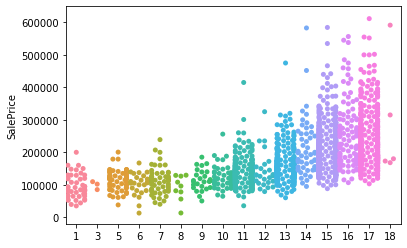

In [118]:
garage_rating = (garage_fin_rating + garage_cond_rating + 
                 garage_paved_rating + garage_type_rating)

sns.swarmplot(garage_rating, train_full["SalePrice"])

train_full.groupby(by = garage_rating)["SalePrice"].mean()

In [119]:
np.corrcoef(garage_rating, train_full["SalePrice"])[0][1]

0.5449938942198551

In [120]:
np.corrcoef(garage_rating ** 2, train_full["SalePrice"])[0][1]

0.5797557363449469

In [121]:
np.corrcoef(garage_rating * train_full["Garage Cars"], train_full["SalePrice"])[0][1]

0.7401774990351878

##### Analysis

Converting all garage quality features into a 0-5 scale and summing them together appears to create a few different groups within which sale prices vary.

Potential groups: 1 - 9, 10-13, 14-15, 16+

Correlation between this new rating and sales price is not super high, so this feature alone may not be ideal, though could serve as part of an interaction term with # garage cars as shown above (0.74 correlation to sales price)

### Garage Features Summary and Feature Engineering
    The two quantitative variables, garage cars and garage area, both predict sales price relatively well, with garage cars seeming to be a slightly better predictor. given these variables are highly correlated, selecting only one to include in the model is ideal
    
    Garage year built highly correlates with below total hosue year of last remodeling and therefore likely offers limited additional value
    
    None of the 4 major categorical/rating garage features (type, finish, quality and conditon) appear to offer extremely strong differences in sales price alone, though there does seem to be a correlation between "higher" ratings and sales price. When interacted with garage car capacity, thse quality ratings do a much better job at distinguishing high vs lower priced houses. Given that all categorical features do have some distinction amongst categories in sales price distribution, using interaction terms that combine many of these features will likely be beneficial. 

In [23]:
#Create dummies for each of individual features

#Create Garage Dummies
train_full["Garage_3+_Cars"] = (train_full["Garage Cars"] >= 3).map(lambda x: 1 if x == True else 0)
train_full["Garage_2_Cars"] = (train_full["Garage Cars"] == 2).map(lambda x: 1 if x == True else 0)
train_full["Garage_1_Car"] = (train_full["Garage Cars"] == 1).map(lambda x: 1 if x == True else 0)

test_full["Garage_3+_Cars"] = (test_full["Garage Cars"] >= 3).map(lambda x: 1 if x == True else 0)
test_full["Garage_2_Cars"] = (test_full["Garage Cars"] == 2).map(lambda x: 1 if x == True else 0)
test_full["Garage_1_Car"] = (test_full["Garage Cars"] == 1).map(lambda x: 1 if x == True else 0)


train_full["Garage_Attchd_BuiltIn"] = train_full["Garage Type"].map(lambda x: 1 if ((x=="Attchd") | (x=="BuiltIn")) else 0)
train_full["Garage_Other_Type"] = train_full["Garage Type"].map(lambda x: 1 if ((x != "Attchd") &
                                                                                (x != "BuiltIn") &
                                                                                (x != "NA")) else 0)

test_full["Garage_Attchd_BuiltIn"] = test_full["Garage Type"].map(lambda x: 1 if ((x=="Attchd") | (x=="BuiltIn")) else 0)
test_full["Garage_Other_Type"] = test_full["Garage Type"].map(lambda x: 1 if ((x != "Attchd") &
                                                                                (x != "BuiltIn") &
                                                                                (x != "NA")) else 0)

train_full["Garage_Fin"] = train_full["Garage Finish"].map(lambda x: 1 if x == "Fin" else 0)
train_full["Garage_RFn"] = train_full["Garage Finish"].map(lambda x: 1 if x == "RFn" else 0)
train_full["Garage_Unf"] = train_full["Garage Finish"].map(lambda x: 1 if x == "Unf" else 0)

test_full["Garage_Fin"] = test_full["Garage Finish"].map(lambda x: 1 if x == "Fin" else 0)
test_full["Garage_RFn"] = test_full["Garage Finish"].map(lambda x: 1 if x == "RFn" else 0)
test_full["Garage_Unf"] = test_full["Garage Finish"].map(lambda x: 1 if x == "Unf" else 0)

train_full["Garage_Fa Po"] = train_full["Garage Qual"].map(lambda x: 1 if (x == "Fa") | (x == "Po") else 0)
train_full["Garage_Gd Ex"] = train_full["Garage Qual"].map(lambda x: 1 if (x == "Gd") | (x == "Ex") else 0)
train_full["Garage_TA"] = train_full["Garage Qual"].map(lambda x: 1 if (x == "TA") else 0)

test_full["Garage_Fa Po"] = test_full["Garage Qual"].map(lambda x: 1 if (x == "Fa") | (x == "Po") else 0)
test_full["Garage_Gd Ex"] = test_full["Garage Qual"].map(lambda x: 1 if (x == "Gd") | (x == "Ex") else 0)
test_full["Garage_TA"] = test_full["Garage Qual"].map(lambda x: 1 if (x == "TA") else 0)

In [24]:
#Wide variety of interacxtion terms created for garage features based on car capacity, finish, and type.

#Fin
train_full["Garage_3+_Attchd_BuiltIn_Fin"] = (train_full["Garage_3+_Cars"] 
                                              * train_full["Garage_Attchd_BuiltIn"] 
                                              * train_full["Garage_Fin"])
train_full["Garage_2_Attchd_BuiltIn_Fin"] =  (train_full["Garage_2_Cars"] 
                                              * train_full["Garage_Attchd_BuiltIn"] 
                                              * train_full["Garage_Fin"])
train_full["Garage_3+_Other_Types_Fin"] =  (train_full["Garage_3+_Cars"] 
                                            * train_full["Garage_Other_Type"] 
                                            * train_full["Garage_Fin"])
train_full["Garage_2_Other_Types_Fin"] =  (train_full["Garage_2_Cars"] 
                                           * train_full["Garage_Other_Type"] 
                                           * train_full["Garage_Fin"])

test_full["Garage_3+_Attchd_BuiltIn_Fin"] = (test_full["Garage_3+_Cars"] 
                                             * test_full["Garage_Attchd_BuiltIn"] 
                                             * test_full["Garage_Fin"])
test_full["Garage_2_Attchd_BuiltIn_Fin"] =  (test_full["Garage_2_Cars"] 
                                             * test_full["Garage_Attchd_BuiltIn"] 
                                             * test_full["Garage_Fin"])
test_full["Garage_3+_Other_Types_Fin"] =  (test_full["Garage_3+_Cars"] 
                                           * test_full["Garage_Other_Type"] 
                                           * test_full["Garage_Fin"])
test_full["Garage_2_Other_Types_Fin"] =  (test_full["Garage_2_Cars"] 
                                          * test_full["Garage_Other_Type"] 
                                          * test_full["Garage_Fin"])

#Unf
train_full["Garage_3+_Attchd_BuiltIn_Unf"] = (train_full["Garage_3+_Cars"] 
                                              * train_full["Garage_Attchd_BuiltIn"] 
                                              * train_full["Garage_Unf"])
train_full["Garage_2_Attchd_BuiltIn_Unf"] =  (train_full["Garage_2_Cars"] 
                                              * train_full["Garage_Attchd_BuiltIn"] 
                                              * train_full["Garage_Unf"])
train_full["Garage_3+_Other_Types_Unf"] =  (train_full["Garage_3+_Cars"] 
                                            * train_full["Garage_Other_Type"] 
                                            * train_full["Garage_Unf"])
train_full["Garage_2_Other_Types_Unf"] =  (train_full["Garage_2_Cars"] 
                                           * train_full["Garage_Other_Type"] 
                                           * train_full["Garage_Unf"])

test_full["Garage_3+_Attchd_BuiltIn_Unf"] = (test_full["Garage_3+_Cars"] 
                                             * test_full["Garage_Attchd_BuiltIn"] 
                                             * test_full["Garage_Unf"])
test_full["Garage_2_Attchd_BuiltIn_Unf"] =  (test_full["Garage_2_Cars"] 
                                             * test_full["Garage_Attchd_BuiltIn"] 
                                             * test_full["Garage_Unf"])
test_full["Garage_3+_Other_Types_Unf"] =  (test_full["Garage_3+_Cars"] 
                                           * test_full["Garage_Other_Type"] 
                                           * test_full["Garage_Unf"])
test_full["Garage_2_Other_Types_Unf"] =  (test_full["Garage_2_Cars"] 
                                          * test_full["Garage_Other_Type"] 
                                          * test_full["Garage_Unf"])
                                          
#RFn
train_full["Garage_3+_Attchd_BuiltIn_RFn"] = (train_full["Garage_3+_Cars"] 
                                              * train_full["Garage_Attchd_BuiltIn"] 
                                              * train_full["Garage_RFn"])
train_full["Garage_2_Attchd_BuiltIn_RFn"] =  (train_full["Garage_2_Cars"] 
                                              * train_full["Garage_Attchd_BuiltIn"] 
                                              * train_full["Garage_RFn"])
train_full["Garage_3+_Other_Types_RFn"] =  (train_full["Garage_3+_Cars"] 
                                            * train_full["Garage_Other_Type"] 
                                            * train_full["Garage_RFn"])
train_full["Garage_2_Other_Types_RFn"] =  (train_full["Garage_2_Cars"] 
                                           * train_full["Garage_Other_Type"] 
                                           * train_full["Garage_RFn"])

test_full["Garage_3+_Attchd_BuiltIn_RFn"] = (test_full["Garage_3+_Cars"] 
                                             * test_full["Garage_Attchd_BuiltIn"] 
                                             * test_full["Garage_RFn"])
test_full["Garage_2_Attchd_BuiltIn_RFn"] =  (test_full["Garage_2_Cars"] 
                                             * test_full["Garage_Attchd_BuiltIn"] 
                                             * test_full["Garage_RFn"])
test_full["Garage_3+_Other_Types_RFn"] =  (test_full["Garage_3+_Cars"] 
                                           * test_full["Garage_Other_Type"] 
                                           * test_full["Garage_RFn"])
test_full["Garage_2_Other_Types_RFn"] =  (test_full["Garage_2_Cars"] 
                                          * test_full["Garage_Other_Type"] 
                                          * test_full["Garage_RFn"])                                         


In [32]:
# log of garage area
train_full["Log Garage Area"] = np.log(train_full["Garage Area"] + 1)
test_full["Log Garage Area"] = np.log(test_full["Garage Area"] + 1)

In [25]:
#Paved Driveway Dummy creation
# as 3rd variable, goes from 
train_full["Unpaved_Drive"] = train_full["Paved Drive"].map(lambda x: 1 if x == "N" else 0)
test_full["Unpaved_Drive"] = test_full["Paved Drive"].map(lambda x: 1 if x == "N" else 0)

### 4) Construction Years

    a) Year of Initial Build
    b) Year of Remodeling/Addition

#### a) Year of initial build

(0, 600000)

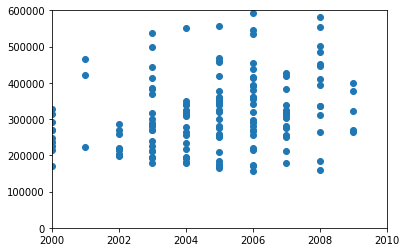

In [26]:
#Year of initial build
fig, ax = plt.subplots()
plt.scatter(x = train_full[train_full["TotRms AbvGrd"] > 7]["Year Built"],
            y = train_full[train_full["TotRms AbvGrd"] > 7]["SalePrice"])
plt.xlim(2000,2010)
plt.ylim(0,600_000)

##### Analysis:

the year the house was built appears to have a linear relationship to price for years before 2000, after which there is a steep increase in sales price.

Transforming this variable to be useful can be done by evaluating data in groups segmented by year cutoffs. Each group could then be fit to its own linear function, and an interaction term with a dummy variable would ensure each only applies to houses within the group.

In this case, it seems houses after around 2005, between 1981-2004, 1950-1980 and before 1950 could be grouped together. 

#### b) Year of latest remodeling/addition

Set as year of initial build if none

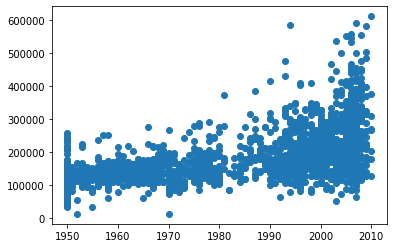

In [123]:
fig, ax = plt.subplots()
plt.scatter(x = train_full["Year Remod/Add"], y = train_full["SalePrice"])

###### Analysis:

comments here are similar as to the measure of initial year built, though there appears to be lower variation among the earlier years in this range and is therefore a likely better measure.

#### Feature Engineering

In [27]:
#Create dummy variables for year of remodeling/additions

train_full["Year_Remod_1950"] = train_full["Year Remod/Add"].map(lambda x: 1 if x == 1950 else 0)
train_full["Year_Remod_50-80"] = train_full["Year Remod/Add"].map(lambda x: 1 if ((x > 1950) & (x < 1981)) else 0)
train_full["Year_Remod_81-90"] = train_full["Year Remod/Add"].map(lambda x: 1 if ((x >= 1981) & (x < 1990)) else 0)
train_full["Year_Remod_91-01"] = train_full["Year Remod/Add"].map(lambda x: 1 if ((x >= 1991) & (x < 2002)) else 0)
train_full["Year_Remod_02+"] = train_full["Year Remod/Add"].map(lambda x: 1 if (x >= 2002) else 0)

test_full["Year_Remod_1950"] = test_full["Year Remod/Add"].map(lambda x: 1 if x == 1950 else 0)
test_full["Year_Remod_50-80"] = test_full["Year Remod/Add"].map(lambda x: 1 if ((x > 1950) & (x < 1981)) else 0)
test_full["Year_Remod_81-90"] = test_full["Year Remod/Add"].map(lambda x: 1 if ((x >= 1981) & (x < 1990)) else 0)
test_full["Year_Remod_91-01"] = test_full["Year Remod/Add"].map(lambda x: 1 if ((x >= 1991) & (x < 2002)) else 0)
test_full["Year_Remod_02+"] = test_full["Year Remod/Add"].map(lambda x: 1 if (x >= 2002) else 0)


train_full["Remod 1950 Line"] = train_full["Year_Remod_1950"] * train_full["Year Remod/Add"]
train_full["Remod 50-80 Line"] = train_full["Year_Remod_50-80"] * train_full["Year Remod/Add"]
train_full["Remod 81-90 Line"] = train_full["Year_Remod_81-90"] * train_full["Year Remod/Add"]
train_full["Remod 91-01 Line"] = train_full["Year_Remod_91-01"] * train_full["Year Remod/Add"]
train_full["Remod 02+ Line"] = train_full["Year_Remod_02+"] * train_full["Year Remod/Add"]


test_full["Remod 1950 Line"] = test_full["Year_Remod_1950"] * test_full["Year Remod/Add"]
test_full["Remod 50-80 Line"] = test_full["Year_Remod_50-80"] * test_full["Year Remod/Add"]
test_full["Remod 81-90 Line"] = test_full["Year_Remod_81-90"] * test_full["Year Remod/Add"]
test_full["Remod 91-01 Line"] = test_full["Year_Remod_91-01"] * test_full["Year Remod/Add"]
test_full["Remod 02+ Line"] = test_full["Year_Remod_02+"] * test_full["Year Remod/Add"]



### 5) Number of Rooms and Room Quality Analysis:

    a) Bathrooms
    b) Total rooms above ground (excludes bathrooms)
    c) Bedrooms
    d) Kitchens
    

#### a) Bathrooms

Full Bath
0    170226.000000
1    134870.961111
2    214600.614051
3    304609.155556
4    269500.000000
Name: SalePrice, dtype: float64


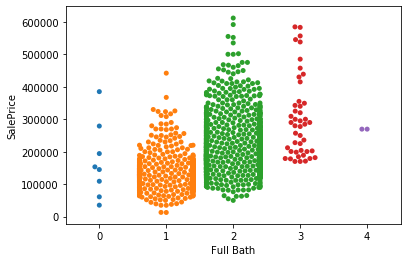

In [124]:
fig, ax = plt.subplots()
sns.swarmplot(train_full["Full Bath"], y = train_full["SalePrice"])
print(train_full.groupby(by = "Full Bath")["SalePrice"].mean())

In [127]:
train_full[train_full["Full Bath"] == 0][["Full Bath",
                                          "Half Bath",
                                          "Bsmt Full Bath",
                                          "Bsmt Half Bath"]]

Full Bath  Half Bath  Bsmt Full Bath  Bsmt Half Bath
191           0          1             2.0             0.0
346           0          0             1.0             1.0
400           0          2             2.0             0.0
744           0          2             2.0             0.0
1280          0          2             0.0             2.0
1372          0          1             1.0             0.0
1518          0          0             1.0             0.0
1571          0          1             2.0             0.0

##### Analysis:

there seems to be a linear relationship to sales price when full baths is between 1 and 3
However, houses with 0 full baths dont have a lower sale price than 1 full bath and houses with 4 full baths don't have a higher price than those with 3 full baths.

Filtering for 0 full baths above shows that these houses don't have above ground full baths, but do typically have full baths below ground.

Below, scatters of various combinations of the 4 bathroom count measures are evaluated to determine which combo of features may demonstrate the strongest linear relationship

In [435]:
total_full_baths = train_full["Full Bath"] + train_full["Bsmt Full Bath"]
total_half_baths = train_full["Half Bath"] + train_full["Bsmt Half Bath"]
total_above_gr_baths = train_full["Full Bath"] + (0.5 * train_full["Half Bath"])
total_bsmt_baths = train_full["Bsmt Full Bath"] + (0.5 * train_full["Bsmt Half Bath"])
total_baths = (train_full["Full Bath"] + (0.5 * train_full["Half Bath"]) + 
               train_full["Bsmt Full Bath"] + (0.5 * train_full["Bsmt Half Bath"]))

print(np.corrcoef(total_full_baths, train_full["SalePrice"])[0][1])
print(np.corrcoef(total_above_gr_baths, train_full["SalePrice"])[0][1])
print(np.corrcoef(total_half_baths, train_full["SalePrice"])[0][1])
print(np.corrcoef(total_bsmt_baths, train_full["SalePrice"])[0][1])
print(np.corrcoef(total_baths, train_full["SalePrice"])[0][1])

0.5884035745259537
0.574486503482785
0.23712975756749421
0.27417040035324797
0.6302067091605709


correlation is highest between total baths and sales, and increases correlation from to .61 compared to .52 for full bath vs sales price. 

0.0    194201.000000
1.0    122744.986616
2.0    174536.175218
3.0    256545.577922
4.0    288842.964286
6.0    224250.000000
Name: SalePrice, dtype: float64


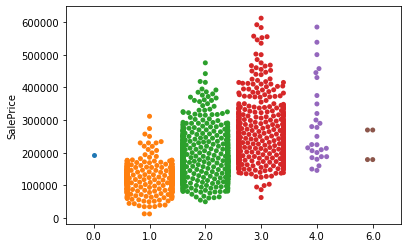

In [436]:
fig, ax = plt.subplots()
sns.swarmplot(train_full["Full Bath"] + train_full["Bsmt Full Bath"], y = train_full["SalePrice"])

print(train_full.groupby(by = total_full_baths)["SalePrice"].mean())

0.0    164054.181518
1.0    208008.481061
2.0    184041.209302
3.0    170000.000000
4.0    194201.000000
Name: SalePrice, dtype: float64


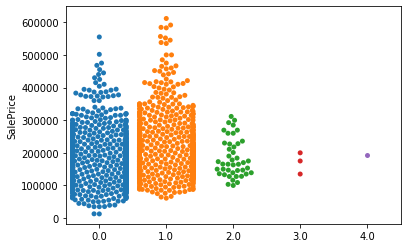

In [443]:
fig, ax = plt.subplots()
sns.swarmplot(train_full["Half Bath"] + train_full["Bsmt Half Bath"], y = train_full["SalePrice"])

print(train_full.groupby(by = total_half_baths)["SalePrice"].mean())

Half Bath
0    163751.821101
1    213622.831724
2    173912.388889
Name: SalePrice, dtype: float64


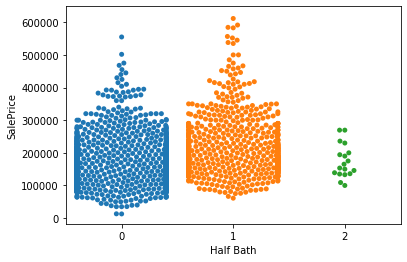

In [445]:
fig, ax = plt.subplots()
sns.swarmplot(train_full["Half Bath"], y = train_full["SalePrice"])

print(train_full.groupby(by = "Half Bath")["SalePrice"].mean())

0.0     90155.500000
0.5    241666.666667
1.0    126023.220365
1.5    158555.738589
2.0    200684.954186
2.5    234596.834423
3.0    213525.433333
3.5    375439.681818
4.0    235876.000000
5.0    269500.000000
Name: SalePrice, dtype: float64


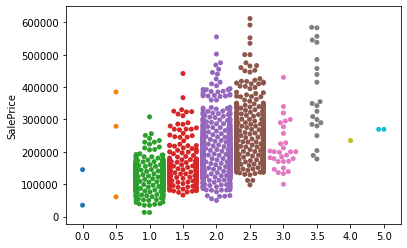

In [441]:
fig, ax = plt.subplots()
sns.swarmplot(train_full["Full Bath"] + (0.5 * train_full["Half Bath"]), y = train_full["SalePrice"])

print(train_full.groupby(by = total_above_gr_baths)["SalePrice"].mean())

1.0    111268.952381
1.5    138194.341969
2.0    158436.426101
2.5    200508.841432
3.0    231618.000000
3.5    282348.365000
4.0    258802.272727
4.5    337507.181818
5.0    145900.000000
6.0    179000.000000
7.0    269500.000000
Name: SalePrice, dtype: float64


(0, 600000)

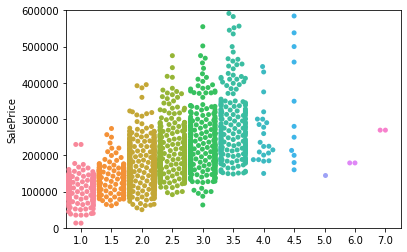

In [447]:
sns.swarmplot(total_baths,
              train_full["SalePrice"])
print(train_full.groupby(by = total_baths)["SalePrice"].mean())


plt.ylim(0,600_000)

##### Analysis: 

plotting total house baths vs sales price improves the linear relationship strength. However, houses with > 5 baths appear to have lower prices. inclusion in the model could be dummy variables with 5+ bathrooms all grouped together, though it's also possble that these houses have other features that make them lower quality and less valuable, so these are marked as outliers for later evaluation.

#### b) Total Above Ground Rooms

TotRms AbvGrd
2      39300.000000
3      97275.000000
4     127488.753425
5     143577.611794
6     164301.169179
7     200752.334737
8     216750.539474
9     262559.214286
10    285100.081633
11    333535.863636
12    265129.692308
13    205000.000000
14    200000.000000
15    183850.000000
Name: SalePrice, dtype: float64

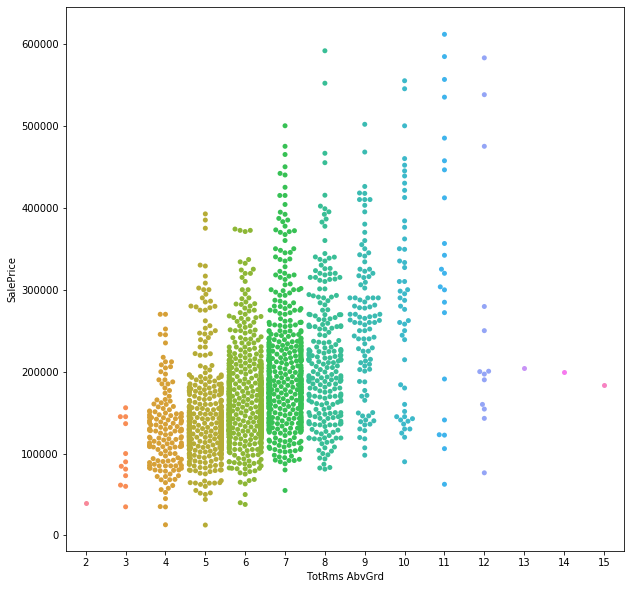

In [134]:
fig, ax = plt.subplots(figsize = (10,10))
sns.swarmplot(x = train_full["TotRms AbvGrd"], y = train_full["SalePrice"])

train_full.groupby(by="TotRms AbvGrd")["SalePrice"].mean()

##### Analysis: 
sales price seems to increase with total rooms above ground up until > 11 rooms, at which point sales price means decrease. 

Total rooms above ground includes both kitchens and bedrooms which each have data separately (bathrooms not included). Further analysis below first for bedrooms and kitchens, and then for other not-accounted-for rooms. breaking out rooms into types could improve the feature's ability to predict sales price

#### c) Bedrooms

Bedroom AbvGr
0    240791.800000
1    182388.920000
2    164656.601103
3    180627.309567
4    215374.792453
5    203885.951220
6    164111.333333
8    200000.000000
Name: SalePrice, dtype: float64

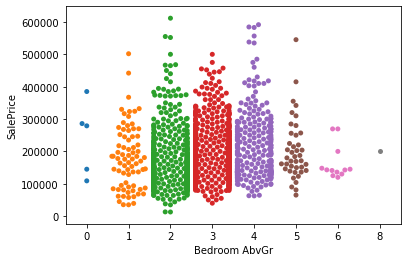

In [140]:
sns.swarmplot(x = train_full["Bedroom AbvGr"], y = train_full["SalePrice"])

train_full.groupby(by = "Bedroom AbvGr")["SalePrice"].mean()

##### Analysis:

Number of above ground bedrooms does not appear to be a great predictor of sales price. the range of prices within each number of bedrooms is extremely large and there isn't a strong consistent trend in sales price moving from low to high bedrooms.

#### d) Kitchens

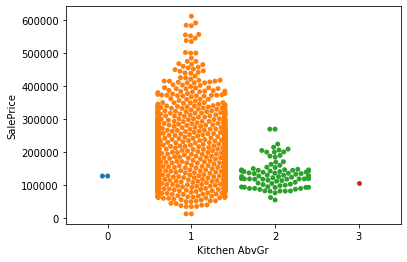

In [141]:
sns.swarmplot(x = train_full["Kitchen AbvGr"], y = train_full["SalePrice"])

##### Analysis:
Number of above ground kitchens does not appear to have a meaningful impact on sales price, in large part because the overwhelming majority of houses have 1 kitchen, and those with more or less doin't fall outside the distribution of sales prices observed by houses with one kitchen.

Given that kitchens and bedrooms aren't great predictors of sales price and that total rooms above ground includes kitchens and bedrooms, analysis below removes those rooms from TotRms AbvGrd to see if "other rooms" have a stronger impact on sales price

0     132163.705882
1     125893.061433
2     152495.580882
3     200558.851852
4     244655.686508
5     283627.761905
6     341930.275862
7     431387.800000
8     324052.333333
12    183850.000000
Name: SalePrice, dtype: float64


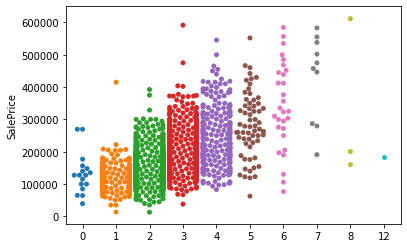

In [142]:
other_rooms = train_full["TotRms AbvGrd"] - train_full["Kitchen AbvGr"] - train_full["Bedroom AbvGr"]
print(train_full.groupby(by = other_rooms)["SalePrice"].mean())
sns.swarmplot(other_rooms, train_full["SalePrice"])


In [148]:
print("Total Rooms: \n" + str(np.corrcoef(train_full["TotRms AbvGrd"], train_full["SalePrice"])[0][1]))
print("Remove Beds/Kitchens: \n" + str(np.corrcoef(train_full["TotRms AbvGrd"] - train_full["Kitchen AbvGr"] - train_full["Bedroom AbvGr"], train_full["SalePrice"])[0][1]))

Total Rooms: 
0.5040143180735324
Remove Beds/Kitchens: 
0.5978248132001244


##### Analysis:

once the impact of kitchens and bedrooms was removed, it's clear that number of other rooms still has an impact on sales price. Greater number of "other" rooms lead to higher sales prices, with similar declining price at super high room counts. As can be seen in correlations above, this increased correlation by ~0.1 from 0.5 to 0.60

##### Kitchen Quality

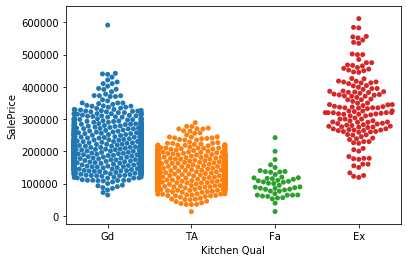

In [149]:
sns.swarmplot(train_full["Kitchen Qual"], train_full["SalePrice"])

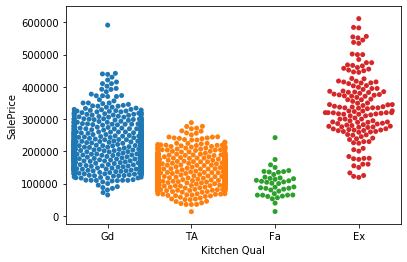

In [150]:
sns.swarmplot(train_full[train_full["Kitchen AbvGr"] == 1]["Kitchen Qual"],
              train_full[train_full["Kitchen AbvGr"] == 1]["SalePrice"])

(0, 600000)

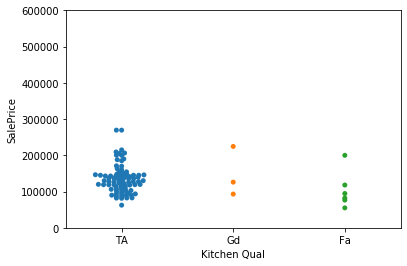

In [151]:
sns.swarmplot(train_full[train_full["Kitchen AbvGr"] != 1]["Kitchen Qual"],
              train_full[train_full["Kitchen AbvGr"] != 1]["SalePrice"], order = ["Gd", "TA", "")

plt.ylim(0,600_000)

##### Analysis:

Kitchen quality is the other feature within the data that describes kitchens, and unlike # of kitchens, it appears there is a much more significant differece in distribution of sales prices among kitchen quality ratings. dummy categories to separate out Excellent, Fair, and Good would be useful.

The last two plots above look at kitchen quality impact on sales price separately for 1 vs. more or less than 1 above ground kitchen, and this seems to improve the ability to predict lower priced houses with kitchen features.

Note: there are no "NAs" here for missing kitchens even though there are two units listed as having no above ground kitchen above. These units must contain a below ground kitchen.

### 5) Indoor Rooms and Room Quality Summary and Feature Engineering

Overall, total above ground room count's relationship to sales price can be strengthened by removing bedrooms and kitchens, for whom the relationship to sales price is weak at best.

Further, inclusion of kitchen quality ratings as a categorical variable may enable differentiating between ktichens when almost all houses have exactly 1 above ground kitchen.

In [28]:
#Create dummy variables for electrical, central air, heating, and utilities
train_full["one_kitchen"] = train_full["Kitchen AbvGr"].map(lambda x: 1 if x == 1 else 0)
test_full["one_kitchen"] = test_full["Kitchen AbvGr"].map(lambda x: 1 if x == 1 else 0)

train_full["one_ex_kitchen"] = train_full["one_kitchen"] * (train_full["Kitchen Qual"].map(lambda x: 1 if x =="Ex" else 0))
train_full["one_gd_kitchen"] = train_full["one_kitchen"] * (train_full["Kitchen Qual"].map(lambda x: 1 if x =="Gd" else 0))
train_full["one_TA_kitchen"] = train_full["one_kitchen"] * (train_full["Kitchen Qual"].map(lambda x: 1 if x =="TA" else 0))
train_full["one_Fa_kitchen"] = train_full["one_kitchen"] * (train_full["Kitchen Qual"].map(lambda x: 1 if x =="Fa" else 0))
train_full["one_Po_kitchen"] = train_full["one_kitchen"] * (train_full["Kitchen Qual"].map(lambda x: 1 if x =="Po" else 0))

test_full["one_ex_kitchen"] = test_full["one_kitchen"] * (test_full["Kitchen Qual"].map(lambda x: 1 if x =="Ex" else 0))
test_full["one_gd_kitchen"] = test_full["one_kitchen"] * (test_full["Kitchen Qual"].map(lambda x: 1 if x =="Gd" else 0))
test_full["one_TA_kitchen"] = test_full["one_kitchen"] * (test_full["Kitchen Qual"].map(lambda x: 1 if x =="TA" else 0))
test_full["one_Fa_kitchen"] = test_full["one_kitchen"] * (test_full["Kitchen Qual"].map(lambda x: 1 if x =="Fa" else 0))
test_full["one_Po_kitchen"] = test_full["one_kitchen"] * (test_full["Kitchen Qual"].map(lambda x: 1 if x =="Po" else 0))

In [29]:
#Create dummy variables for either 2, 3, or 4+ total bathrooms (both above and below grade and including half baths)

train_full["total_baths"] = (train_full["Full Bath"] + (0.5 * train_full["Half Bath"]) + 
                            train_full["Bsmt Full Bath"] + (0.5 * train_full["Bsmt Half Bath"]))
test_full["total_baths"] = (test_full["Full Bath"] + (0.5 * test_full["Half Bath"]) + 
                            test_full["Bsmt Full Bath"] + (0.5 * test_full["Bsmt Half Bath"]))

train_full["1_bath"] = train_full["total_baths"].map(lambda x: 1 if x == 1 else 0)
train_full["1.5_baths"] = train_full["total_baths"].map(lambda x: 1 if x == 1.5 else 0)
train_full["2_baths"] = train_full["total_baths"].map(lambda x: 1 if x == 2 else 0)
train_full["2.5_baths"] = train_full["total_baths"].map(lambda x: 1 if x == 2.5 else 0)
train_full["3_baths"] = train_full["total_baths"].map(lambda x: 1 if x == 3 else 0)
train_full["3.5_baths"] = train_full["total_baths"].map(lambda x: 1 if x == 3.5 else 0)
train_full["4_baths"] = train_full["total_baths"].map(lambda x: 1 if x == 4 else 0)
train_full["4.5_baths"] = train_full["total_baths"].map(lambda x: 1 if x == 4.5 else 0)
train_full["5+_baths"] = train_full["total_baths"].map(lambda x: 1 if x >= 5 else 0)

test_full["1_bath"] = test_full["total_baths"].map(lambda x: 1 if x == 1 else 0)
test_full["1.5_baths"] = test_full["total_baths"].map(lambda x: 1 if x == 1.5 else 0)
test_full["2_baths"] = test_full["total_baths"].map(lambda x: 1 if x == 2 else 0)
test_full["2.5_baths"] = test_full["total_baths"].map(lambda x: 1 if x == 2.5 else 0)
test_full["3_baths"] = test_full["total_baths"].map(lambda x: 1 if x == 3 else 0)
test_full["3.5_baths"] = test_full["total_baths"].map(lambda x: 1 if x == 3.5 else 0)
test_full["4_baths"] = test_full["total_baths"].map(lambda x: 1 if x == 4 else 0)
test_full["4.5_baths"] = test_full["total_baths"].map(lambda x: 1 if x == 4.5 else 0)
test_full["5+_baths"] = test_full["total_baths"].map(lambda x: 1 if x >= 5 else 0)

In [30]:
# Create dummy variables for non kitchen/bedrooms above grade
train_full["other_above_grade_rooms"] = (train_full["TotRms AbvGrd"] - 
                                         train_full["Kitchen AbvGr"] - 
                                         train_full["Bedroom AbvGr"])

test_full["other_above_grade_rooms"] = (test_full["TotRms AbvGrd"] - 
                                         test_full["Kitchen AbvGr"] - 
                                         test_full["Bedroom AbvGr"])

train_full["Other_Rooms_6+"] = train_full["other_above_grade_rooms"].map(lambda x: 1 if x >=6 else 0)
train_full["Other_Rooms_5"] = train_full["other_above_grade_rooms"].map(lambda x: 1 if x ==5 else 0)
train_full["Other_Rooms_4"] = train_full["other_above_grade_rooms"].map(lambda x: 1 if x ==4 else 0)
train_full["Other_Rooms_3"] = train_full["other_above_grade_rooms"].map(lambda x: 1 if x ==3 else 0) 
train_full["Other_Rooms_2"] = train_full["other_above_grade_rooms"].map(lambda x: 1 if x ==2 else 0)

test_full["Other_Rooms_6+"] = test_full["other_above_grade_rooms"].map(lambda x: 1 if x >=6 else 0)
test_full["Other_Rooms_5"] = test_full["other_above_grade_rooms"].map(lambda x: 1 if x ==5 else 0)
test_full["Other_Rooms_4"] = test_full["other_above_grade_rooms"].map(lambda x: 1 if x ==4 else 0)
test_full["Other_Rooms_3"] = test_full["other_above_grade_rooms"].map(lambda x: 1 if x ==3 else 0) 
test_full["Other_Rooms_2"] = test_full["other_above_grade_rooms"].map(lambda x: 1 if x ==2 else 0)



In [31]:
#dummy for high total room count - used for outliers

train_full["High Room Count"] = train_full["TotRms AbvGrd"].map(lambda x: 1 if (x >= 10) & (x < 14) else 0)

test_full["High Room Count"] = test_full["TotRms AbvGrd"].map(lambda x: 1 if (x >= 10) & (x < 14) else 0)

### 6) Other Indoor Features and Utilities:

    a) Fireplaces
    b) Heating
    c) Central Air
    d) Electrical
    e) Utilities

#### a) Fireplaces

Fireplaces
0    142001.103000
1    215478.776169
2    239893.589041
3    234808.333333
4    260000.000000
Name: SalePrice, dtype: float64


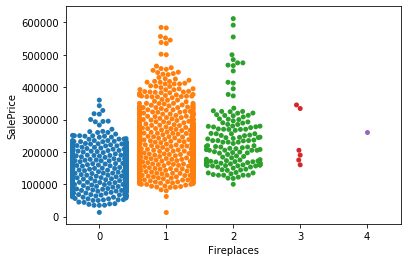

In [152]:
sns.swarmplot(x = train_full["Fireplaces"], y = train_full["SalePrice"])
print(train_full.groupby(by="Fireplaces")["SalePrice"].mean())

##### Analysis:
having any fireplace at all appears to have a strong impact on price, while the difference between 1 and multiple fireplaces much smaller, expecially considering how few units have more than 2 fireplaces. Inclusion in the model could be in 3 dummy variable groups: no fireplaces, 1 fireplace, and 2+ fireplaces

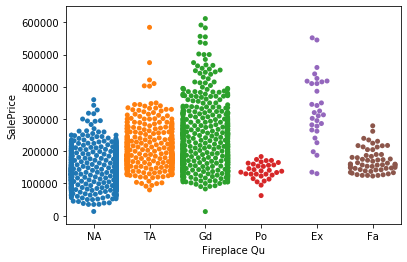

In [153]:
sns.swarmplot(train_full ["Fireplace Qu"], train_full["SalePrice"])

(0, 600000)

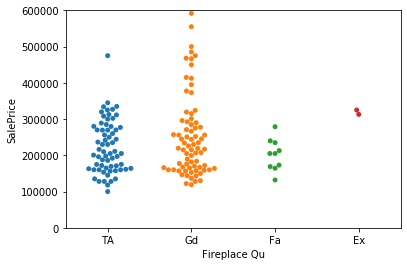

In [154]:
sns.swarmplot(train_full[train_full["Fireplaces"] > 1]["Fireplace Qu"],
              train_full[train_full["Fireplaces"] > 1]["SalePrice"])

plt.ylim(0,600_000)

(0, 600000)

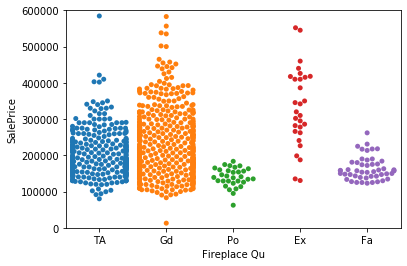

In [155]:
sns.swarmplot(train_full[train_full["Fireplaces"] == 1]["Fireplace Qu"],
              train_full[train_full["Fireplaces"] == 1]["SalePrice"])

plt.ylim(0,600_000)

##### Analysis: 

fireplace quality does not appear to have a super strong impact on sales price, but "excellent" quality fireplaces are centered around a much higher sales price while poor and fair have lower sales prices.

interacting fireplace quality with 1 vs more than one fireplace does not seem to add much value.

#### b) Heating

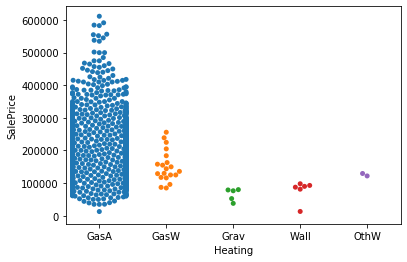

In [156]:
sns.swarmplot(train_full["Heating"], train_full["SalePrice"])

The overwhelming majority of houses have some sort of gas heating, with a wide range of sales price, whereas other types of heating don't have many observations and though they appear to be lower in price, this could very well be be chance.

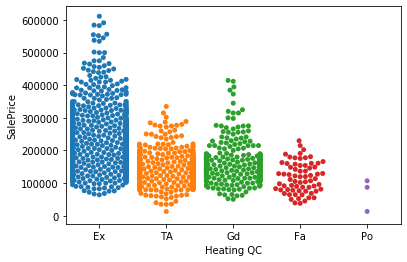

In [157]:
sns.swarmplot(train_full["Heating QC"], train_full["SalePrice"])

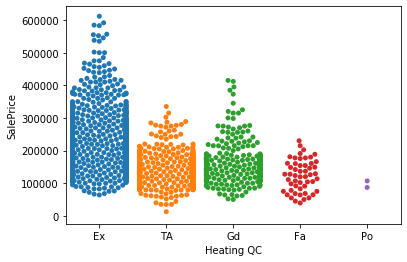

In [167]:
sns.swarmplot(train_full[train_full["Heating"] == "GasA"]["Heating QC"],
              train_full[train_full["Heating"] == "GasA"]["SalePrice"])

(0, 600000)

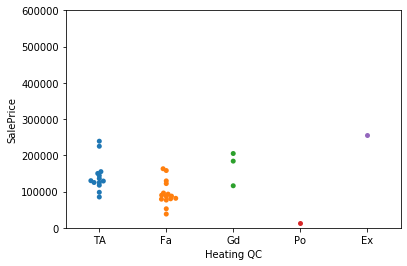

In [168]:
sns.swarmplot(train_full[train_full["Heating"] != "GasA"]["Heating QC"],
              train_full[train_full["Heating"] != "GasA"]["SalePrice"])

plt.ylim(0,600_000)

Heating QC does have some differentation in sales price across ratings, mainly in the Excellent category as compared to others. When interacted with GasA type vs others, resolution in sales price slightly improves.

#### c) Central Air

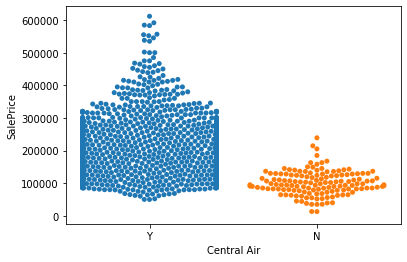

In [169]:
sns.swarmplot(train_full["Central Air"], train_full["SalePrice"])

Central air presence has a very obvious and intuitive impact on sales price and can be included as a dummy variable

#### d) Electrical

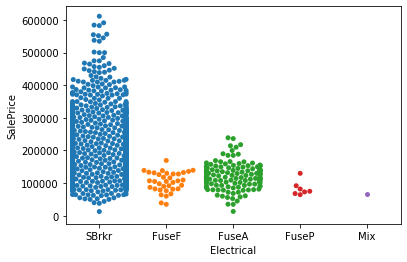

In [161]:
sns.swarmplot(train_full["Electrical"], train_full["SalePrice"])

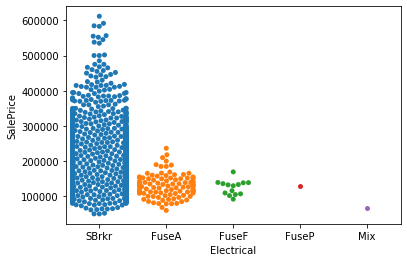

In [162]:
sns.swarmplot(train_full[train_full["Central Air"] == "Y"]["Electrical"],
              train_full[train_full["Central Air"] == "Y"]["SalePrice"])

(0, 600000)

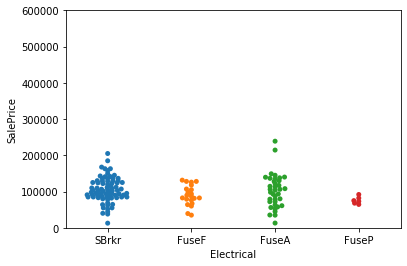

In [163]:
sns.swarmplot(train_full[train_full["Central Air"] == "N"]["Electrical"],
              train_full[train_full["Central Air"] == "N"]["SalePrice"])

plt.ylim(0,600_000)

##### Analysis:

Similar to central air, it seems electrical is most commonly one feature, while houses without the standard are always priced lower. This can be modeled with a single dummy variable.

when interacted together with central air, we can distinguish the standard SBrkr electrical houses with lower prices

#### e) Utilities

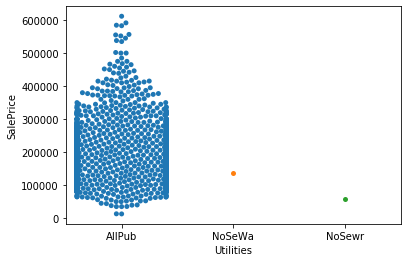

In [164]:
sns.swarmplot(train_full["Utilities"], train_full["SalePrice"])

Similar to other categories, but becaues there are almost no observations in the non-standard categories, it's unclear whether the low prices are observed by chance. Therefore this is not an ideal feature for inclusion.

### Indoor Features and Utilities Summary and Feature Engineering

Fireplaces are the sole feature that can truly be used to distinguish higher priced homes from others, whereas most other features may only be used to filter out low quality homes, as there's a wide variety of sales prices for all of the dominant and standard utility features.

In [37]:
# Fireplace quality

train_full = pd.concat([train_full, pd.get_dummies(train_full["Fireplace Qu"], prefix = "Fireplace")], axis=1)
test_full = pd.concat([test_full, pd.get_dummies(test_full["Fireplace Qu"], prefix = "Fireplace")], axis=1)

In [34]:
# Heating and Heating Quality

train_full["Heating_Not_GasA"] = train_full["Heating"].map(lambda x: 1 if x != "GasA" else 0)
test_full["Heating_Not_GasA"] = test_full["Heating"].map(lambda x: 1 if x != "GasA" else 0)

train_full["Heating QC Ex"] = train_full["Heating QC"].map(lambda x: 1 if x == "Ex" else 0)
train_full["Heating QC Gd"] = train_full["Heating QC"].map(lambda x: 1 if x == "Gd" else 0)
train_full["Heating QC TA"] = train_full["Heating QC"].map(lambda x: 1 if x == "TA" else 0)

test_full["Heating QC Ex"] = test_full["Heating QC"].map(lambda x: 1 if x == "Ex" else 0)
test_full["Heating QC Gd"] = test_full["Heating QC"].map(lambda x: 1 if x == "Gd" else 0)
test_full["Heating QC TA"] = test_full["Heating QC"].map(lambda x: 1 if x == "TA" else 0)

In [35]:
# Central Air and Electricity

train_full["No Central Air"] = train_full["Central Air"].map(lambda x: 1 if x == "N" else 0)
test_full["No Central Air"] = test_full["Central Air"].map(lambda x: 1 if x == "N" else 0)

train_full["SBrkr Elec"] = train_full["Electrical"].map(lambda x: 1 if x == "SBrkr" else 0)
test_full["SBrkr Elec"] = test_full["Electrical"].map(lambda x: 1 if x == "SBrkr" else 0)

In [36]:
#High quality utilities
train_full["High Qual Util"] = ((train_full["Heating_Not_GasA"] == False) &
                                (train_full["Heating QC Ex"] == 1) &
                                (train_full["No Central Air"] == 0) &
                                (train_full["SBrkr Elec"] == 1)).map(lambda x: 1 if True else 0)

#High quality utilities
test_full["High Qual Util"] = ((test_full["Heating_Not_GasA"] == False) &
                                (test_full["Heating QC Ex"] == 1) &
                                (test_full["No Central Air"] == 0) &
                                (test_full["SBrkr Elec"] == 1)).map(lambda x: 1 if True else 0)

### 7) Building Type and Construction Features

Variables include:

    a) MSSubClass = building class
    b) BldgType
    c) House Style
    d) Roof Style
    e) Roof Material
    f) Exterior Types
    g) Exterior Quality and Condition
    h) Foundation
    i) Mas Vnr Type/Area = Masonry veneer type/area

#### a) MS Subclass

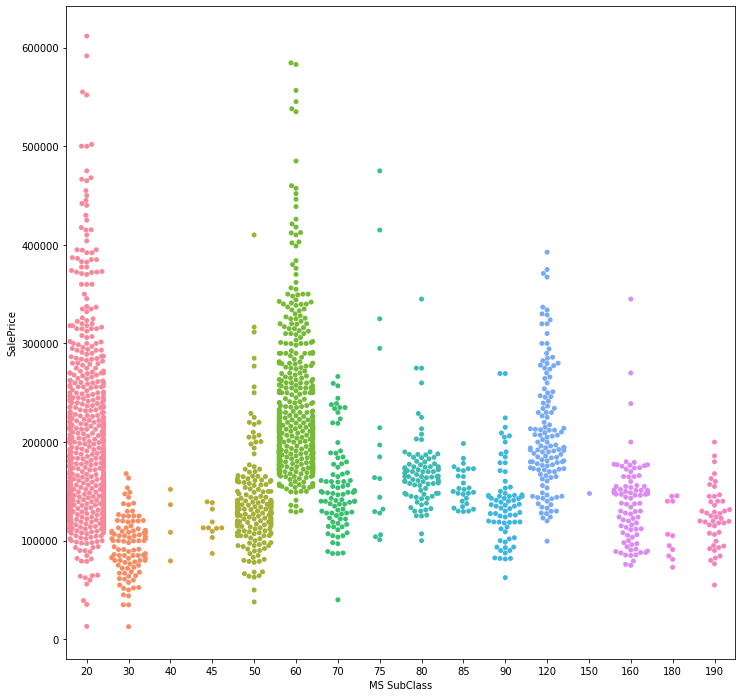

In [165]:
fig, ax = plt.subplots(figsize = (12,12))
sns.swarmplot(x = train_full["MS SubClass"], y = train_full["SalePrice"])

MS SubClass seems to combine various features together (as noted in the data dictionary below), and since these features can be isolated in other features within the data, this is not an ideal feature for inclusion in the model

Data dictonary subclass definitions:

    20 1-STORY 1946 & NEWER ALL STYLES
    30 1-STORY 1945 & OLDER
    40 1-STORY W/FINISHED ATTIC ALL AGES
    45 1-1/2 STORY - UNFINISHED ALL AGES
    50 1-1/2 STORY FINISHED ALL AGES
    60 2-STORY 1946 & NEWER
    70 2-STORY 1945 & OLDER
    75 2-1/2 STORY ALL AGES
    80 SPLIT OR MULTI-LEVEL
    85 SPLIT FOYER
    90 DUPLEX - ALL STYLES AND AGES
    120 1-STORY PUD (Planned Unit Development) - 1946 & NEWER
    150 1-1/2 STORY PUD - ALL AGES
    160 2-STORY PUD - 1946 & NEWER
    180 PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
    190 2 FAMILY CONVERSION - ALL STYLES AND AGES

#### b) Building Type

Bldg Type
1Fam      185275.685882
2fmCon    123179.891304
Duplex    139296.333333
Twnhs     133100.000000
TwnhsE    198312.372671
Name: SalePrice, dtype: float64

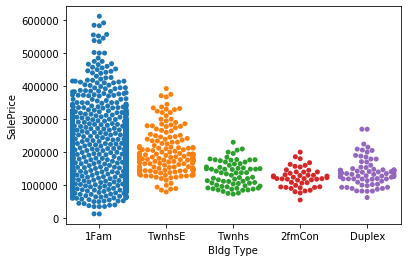

In [170]:
sns.swarmplot(train_full["Bldg Type"],train_full["SalePrice"])

train_full.groupby(by = "Bldg Type")["SalePrice"].mean()

the overwhelming majority of houses sold are 1 family, which span a range of prices. townhouse end units have similar  prices, and all others have somewhat lower prices.


    1Fam Single-family Detached
    2FmCon Two-family Conversion; originally built as one-family dwelling
    Duplx Duplex
    TwnhsE Townhouse End Unit
    TwnhsI Townhouse Inside Unit

#### c) House Style

House Style
1.5Unf    112466.666667
1.5Fin    136480.091743
SFoyer    149343.920000
SLvl      166248.989362
1Story    179809.194523
2.5Unf    191785.714286
2Story    206408.963211
2.5Fin    243666.666667
Name: SalePrice, dtype: float64

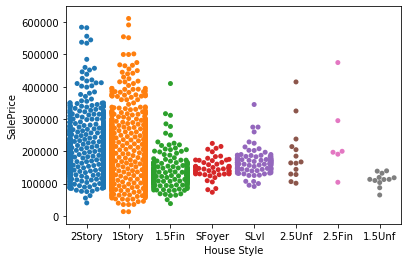

In [171]:
sns.swarmplot(train_full["House Style"],train_full["SalePrice"])

train_full.groupby(by = "House Style")["SalePrice"].mean().sort_values()

#### d) Roof Style

Roof Style
Flat       191613.076923
Gable      171264.253243
Gambrel    138208.333333
Hip        224366.654912
Mansard    152642.857143
Shed       208666.666667
Name: SalePrice, dtype: float64

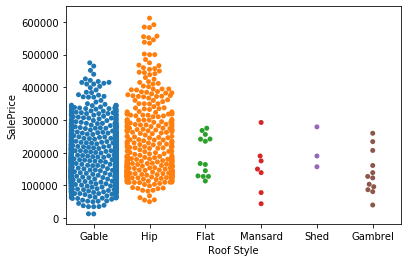

In [174]:
sns.swarmplot(train_full["Roof Style"],train_full["SalePrice"])

train_full.groupby(by = "Roof Style")["SalePrice"].mean()

#### e) Roof Material

Roof Matl
ClyTile    160000.000000
CompShg    180849.197037
Membran    241500.000000
Tar&Grv    187948.933333
WdShake    264250.000000
WdShngl    339400.000000
Name: SalePrice, dtype: float64

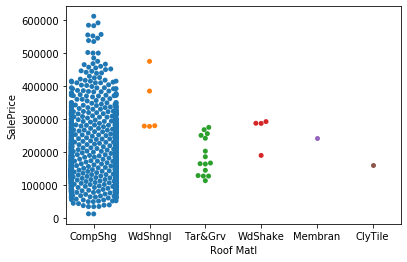

In [175]:
sns.swarmplot(train_full["Roof Matl"],train_full["SalePrice"])

train_full.groupby(by = "Roof Matl")["SalePrice"].mean()

#### f) Exterior Types

Exterior 1st
AsphShn     82375.000000
CBlock      93250.000000
AsbShng    103183.333333
BrkComm    131000.000000
Stucco     139712.962963
Wd Sdng    142940.887681
MetalSd    154402.048338
WdShing    155616.822222
HdBoard    159582.473333
Plywood    170511.453947
BrkFace    193055.093750
VinylSd    218174.082873
CemntBd    243429.088889
Stone      258500.000000
ImStucc    262000.000000
Name: SalePrice, dtype: float64

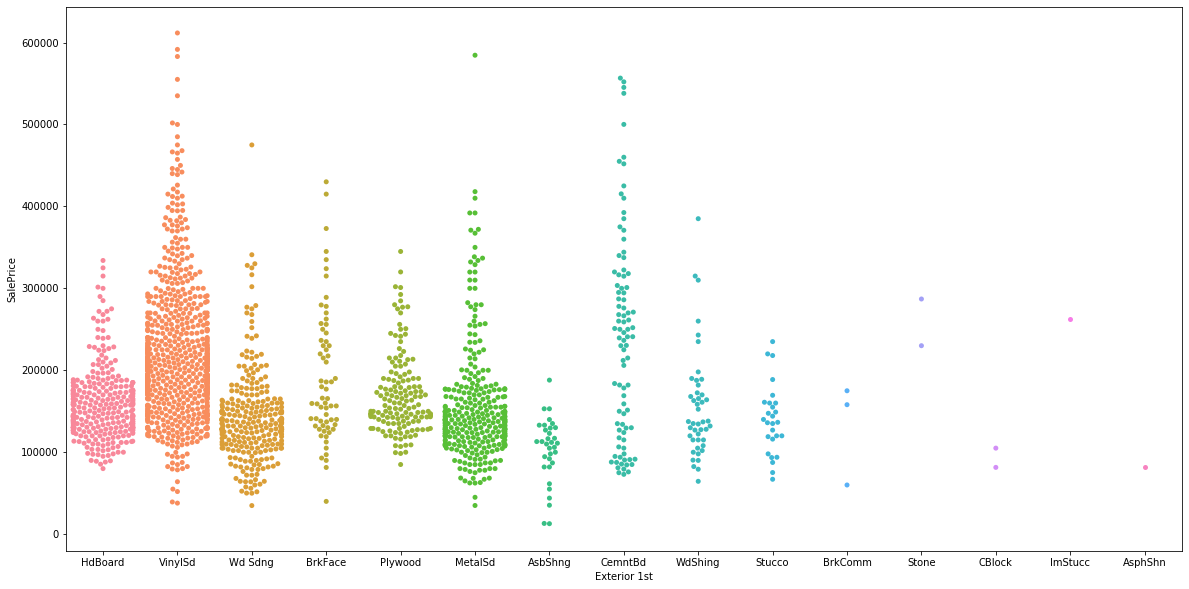

In [176]:
plt.subplots(figsize=(20,10))
sns.swarmplot(train_full["Exterior 1st"],train_full["SalePrice"])
train_full.groupby(by = "Exterior 1st")["SalePrice"].mean().sort_values()

Exterior 2nd
CBlock      92000.000000
AsbShng    107108.928571
AsphShn    132125.000000
Brk Cmn    139958.823529
Stone      145420.666667
Wd Sdng    145654.396947
Stucco     147725.333333
Wd Shng    154244.444444
MetalSd    155978.635802
HdBoard    160836.880000
Plywood    166485.713514
BrkFace    187992.647059
VinylSd    217798.685160
ImStucc    227472.727273
CmentBd    239540.200000
Name: SalePrice, dtype: float64

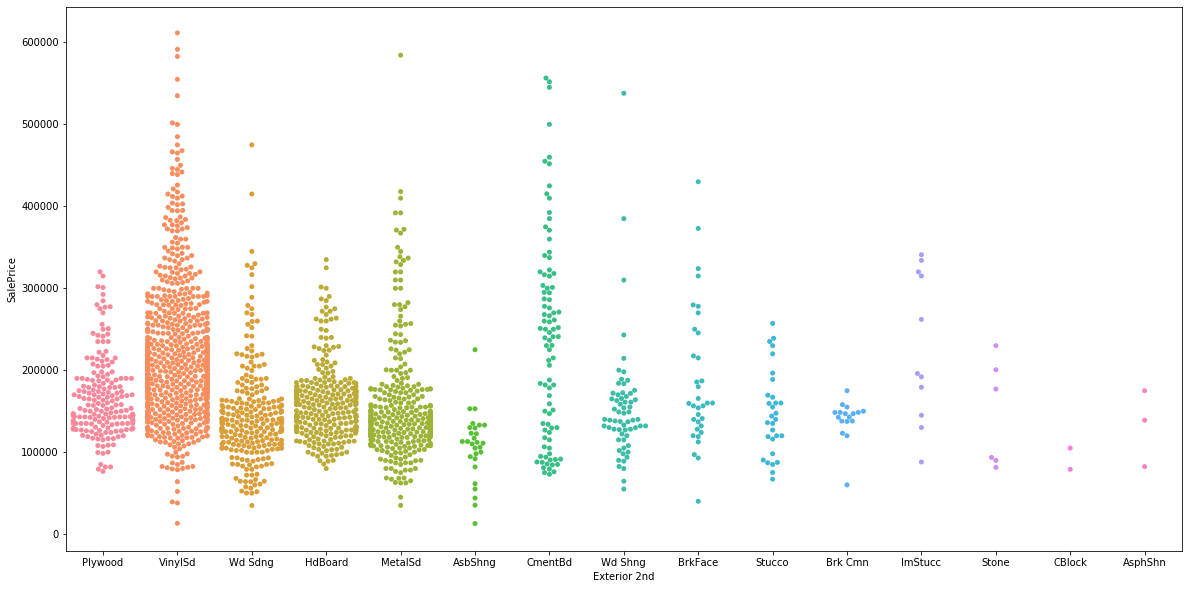

In [177]:
plt.subplots(figsize=(20,10))
sns.swarmplot(train_full["Exterior 2nd"],train_full["SalePrice"])
train_full.groupby(by = "Exterior 2nd")["SalePrice"].mean().sort_values()

Each of the exterior features results in a wide range of prices. Alone, this is likely not a great feature. However, some of the lower grade features like AsbShng have a narrower range in price, and checking for this quality may enable prediction of a lower priced house

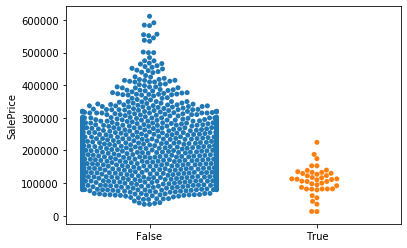

In [178]:
# create series that checks for any of the 3 low grade exteriors (associated with lower sales price),
# and plot sales price for both groups
low_grade_exterior = ((train_full["Exterior 1st"] == "AsphShn") |
                      (train_full["Exterior 2nd"] == "AsphShn") |
                      (train_full["Exterior 1st"] == "AsbShng") |
                      (train_full["Exterior 2nd"] == "AsbShng") |
                      (train_full["Exterior 1st"] == "CBlock") |
                      (train_full["Exterior 2nd"] == "CBlock"))
sns.swarmplot(low_grade_exterior, train_full["SalePrice"])

Houses with a low grade exterior are shown to have lower sales prices, which is a useful feature.

#### g) Exterior Quality and Condition

Exter Qual
Ex    374460.308642
Fa     89801.192308
Gd    230802.484935
TA    143270.978348
Name: SalePrice, dtype: float64

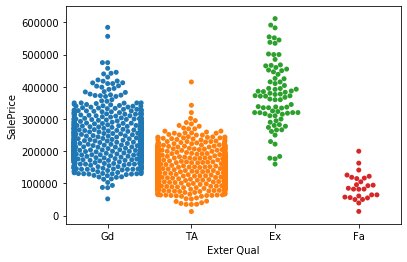

In [179]:
sns.swarmplot(train_full["Exter Qual"],train_full["SalePrice"])
train_full.groupby(by="Exter Qual")["SalePrice"].mean()

Exter Cond
Ex    236263.857143
Fa    102507.693878
Gd    167623.023256
Po     44800.000000
TA    185258.202475
Name: SalePrice, dtype: float64

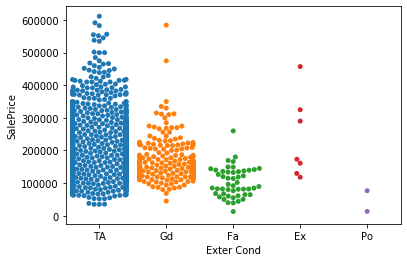

In [180]:
sns.swarmplot(train_full["Exter Cond"],train_full["SalePrice"])
train_full.groupby(by="Exter Cond")["SalePrice"].mean()

Exterior quality and condition ratings separately tends to have a broad range of sales price within each category but do have noticeably higher sales prices for better ratings. Combining these two scores may create groups of houses with less overlapping sales price distributions. 

3      13100.000000
4      77668.000000
5     110374.571429
6     143748.523674
7     215281.353904
9     299161.750000
8     307054.080882
10    307500.000000
Name: SalePrice, dtype: float64

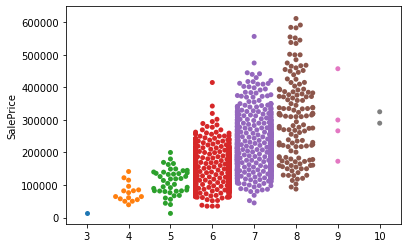

In [38]:
# Create combined exterior rating by converting quality and condition into 1-5 scales and summing them together
exter_qual_dict = {"Po" : 1,
                   "Fa" : 2,
                   "TA" : 3,
                   "Gd" : 4,
                   "Ex" : 5}
exter_qual_rating = train_full["Exter Qual"].map(exter_qual_dict)
exter_cond_rating = train_full["Exter Cond"].map(exter_qual_dict)

exter_total_rating = exter_qual_rating + exter_cond_rating
sns.swarmplot(exter_total_rating, train_full["SalePrice"])

train_full.groupby(by = exter_total_rating)["SalePrice"].mean().sort_values()

a combined exterior rating creates more distinct groups of higher and lower priced houses, though the range of prices is still broad at higher ratings. Below analysis combines exterior ratings with exterior types to further refine ability to use this feature. 

#### h) Foundation

Foundation
BrkTil    129050.190045
CBlock    148415.530707
PConc     227676.483801
Slab      108810.676471
Stone     143235.200000
Wood      173750.000000
Name: SalePrice, dtype: float64

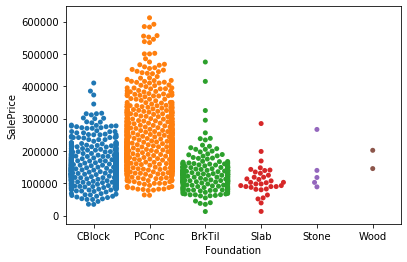

In [184]:
sns.swarmplot(train_full["Foundation"],train_full["SalePrice"])
train_full.groupby(by="Foundation")["SalePrice"].mean()

Foundations are typically either concrete or cinderblock, which have a broad range of prices, while others are more narrowly concetrated at lower prices. If able to isolate the PConc and CBlock houses with higher prices via interactions with other variables, this could be a useful feature.

#### i) Mas Vnr Type and Area

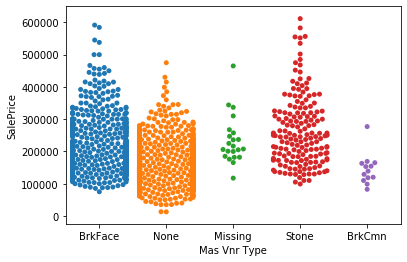

In [186]:
sns.swarmplot(train_full["Mas Vnr Type"],train_full["SalePrice"])

(0, 600000)

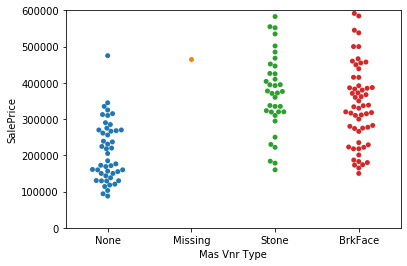

In [187]:
sns.swarmplot(train_full[exter_total_rating > 7]["Mas Vnr Type"],
              train_full[exter_total_rating > 7]["SalePrice"])
plt.ylim(0,600_000)

Masonry veneer types dont have noticeably different sales price distributions, and even within a category, the range of sales prices is large. As such, this is not an extremely useful feature alone. Filtering for high exterior ratings does not seem to improve the distributions enough for this feature to be highly useful.

No Vnr Area: 155383.3255250404
Low Vnr Area: 192455.31980906922
Med Vnr Area: 241393.14285714287
High Vnr Area: 377463.93333333335


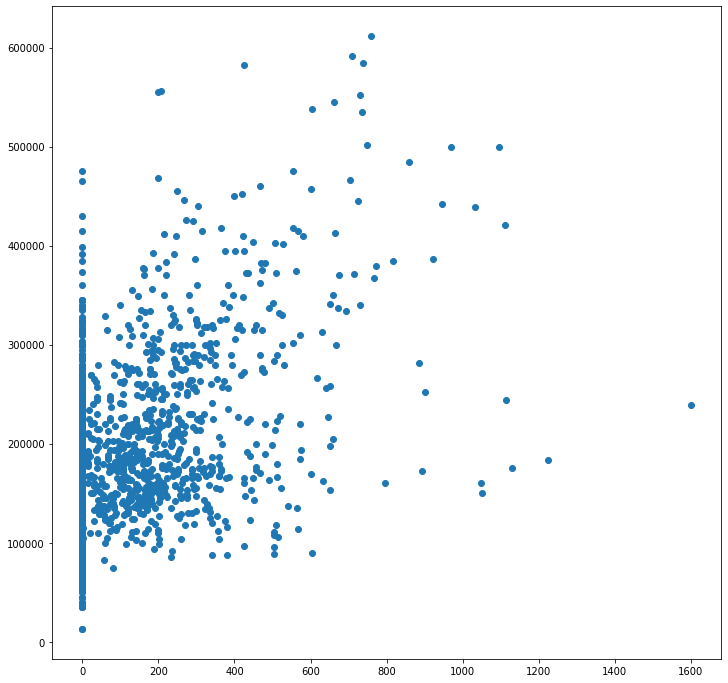

In [188]:
fig, ax = plt.subplots(figsize = (12,12))
plt.scatter(x = train_full["Mas Vnr Area"], y = train_full["SalePrice"])


print("No Vnr Area: " + str(train_full[train_full["Mas Vnr Area"] == 0]["SalePrice"].mean()))
print("Low Vnr Area: " + str(train_full[(train_full["Mas Vnr Area"] > 0) & 
                                    (train_full["Mas Vnr Area"] <= 200)]["SalePrice"].mean()))
print("Med Vnr Area: " + str(train_full[(train_full["Mas Vnr Area"] > 200) & 
                                    (train_full["Mas Vnr Area"] <= 700)]["SalePrice"].mean()))
print("High Vnr Area: " + str(train_full[train_full["Mas Vnr Area"] > 700]["SalePrice"].mean()))

the correlation between Mas Vnr Area and sales price appears to be low, though average sales price does increase as Vnr Area increases. This is not a great predictor and can be deprioritized for inclusion in the model.

### Building Type and Construction Features Engineering


In [39]:
#Foundation dummy variable

train_full["Fondation_Slab"] = train_full["Foundation"].map(lambda x: 1 if x == "Slab" else 0)

test_full["Fondation_Slab"] = test_full["Foundation"].map(lambda x: 1 if x == "Slab" else 0)

In [40]:
# MS Zoning

train_full["MS Zone Ag Com Ind"] = train_full["MS Zoning"].map(lambda x: 1 if ((x == "A (agr)") | 
                                                                               (x == "C (all)") |
                                                                               (x == "I (all)")) else 0)
test_full["MS Zone Ag Com Ind"] = test_full["MS Zoning"].map(lambda x: 1 if ((x == "A (agr)") | 
                                                                               (x == "C (all)") |
                                                                               (x == "I (all)")) else 0)

train_full["MS Zone RM"] = train_full["MS Zoning"].map(lambda x: 1 if x == "RM" else 0)
test_full["MS Zone RM"] = test_full["MS Zoning"].map(lambda x: 1 if x == "RM" else 0)

In [41]:
# Roof Material

train_full["Roof_Wd"] = train_full["Roof Matl"].map(lambda x: 1 if (x == "WdShngl") | (x == "WdShake") else 0)
test_full["Roof_Wd"] = test_full["Roof Matl"].map(lambda x: 1 if (x == "WdShngl") | (x == "WdShake") else 0)

In [42]:
#Roof Style

train_full["Hip Roof"] = train_full["Roof Style"].map(lambda x: 1 if x == "Hip" else 0)

test_full["Hip Roof"] = test_full["Roof Style"].map(lambda x: 1 if x == "Hip" else 0)

In [43]:
# Exterior Quality and Condition

train_full = pd.concat([train_full, pd.get_dummies(train_full["Exter Qual"], prefix = "Exter Qual")], axis=1)
test_full = pd.concat([test_full, pd.get_dummies(test_full["Exter Qual"], prefix = "Exter Qual")], axis=1)

train_full = pd.concat([train_full, pd.get_dummies(train_full["Exter Cond"], prefix = "Exter Cond")], axis=1)
test_full = pd.concat([test_full, pd.get_dummies(test_full["Exter Cond"], prefix = "Exter Cond")], axis=1)

In [44]:
# Exterior Type

train_full["Low_Grade_Exterior"] = ((train_full["Exterior 1st"] == "AsphShn") |
                                    (train_full["Exterior 2nd"] == "AsphShn") |
                                    (train_full["Exterior 1st"] == "AsbShng") |
                                    (train_full["Exterior 2nd"] == "AsbShng") |
                                    (train_full["Exterior 1st"] == "CBlock") |
                                    (train_full["Exterior 2nd"] == "CBlock")).map(lambda x: 1 if x == True else 0)

test_full["Low_Grade_Exterior"] = ((test_full["Exterior 1st"] == "AsphShn") |
                                    (test_full["Exterior 2nd"] == "AsphShn") |
                                    (test_full["Exterior 1st"] == "AsbShng") |
                                    (test_full["Exterior 2nd"] == "AsbShng") |
                                    (test_full["Exterior 1st"] == "CBlock") |
                                    (test_full["Exterior 2nd"] == "CBlock")).map(lambda x: 1 if x == True else 0)

In [45]:
# Mas Vnr Type Dummy Creation

train_full["Low Grade Mas Vnr"] = train_full["Mas Vnr Type"].map(lambda x: 1 if x == "BrkCmn" else 0)

test_full["Low Grade Mas Vnr"] = test_full["Mas Vnr Type"].map(lambda x: 1 if x == "BrkCmn" else 0)

train_full["Stone Mas Vnr"] = train_full["Mas Vnr Type"].map(lambda x: 1 if x == "Stone" else 0)

test_full["Stone Mas Vnr"] = test_full["Mas Vnr Type"].map(lambda x: 1 if x == "Stone" else 0)

### Outdoor Features:

    Pool
    Porch and Deck Space
    Fence
    Misc Features

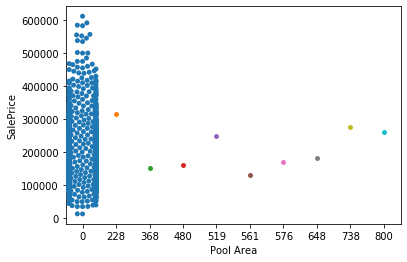

In [191]:
sns.swarmplot(x = train_full["Pool Area"], y = train_full["SalePrice"])

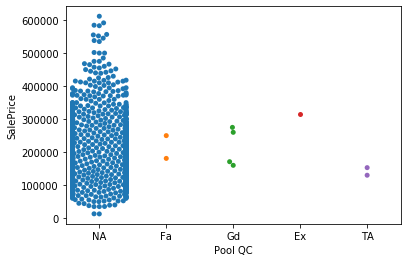

In [192]:
sns.swarmplot(train_full["Pool QC"],train_full["SalePrice"])

given how few pools exist within the data, it does not seem that presence of a pool or its quality noticeably impacts sale price

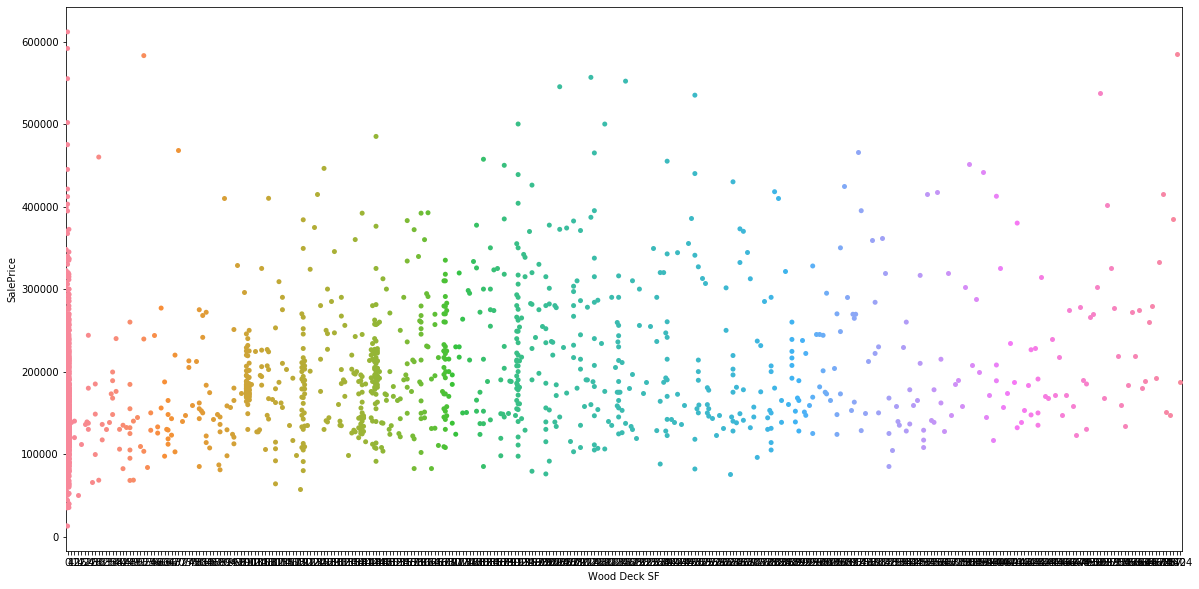

In [193]:
plt.subplots(figsize=(20,10))
sns.swarmplot(x = train_full["Wood Deck SF"], y = train_full["SalePrice"])

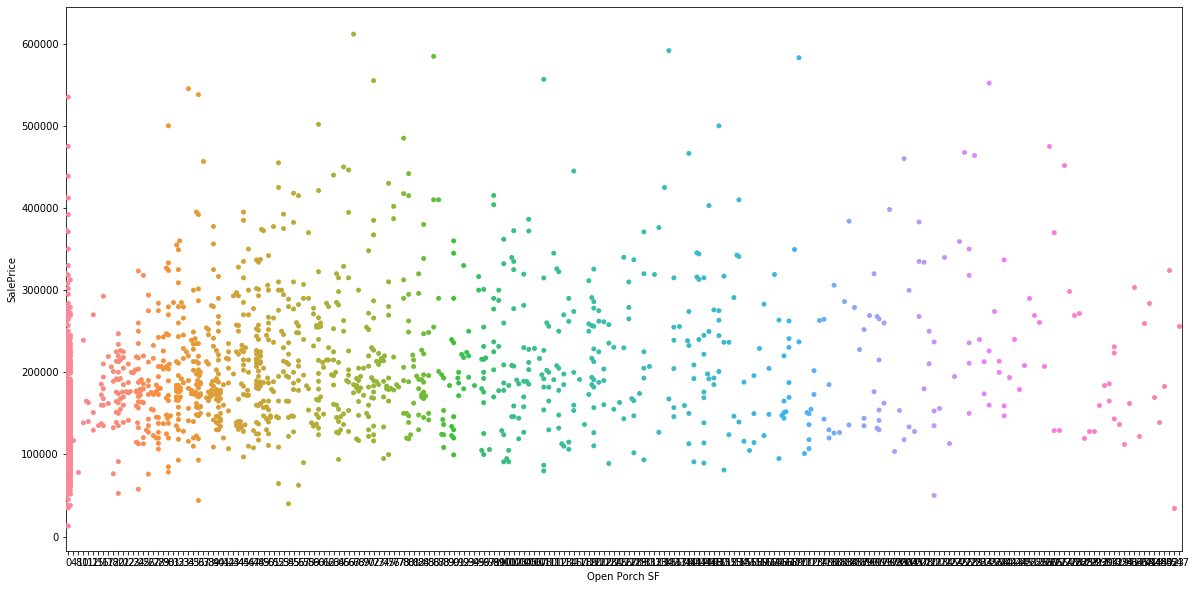

In [194]:
plt.subplots(figsize=(20,10))
sns.swarmplot(x = train_full["Open Porch SF"], y = train_full["SalePrice"])

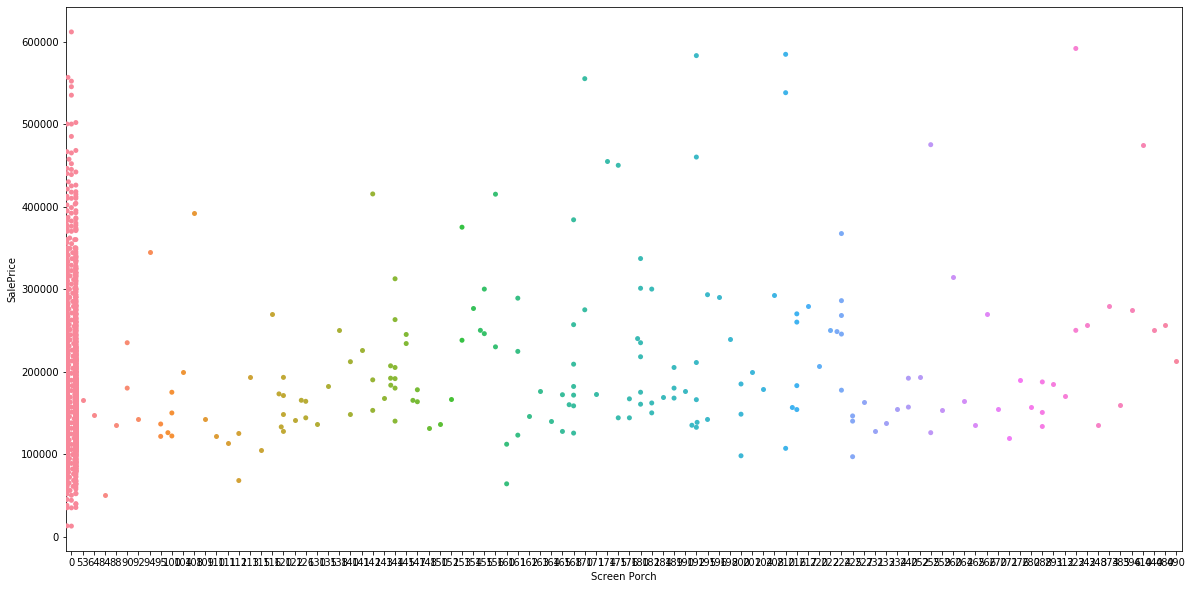

In [195]:
plt.subplots(figsize=(20,10))
sns.swarmplot(x = train_full["Screen Porch"], y = train_full["SalePrice"])

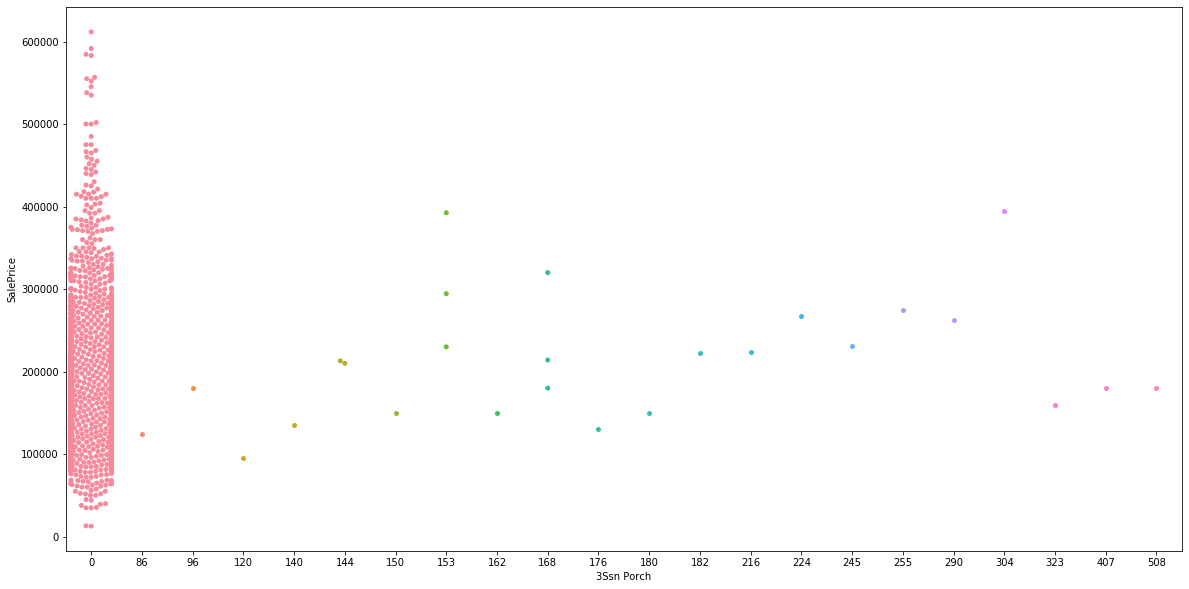

In [196]:
plt.subplots(figsize=(20,10))
sns.swarmplot(x = train_full["3Ssn Porch"], y = train_full["SalePrice"])

130045.72301425663
197655.06923076924


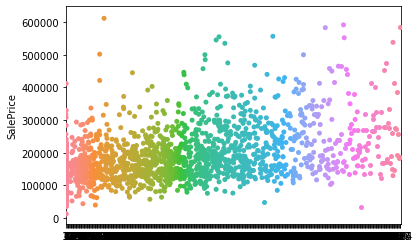

In [197]:
total_porch_space = (train_full["3Ssn Porch"] +
                     train_full["Screen Porch"] +
                     train_full["Open Porch SF"] +
                     train_full["Wood Deck SF"])
sns.swarmplot(total_porch_space, train_full["SalePrice"])

print(train_full[total_porch_space == 0]["SalePrice"].mean())
print(train_full[total_porch_space > 0]["SalePrice"].mean())

Among all porch SF metrics, there is not a noticeably large impact of having a porch on sale price, specially considering how few houses have a porch

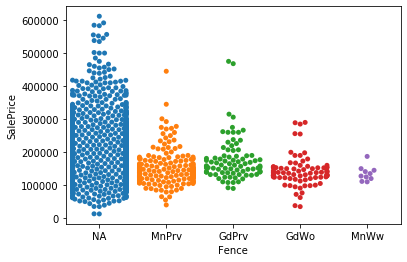

In [198]:
sns.swarmplot(train_full["Fence"], train_full["SalePrice"])

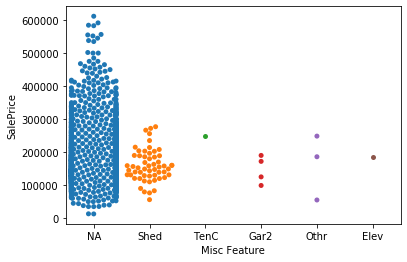

In [199]:
sns.swarmplot(train_full["Misc Feature"], train_full["SalePrice"])

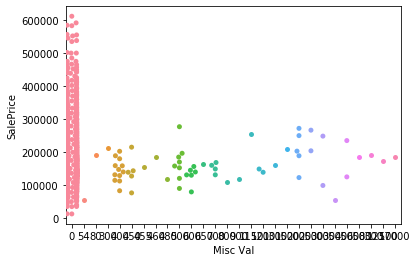

In [203]:

sns.swarmplot(train_full["Misc Val"], train_full["SalePrice"])

### Outdoor Features Summary
Similar to pools, neither fences nor other miscellaneous features have a noticeable impact on sales price. In summary, none of the outdoor features seem to be particularly useful for identifying high priced homes, especially as these features are all relatively uncommon and homes with these features do not have noticeably different sales prices.

### Lot Characteristics

    Lot Area and Frontage
    Street/Alley - type of acess to property
    Lot Shape
    Land Contour
    Lot Configuration
    Land Slope
    Condition 1 - proximity to main road
    Condition 2 - proximity to main road


(0, 25000)

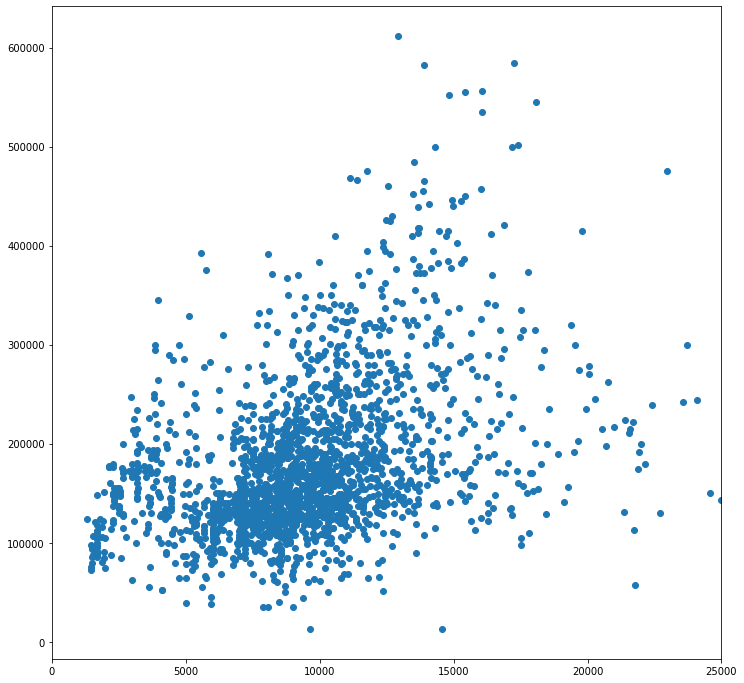

In [204]:
fig, ax = plt.subplots(figsize = (12,12))
plt.scatter(x = train_full["Lot Area"], y = train_full["SalePrice"])
plt.xlim(0,25_000)

Lot area has a very weakly positive relationship with sales price and is not a priority feature for inclusion

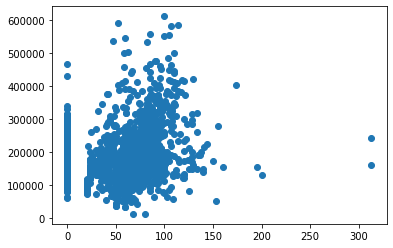

In [202]:
plt.scatter(x = train_full["Lot Frontage"], y = train_full["SalePrice"])

Similar to lot area, there is a positive relationship between lot frontage and sales price, but it is weak and likely won't add value

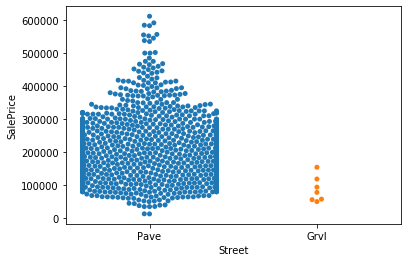

In [205]:
sns.swarmplot(train_full["Street"], train_full["SalePrice"])

Though there aren't many streets with gravel access, intuitively it makes sense that these types of houses would cost/sell for less than those with paved streets. As such, this feature is worth inclusion as a singular dummy variable

Alley
Grvl                  120835.635294
NA No alley access    184366.258503
Pave                  174534.709091
Name: SalePrice, dtype: float64

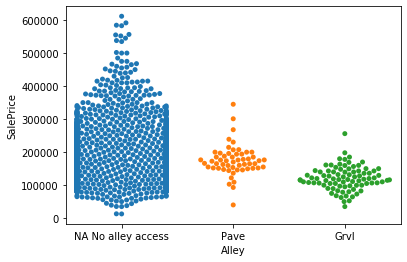

In [206]:
sns.swarmplot(train_full["Alley"], train_full["SalePrice"])

train_full.groupby(by = "Alley")["SalePrice"].mean()

Similar to street access, alleys with gravel access also have lower prices compared to no alley or paved alleys

(0, 600000)

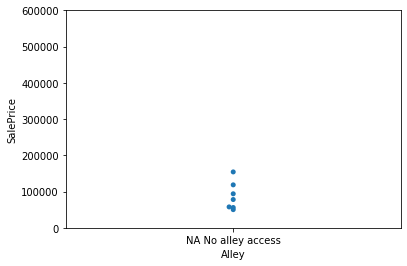

In [207]:
sns.swarmplot(train_full[train_full["Street"] == "Grvl"]["Alley"], train_full[train_full["Street"] == "Grvl"]["SalePrice"])
plt.ylim(0,600_000)

houses with a gravel street access have no alley, so it will be useful to check for gravel street or alley as a feature to slightly increase the number of lower priced houses captured.

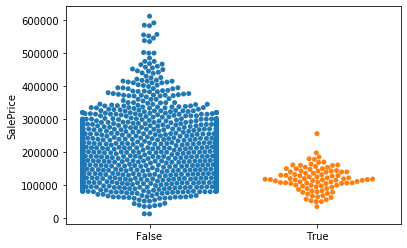

In [208]:
gravel_street_or_alley = (train_full["Street"] == "Grvl") | (train_full["Alley"] == "Grvl")
sns.swarmplot(gravel_street_or_alley, train_full["SalePrice"])

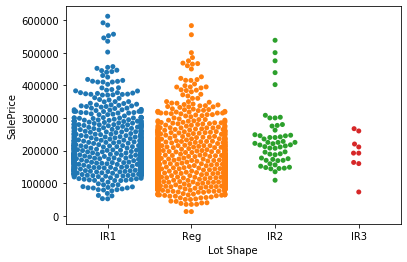

In [209]:
sns.swarmplot(train_full["Lot Shape"], train_full["SalePrice"])

Lot shapes in general do not seem to have a noticeable impact on sales price, though in particular the irregular 3 (IR3) features does seem to be limited to slightly lower priced housing

Land Contour
Bnk    142868.775000
HLS    262353.376471
Low    199313.116279
Lvl    178998.564840
Name: SalePrice, dtype: float64

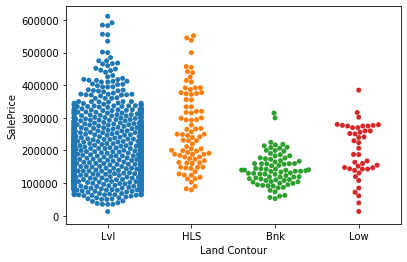

In [210]:
sns.swarmplot(train_full["Land Contour"], train_full["SalePrice"])
train_full.groupby(by = "Land Contour")["SalePrice"].mean()

The only category with a noticeably different distribution and mean sales price is for land contours that are banks. Inclusion in the model may be most valuable as a dummy variable for presence of bank countour

Lot Config
Corner     180629.591954
CulDSac    230744.358779
FR2        174703.600000
FR3        198600.000000
Inside     177537.014637
Name: SalePrice, dtype: float64

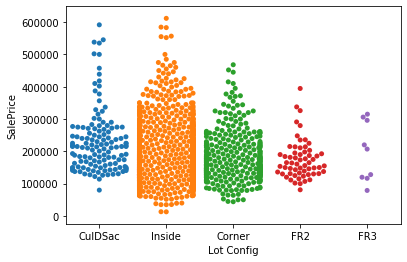

In [211]:
sns.swarmplot(train_full["Lot Config"], train_full["SalePrice"])

train_full.groupby(by = "Lot Config")["SalePrice"].mean()

Cul de sac lot configuration is the only category with a meaningfully different distribution towards a higher sales price, including a higher mean, and therefore presence of cul de sac could be a dummy variable worth testing.

Land Slope
Gtl    180358.476703
Mod    204639.465909
Sev    194598.000000
Name: SalePrice, dtype: float64

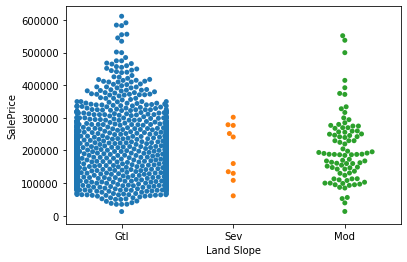

In [212]:
sns.swarmplot(train_full["Land Slope"], train_full["SalePrice"])

train_full.groupby(by = "Land Slope")["SalePrice"].mean()

Land slope seems to have almost no impact on sales price and is not worth including as a feature

Condition 1
Artery    128765.000000
Feedr     143223.605505
Norm      185007.310130
PosA      254733.333333
PosN      254794.296296
RRAe      139685.714286
RRAn      172604.777778
RRNe      129616.666667
RRNn      198208.333333
Name: SalePrice, dtype: float64

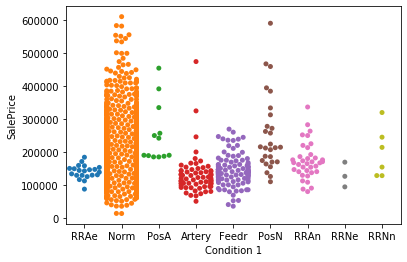

In [213]:
sns.swarmplot(train_full["Condition 1"], train_full["SalePrice"])

train_full.groupby(by = "Condition 1")["SalePrice"].mean()

Condition 1 = proximity to main road, with categories:

    Artery Adjacent to arterial street
    Feedr Adjacent to feeder street
    Norm Normal
    RRNn Within 200' of North-South Railroad
    RRAn Adjacent to North-South Railroad
    PosN Near positive off-site feature--park, greenbelt, etc.
    PosA Adjacent to postive off-site feature
    RRNe Within 200' of East-West Railroad
    RRAe Adjacent to East-West Railroad
    
 Houses near features like parks seem to garner higher sales prices compared to "normal houses", whereas those adjacent to arterial streets or super close to railroads garner lower prices. These groups may be worth testing as dummy variables.

Condition 2
Artery    119050.000000
Feedr     129181.818182
Norm      181382.075556
PosA      390666.666667
PosN      395666.666667
RRAe      190000.000000
RRAn      136905.000000
RRNn       96750.000000
Name: SalePrice, dtype: float64

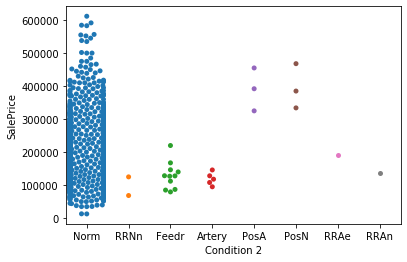

In [214]:
sns.swarmplot(train_full["Condition 2"], train_full["SalePrice"])


train_full.groupby(by = "Condition 2")["SalePrice"].mean()

The only noticeably different sales price distributions with a large sample size are for houses that arenear feeder or arterial streets for which price is lower. Although streets with a positive off-site feature nearby have higher average prices, the distribution is wide and there are very few data points, so this may not be consistent across other houses. Below, a variable to test for presence of arterial/feeder street as either condition 1 or 2 is created for potential incorporation into the model.

In [215]:
artery_or_feeder = ((train_full["Condition 1"] == "Artery") |
                    (train_full["Condition 1"] == "Artery") |
                    (train_full["Condition 2"] == "Feeder") |
                    (train_full["Condition 2"] == "Feeder"))

### Lot Characteristics Summary

To be added

### Sale Characteristics and Neighborhood

    Month and Year of Sale
    Sale Type
    MS Zoning

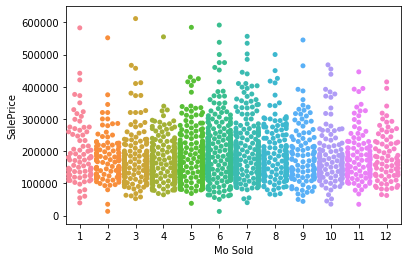

In [216]:
sns.swarmplot(x = train_full["Mo Sold"], y = train_full["SalePrice"])

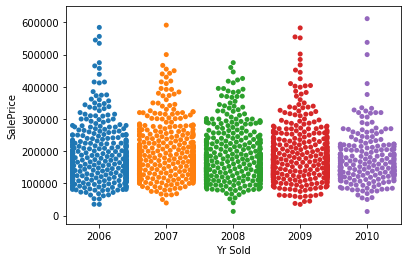

In [217]:
sns.swarmplot(x = train_full["Yr Sold"], y = train_full["SalePrice"])

Neither month nor year sold appear to have any noticeable impact on sales price 

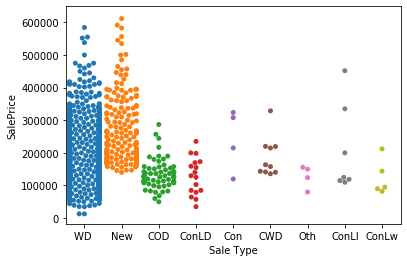

In [218]:
sns.swarmplot(train_full["Sale Type"], train_full["SalePrice"])

Sale types that are court officer deeds in particular are the only sale type category with both significantly different sale price distribution vs stadard warranty deed sales and a large enough sample size to suggest this will remain consistent across other houses.

Data dictionary:

    WD Warranty Deed - Conventional
    CWD Warranty Deed - Cash
    VWD Warranty Deed - VA Loan
    New Home just constructed and sold
    COD Court Officer Deed/Estate
    Con Contract 15% Down payment regular terms
    ConLw Contract Low Down payment and low interest
    ConLI Contract Low Interest
    ConLD Contract Low Down

MS Zoning
A (agr)     47300.000000
C (all)     78010.894737
FV         218618.316832
I (all)     57625.000000
RH         148859.571429
RL         191235.164581
RM         129119.142405
Name: SalePrice, dtype: float64

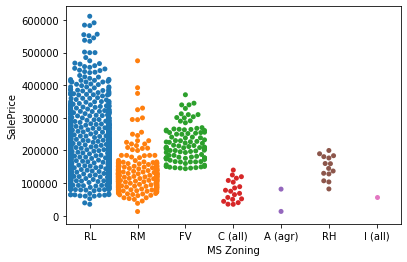

In [219]:
sns.swarmplot(train_full["MS Zoning"], train_full["SalePrice"])
train_full.groupby(by="MS Zoning")["SalePrice"].mean()

Neighborhood
MeadowV    100231.250000
IDOTRR     101103.188406
BrDale     103371.052632
OldTown    125276.300613
BrkSide    127022.697368
Edwards    130493.468531
SWISU      134758.875000
Landmrk    137000.000000
Sawyer     137181.909910
NPkVill    140476.470588
Blueste    144566.666667
NAmes      145905.816129
Mitchel    167656.707317
SawyerW    187760.160920
Greens     188666.666667
Gilbert    189228.387931
NWAmes     194619.022989
Blmngtn    200417.681818
CollgCr    202497.216667
Crawfor    205901.211268
ClearCr    217490.074074
Somerst    227183.900000
Timber     241051.354167
Veenker    253570.588235
GrnHill    280000.000000
NoRidge    316294.125000
NridgHt    322831.352459
StoneBr    329675.736842
Name: SalePrice, dtype: float64

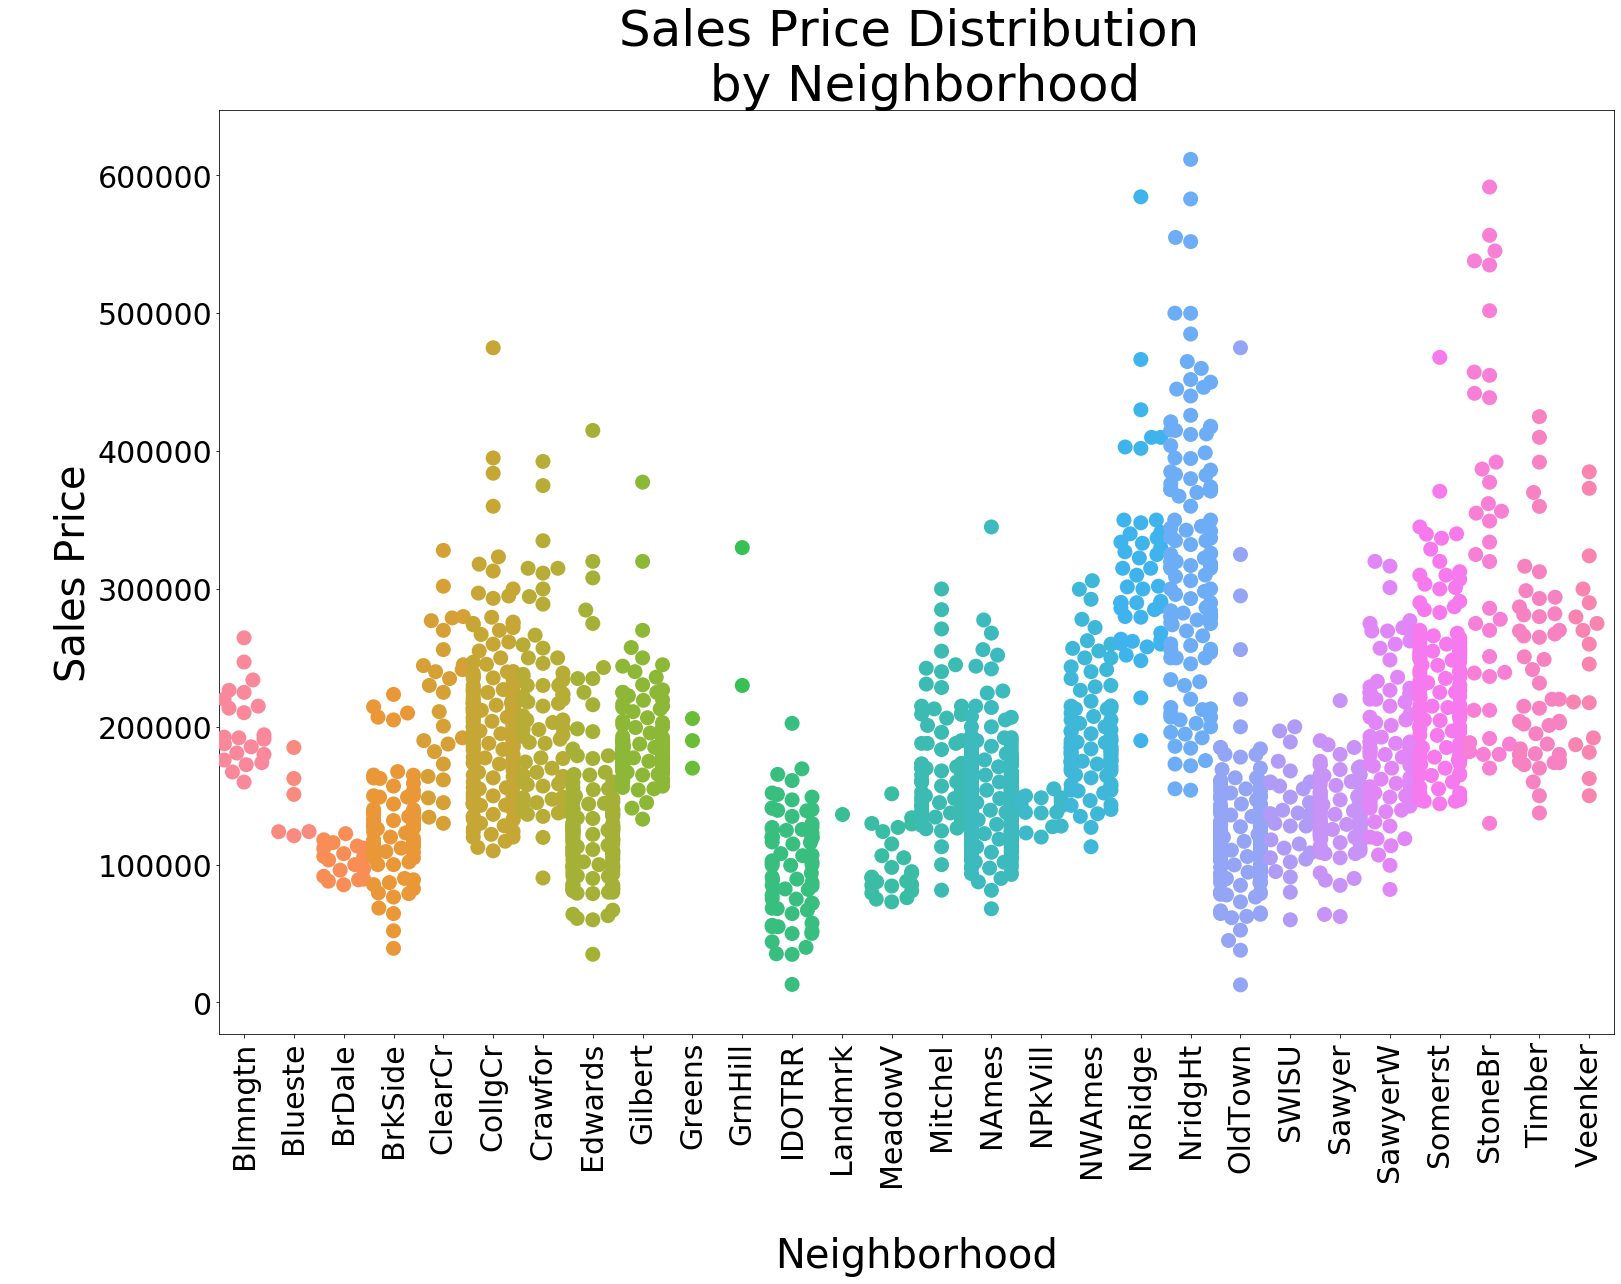

In [811]:
plt.subplots(figsize=(25,17))
sns.swarmplot(train_full["Neighborhood"].sort_values(), train_full["SalePrice"], size = 15)
plt.title("Sales Price Distribution \n by Neighborhood", fontsize = 50)
plt.xlabel("\nNeighborhood", fontsize = 40)
plt.ylabel("\nSales Price", fontsize = 40)
plt.xticks(fontsize = 30, rotation = 90)
plt.yticks(fontsize = 30)
plt.savefig("../Neighborhood Sales Prices.png")
train_full.groupby(by="Neighborhood")["SalePrice"].mean().sort_values()

Neighborhood
MeadowV    100231.250000
IDOTRR     101103.188406
BrDale     103371.052632
OldTown    125276.300613
BrkSide    127022.697368
Edwards    130493.468531
SWISU      134758.875000
Landmrk    137000.000000
Sawyer     137181.909910
NPkVill    140476.470588
Blueste    144566.666667
NAmes      145905.816129
Mitchel    167656.707317
SawyerW    187760.160920
Greens     188666.666667
Gilbert    189228.387931
NWAmes     194619.022989
Blmngtn    200417.681818
CollgCr    202497.216667
Crawfor    205901.211268
ClearCr    217490.074074
Somerst    227183.900000
Timber     241051.354167
Veenker    253570.588235
GrnHill    280000.000000
NoRidge    316294.125000
NridgHt    322831.352459
StoneBr    329675.736842
Name: SalePrice, dtype: float64

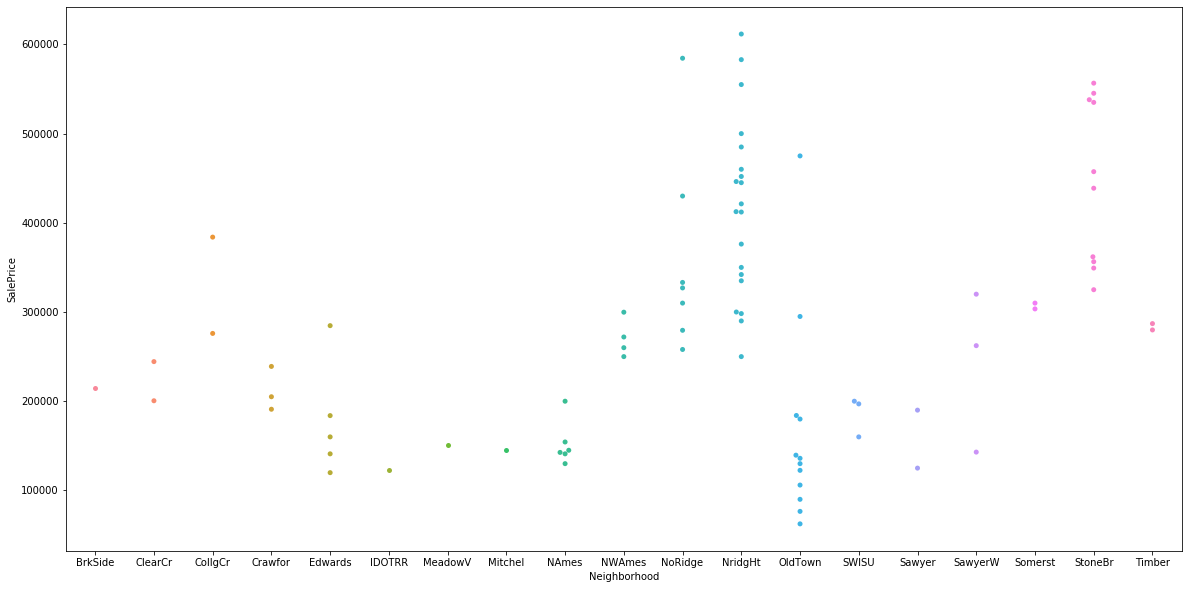

In [520]:
plt.subplots(figsize=(20,10))
sns.swarmplot(train_full[train_full["TotRms AbvGrd"]>9]["Neighborhood"].sort_values(), train_full["SalePrice"])

train_full.groupby(by="Neighborhood")["SalePrice"].mean().sort_values()

Neighborhoods do have a noticeable impact on price, however some neighborhoods have much wider distributions in sales price than others. However, given that only a few neighborhoods contain houses with extremely high or extremely low prices, this could be a strong predictor of price.

# Model Building 

Model building below occurs in two major steps.

##### Dummy Creation
    First, dummy variables are created based on analysis above for a wide variety of features.

##### Feature Selection and Iteration
    Then, the model is built by adding one or a few features at a time, with each added feature picked to be the greatest improvement in R^2 and RMSE such that only strong features are added and risk of multicollinearity is reduced.

### Dummy and New Feature Creation

In [235]:
# Grave alley or street dummy

train_full["Gravel Alley or Street"] = ((train_full["Alley"] == "Grvl") | 
                                        (train_full["Street"] == "Grvl")).map(lambda x: 1 if x == True else 0)
test_full["Gravel Alley or Street"] = ((test_full["Alley"] == "Grvl") | 
                                        (test_full["Street"] == "Grvl")).map(lambda x: 1 if x == True else 0)

In [237]:
# Artery or Feeder lot condition

train_full["Artery or Feeder"] = ((train_full["Condition 1"] == "Artery") |
                                  (train_full["Condition 1"] == "Feedr") |
                                  (train_full["Condition 2"] == "Artery") |
                                  (train_full["Condition 2"] == "Feedr")).map(lambda x: 1 if x == True else 0)

test_full["Artery or Feeder"] = ((test_full["Condition 1"] == "Artery") |
                                  (test_full["Condition 1"] == "Feedr") |
                                  (test_full["Condition 2"] == "Artery") |
                                  (test_full["Condition 2"] == "Feedr")).map(lambda x: 1 if x == True else 0)

In [269]:
# COD Sale Type

train_full["COD Sale Type"] = train_full["Sale Type"].map(lambda x: 1 if x == "COD" else 0)
test_full["COD Sale Type"] = test_full["Sale Type"].map(lambda x: 1 if x == "COD" else 0)

In [259]:
# House Style and Bldg Type dummies

train_full = pd.concat([train_full, pd.get_dummies(train_full["House Style"], prefix = "House Style")], axis=1)
test_full = pd.concat([test_full, pd.get_dummies(test_full["House Style"], prefix = "House Style")], axis=1)


train_full["1Fam or TwnhsE"] = train_full["Bldg Type"].map(lambda x: 1 if (x == "1Fam") | (x == "TwnhsE") else 0)
test_full["1Fam or TwnhsE"] = test_full["Bldg Type"].map(lambda x: 1 if (x == "1Fam") | (x == "TwnhsE") else 0)

In [265]:
# Banked land contour

train_full["Banked Land Contour"] = train_full["Land Contour"].map(lambda x: 1 if x == "Bank" else 0)
test_full["Banked Land Contour"] = test_full["Land Contour"].map(lambda x: 1 if x == "Bank" else 0)

In [603]:
# Neighborhood dummies

train_full = pd.concat([train_full, pd.get_dummies(train_full["Neighborhood"])], axis=1)
test_full = pd.concat([test_full, pd.get_dummies(test_full["Neighborhood"])], axis=1)

test_full["GrnHill"] = test_full["Neighborhood"].map (lambda x: 0)
test_full["Landmrk"] = test_full["Neighborhood"].map (lambda x: 0)
 

In [631]:
#Has porch

train_full["Has Porch"] = ((train_full["3Ssn Porch"] +
                            train_full["Screen Porch"] +
                            train_full["Open Porch SF"] +
                            train_full["Wood Deck SF"]) > 0).map(lambda x: 1 if True else 0)

test_full["Has Porch"] = ((test_full["3Ssn Porch"] +
                            test_full["Screen Porch"] +
                            test_full["Open Porch SF"] +
                            test_full["Wood Deck SF"]) > 0).map(lambda x: 1 if True else 0)

train_full["Total Porch SF"] = (train_full["3Ssn Porch"] +
                            train_full["Screen Porch"] +
                            train_full["Open Porch SF"] +
                            train_full["Wood Deck SF"])
test_full["Total Porch SF"] = (test_full["3Ssn Porch"] +
                            test_full["Screen Porch"] +
                            test_full["Open Porch SF"] +
                            test_full["Wood Deck SF"])

In [643]:
#is cul de sac lot
train_full["Cul De Sac"] = train_full["Lot Config"].map(lambda x: 1 if x == "CulDSac" else 0)
test_full["Cul De Sac"] = test_full["Lot Config"].map(lambda x: 1 if x == "CulDSac" else 0)

### Feature Selection and Iteration

Large cell below contains step by step feature selection at the top, followed by model instantiation, including train-test split and cross validation. Comments above each feature iteration include which features were added with a small note at the end denoting R^2 score and RMSE, respectively.

In [859]:
# sq ft  = .6, 53K
features = ["Log 1st Flr SF", "2nd Flr SF", "Log Total Bsmt SF"]

# sq ft, overall qua  = 0.78, 36K

features = ["Log 1st Flr SF", "2nd Flr SF", "Log Total Bsmt SF",
           "Overall_Qual_2", "Overall_Qual_3", "Overall_Qual_4", "Overall_Qual_5", "Overall_Qual_6",
           "Overall_Qual_7", "Overall_Qual_8", "Overall_Qual_9", "Overall_Qual_10"]

# sq ft, overall qual, baths = 0.81, 33.9K
features = ["Log 1st Flr SF", "2nd Flr SF", "Log Total Bsmt SF",
           "Overall_Qual_2", "Overall_Qual_3", "Overall_Qual_4", "Overall_Qual_5", "Overall_Qual_6",
           "Overall_Qual_7", "Overall_Qual_8", "Overall_Qual_9", "Overall_Qual_10",
           "1_bath", "1.5_baths", "2_baths", "2.5_baths", "3_baths", "3.5_baths", "4_baths", "4.5_baths"]

# sq ft, overall qual, baths, garage cars + type = .827, 32.1K
features = ["Log 1st Flr SF", "2nd Flr SF", "Log Total Bsmt SF",
           "Overall_Qual_2", "Overall_Qual_3", "Overall_Qual_4", "Overall_Qual_5", "Overall_Qual_6",
           "Overall_Qual_7", "Overall_Qual_8", "Overall_Qual_9", "Overall_Qual_10",
           "1_bath", "1.5_baths", "2_baths", "2.5_baths", "3_baths", "3.5_baths", "4_baths", "4.5_baths",
           "Garage_3+_Attchd_BuiltIn_Fin", "Garage_3+_Attchd_BuiltIn_RFn", "Garage_3+_Attchd_BuiltIn_Unf",
            "Garage_2_Attchd_BuiltIn_Fin", "Garage_2_Attchd_BuiltIn_Unf", "Garage_2_Attchd_BuiltIn_RFn",
            "Garage_3+_Other_Types_Fin", "Garage_3+_Other_Types_Unf", "Garage_3+_Other_Types_RFn",
            "Garage_2_Other_Types_Fin", "Garage_2_Other_Types_Unf", "Garage_2_Other_Types_RFn",
            "Garage_1_Car"]

# sq ft, overall qual, baths, garage cars + type, kitchen quality = .84, 30.9K
features = ["Log 1st Flr SF", "2nd Flr SF", "Log Total Bsmt SF",
           "Overall_Qual_2", "Overall_Qual_3", "Overall_Qual_4", "Overall_Qual_5", "Overall_Qual_6",
           "Overall_Qual_7", "Overall_Qual_8", "Overall_Qual_9", "Overall_Qual_10",
           "1_bath", "2_baths", "3_baths", "4+_baths",
           "Garage_3+_Attchd_BuiltIn_Fin", "Garage_3+_Attchd_BuiltIn_RFn", "Garage_3+_Attchd_BuiltIn_Unf",
            "Garage_2_Attchd_BuiltIn_Fin", "Garage_2_Attchd_BuiltIn_Unf", "Garage_2_Attchd_BuiltIn_RFn",
            "Garage_3+_Other_Types_Fin", "Garage_3+_Other_Types_Unf", "Garage_3+_Other_Types_RFn",
            "Garage_2_Other_Types_Fin", "Garage_2_Other_Types_Unf", "Garage_2_Other_Types_RFn",
            "Garage_1_Car",
           "one_ex_kitchen", "one_gd_kitchen", "one_TA_kitchen", "one_Fa_kitchen", "one_Po_kitchen"]


# sq ft, overall qual, baths, garage cars + type, kitchen quality, neighborhoods, overall condition =0.877, 26.5K
features = ["Log 1st Flr SF", "2nd Flr SF", "Log Total Bsmt SF",
           "Overall_Qual_2", "Overall_Qual_3", "Overall_Qual_4", "Overall_Qual_5", "Overall_Qual_6",
           "Overall_Qual_7", "Overall_Qual_8", "Overall_Qual_9", "Overall_Qual_10",
           "1_bath", "1.5_baths", "2_baths", "2.5_baths", "3_baths", "3.5_baths", "4_baths", "4.5_baths",
           "Garage_3+_Attchd_BuiltIn_Fin", "Garage_3+_Attchd_BuiltIn_RFn", "Garage_3+_Attchd_BuiltIn_Unf",
            "Garage_2_Attchd_BuiltIn_Fin", "Garage_2_Attchd_BuiltIn_Unf", "Garage_2_Attchd_BuiltIn_RFn",
            "Garage_3+_Other_Types_Fin", "Garage_3+_Other_Types_Unf", "Garage_3+_Other_Types_RFn",
            "Garage_2_Other_Types_Fin", "Garage_2_Other_Types_Unf", "Garage_2_Other_Types_RFn",
            "Garage_1_Car", "one_ex_kitchen", "one_gd_kitchen", "one_TA_kitchen", "one_Fa_kitchen", "one_Po_kitchen",
            "Overall Cond_2", "Overall Cond_3", "Overall Cond_4", "Overall Cond_5", "Overall Cond_6",
            "StoneBr", "NoRidge", "NridgHt", "MeadowV", "IDOTRR", "BrDale", "OldTown", "BrkSide",
            "Edwards", "SWISU", "Landmrk", "Sawyer", "NPkVill", "Blueste", "NAmes", "Mitchel",
            "SawyerW", "Greens", "Gilbert", "NWAmes", "Blmngtn", "CollgCr", "Crawfor", "ClearCr",
            "Somerst", "Timber", "Veenker", "GrnHill"]

# variety of final features added - 0.88, 25.3K
features = ["Log 1st Flr SF", "2nd Flr SF", "Log Total Bsmt SF",
           "Overall_Qual_2", "Overall_Qual_3", "Overall_Qual_4", "Overall_Qual_5", "Overall_Qual_6",
           "Overall_Qual_7", "Overall_Qual_8", "Overall_Qual_9", "Overall_Qual_10",
           "Garage_3+_Attchd_BuiltIn_Fin", "Garage_3+_Attchd_BuiltIn_RFn", "Garage_3+_Attchd_BuiltIn_Unf",
            "Garage_2_Attchd_BuiltIn_Fin", "Garage_2_Attchd_BuiltIn_Unf", "Garage_2_Attchd_BuiltIn_RFn",
            "Garage_3+_Other_Types_Fin", "Garage_3+_Other_Types_Unf", "Garage_3+_Other_Types_RFn",
            "Garage_2_Other_Types_Fin", "Garage_2_Other_Types_Unf", "Garage_2_Other_Types_RFn",
            "Garage_1_Car", "one_ex_kitchen", "one_gd_kitchen", "one_TA_kitchen", "one_Fa_kitchen", "one_Po_kitchen",
            "Overall Cond_2", "Overall Cond_3", "Overall Cond_4", "Overall Cond_5", "Overall Cond_6",
            "StoneBr", "NoRidge", "NridgHt", "MeadowV", "IDOTRR", "BrDale", "OldTown", "BrkSide",
            "Edwards", "SWISU", "Landmrk", "Sawyer", "NPkVill", "Blueste", "NAmes", "Mitchel",
            "SawyerW", "Greens", "Gilbert", "NWAmes", "Blmngtn", "CollgCr", "Crawfor", "ClearCr",
            "Somerst", "Timber", "Veenker", "GrnHill",
           "1_bath", "1.5_baths", "2_baths", "2.5_baths", "3_baths", "3.5_baths", "4_baths", "4.5_baths",
           "Gravel Alley or Street", "Artery or Feeder", "Fondation_Slab",
           "Fireplace_Ex", "Fireplace_TA", "Fireplace_Gd", "Fireplace_Fa", "Fireplace_Po",
           "Banked Land Contour", "Func Salvage", "Func Maj2 or Sev", "COD Sale Type",
            "MS SubClass"]

# Model Instantiation and Run

X = train_full[features]
y = train_full["log_price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print("Cross Val Score: ")
print(cross_val_score(model, X_train, y_train, cv=5).mean())

print("\n")

y_pred = model.predict(X_train)

print("\n")

print("RMSE: ")
print(mean_squared_error(np.exp(y_train), np.exp(model.predict(X_train))) ** 0.5)


X_comp = test_full[features]

y_comp = np.exp(model.predict(X_comp))



Cross Val Score: 
0.8792295706203268




RMSE: 
25357.693545515576


Organize output for kaggle submission

In [703]:
submit_pd_1 = pd.DataFrame(test_full["Id"])

In [704]:
submit_pd_1["SalePrice"] = y_comp

In [705]:
submit_pd_1.shape

(879, 2)

In [706]:
submit_pd_1.head()

Id      SalePrice
0  2658  130426.768917
1  2718  151178.460328
2  2414  190159.280724
3  1989  108771.597839
4   625  177327.449383

In [707]:
submit_pd_1.to_csv("../Data/Submit9.csv", index = False)

### Model Analysis

In [708]:
train_full["Current Train Errors"] = (np.exp(y_train) - np.exp(y_pred))

In [709]:
train_full["Current Train Errors"].dropna().sort_values(ascending = False).head(10)

1671    191944.007843
1035    168399.453145
1964    154728.295806
1164    153951.907017
1136    140829.039943
1796    120399.047719
800     119124.389022
1158    119096.203025
1692    112456.436215
1758    109593.599321
Name: Current Train Errors, dtype: float64

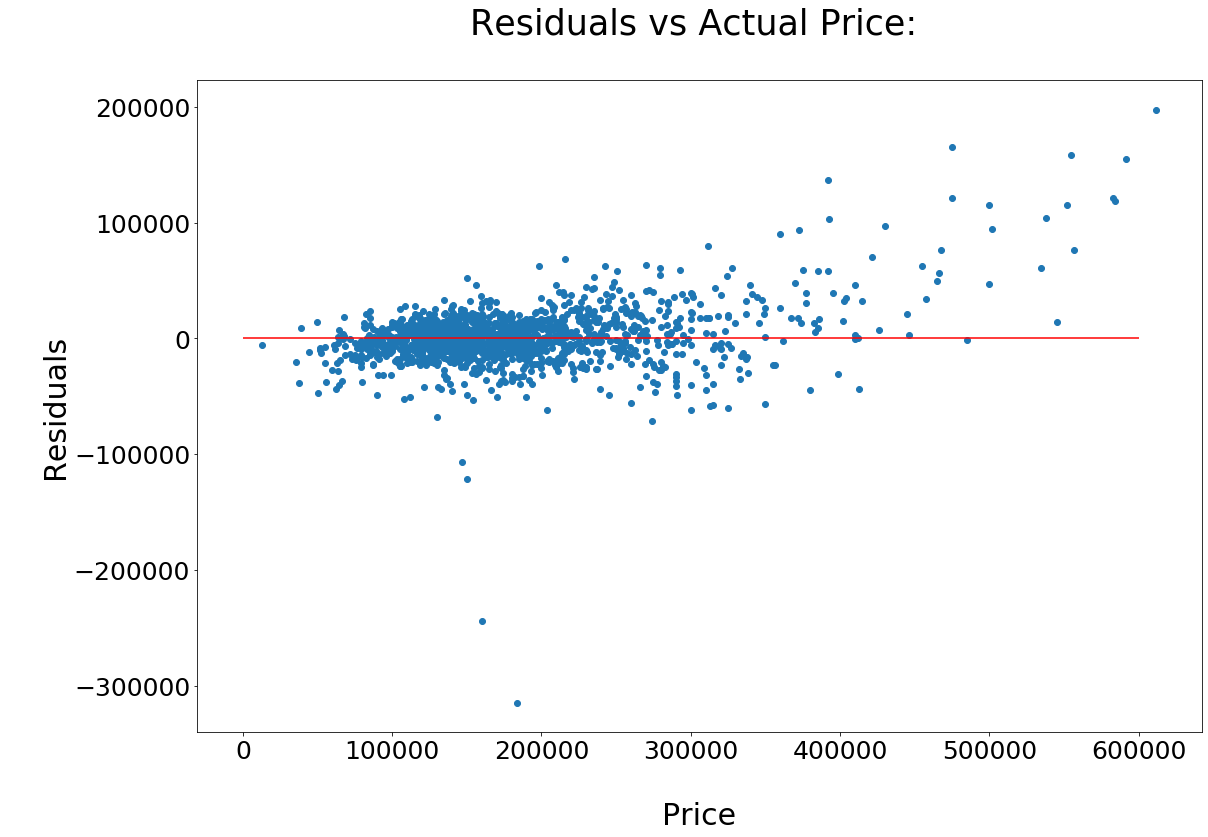

In [814]:
plt.subplots(figsize=(18,12))
plt.scatter(np.exp(y_train), np.exp(y_train) - np.exp(y_pred))
plt.hlines(y=0, xmin = 0, xmax = 600_000, color="red")
plt.xlabel("\nPrice", fontsize = 30)
plt.ylabel("\nResiduals", fontsize = 30)
plt.title("Residuals vs Actual Price: \n", fontsize = 35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.savefig("../Residuals Plot2.png");

As can be seen above, residuals are narrow and evenly distributed at lower prices, but tend to skew positive for higher priced homes. Improving the model's accurcacy requires identification of features that will increase a home's sale price. Luxury feature score in dummy variable creation section above is a potential first step to improving the analysis and will be carried through.

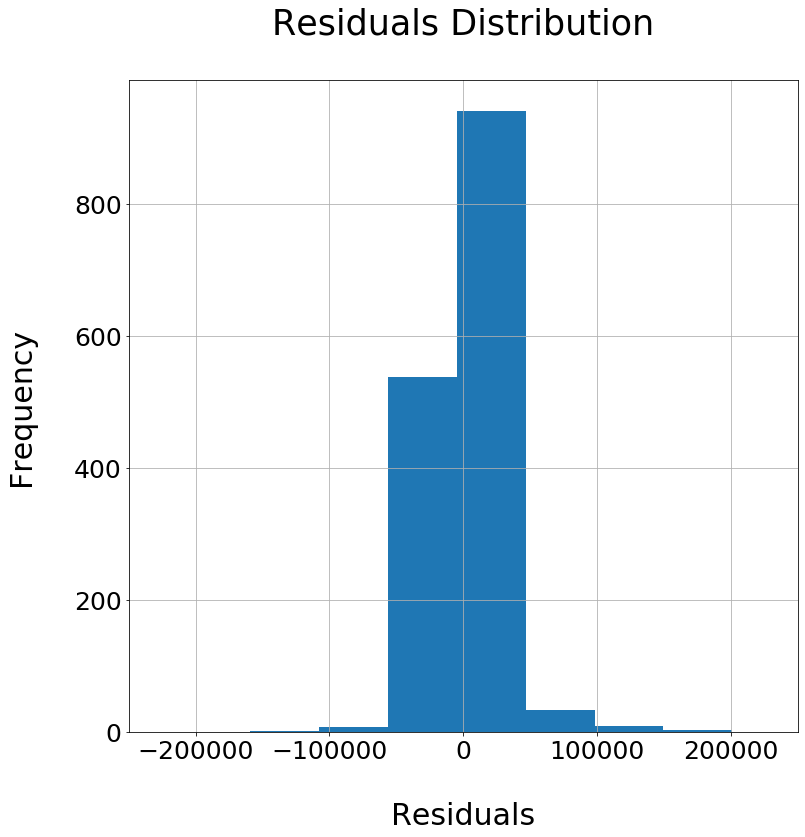

In [690]:
plt.subplots(figsize=(12,12))
(np.exp(y_train) - np.exp(y_pred)).hist()
plt.xlabel("\nResiduals", fontsize = 30)
plt.ylabel("Frequency\n", fontsize = 30)
plt.title("Residuals Distribution\n", fontsize = 35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlim(-250_000,250_000)
plt.savefig("../Residuals Hist2.png");

residuals do seem normally distributed

Below includes detailed tables for houses with high residuals in attempt to ID features that can be utilized to improve the model.

In [647]:
train_full[train_full["Current Train Errors"] > 100_000].T.iloc[51:80]

81      623     800      823     1035    1136    1158  \
Half Bath            0       1       1        1       1       0       0   
Bedroom AbvGr        1       2       2        4       4       2       3   
Kitchen AbvGr        1       1       1        1       1       1       1   
Kitchen Qual        Ex      Ex      Ex       Ex      Ex      Gd      Ex   
TotRms AbvGrd        9       8       7       12      12       7       7   
Functional         Typ     Typ     Typ      Mod     Typ     Typ     Typ   
Fireplaces           1       1       1        1       2       1       2   
Fireplace Qu        Gd      Ex      Gd       Gd      TA      Gd      Gd   
Garage Type     Attchd  Attchd  Attchd  BuiltIn  Detchd  Attchd  Attchd   
Garage Yr Blt     2009    2004    2007     2003    1993    2007    2008   
Garage Finish      Fin     Fin     Fin      Fin     Unf     RFn     RFn   
Garage Cars          3       3       3        3       3       2       3   
Garage Area       1166     949    1174      841     840     567    1348   
Garage Qual         TA      TA      TA       TA      Ex      TA      Gd   
Garage Cond         TA      TA      TA       TA      TA      TA      TA   
Paved Drive          Y       Y       Y        Y       Y       Y       Y   
Wood Deck SF         0     226     192      503       0     140       0   
Open Porch SF       60     235      30       36     260       0       0   
Enclosed Porch       0       0       0        0       0       0      70   
3Ssn Porch           0       0       0        0       0       0       0   
Screen Porch         0       0       0      210     410       0     255   
Pool Area            0       0       0        0       0       0       0   
Pool QC             NA      NA      NA       NA      NA      NA      NA   
Fence               NA      NA      NA       NA   GdPrv      NA      NA   
Misc Feature        NA      NA      NA       NA      NA      NA      NA   
Misc Val             0       0       0        0       0       0       0   
Mo Sold              7       2       8        6       6      10       6   
Yr Sold           2009    2009    2007     2010    2006    2007    2008   
Sale Type          New     WD      New      WD      WD      New     WD    

                  1164    1671    1692    1758     1796    1964  
Half Bath            0       1       1       0        1       1  
Bedroom AbvGr        2       2       4       2        4       4  
Kitchen AbvGr        1       1       1       1        1       1  
Kitchen Qual        Ex      Ex      Ex      Gd       Ex      Gd  
TotRms AbvGrd       10      11      11       5       12       8  
Functional         Typ     Typ     Typ     Typ      Typ     Typ  
Fireplaces           2       2       1       1        1       2  
Fireplace Qu        Gd      Gd      TA      Gd       Gd      Gd  
Garage Type     Attchd  Attchd  Attchd  Attchd  BuiltIn  Attchd  
Garage Yr Blt     2008    2009    1993    2008     2009    2005  
Garage Finish      Fin     Fin     RFn     Fin      RFn     Fin  
Garage Cars          3       3       3       2        3       3  
Garage Area        672     820     959     482     1020    1110  
Garage Qual         TA      TA      TA      TA       TA      Gd  
Garage Cond         TA      TA      TA      TA       TA      TA  
Paved Drive          Y       Y       Y       Y        Y       Y  
Wood Deck SF         0       0     870     162       52       0  
Open Porch SF       72      67      86      53      170     135  
Enclosed Porch       0       0       0       0        0       0  
3Ssn Porch           0       0       0     153        0       0  
Screen Porch       170       0     210       0      192     322  
Pool Area            0       0       0       0        0       0  
Pool QC             NA      NA      NA      NA       NA      NA  
Fence               NA      NA      NA      NA       NA      NA  
Misc Feature        NA      NA      NA      NA       NA      NA  
Misc Val             0       0       0       0     

In [648]:
train_full[train_full["Current Train Errors"] > 100_000].T.iloc[0:50]

81                  623                 800   \
Id                              367                 457                1702   
PID                       527214050           528176030           528118050   
MS SubClass                      20                  20                  20   
MS Zoning                        RL                  RL                  RL   
Lot Frontage                     63                 100                  59   
Lot Area                      17423               14836               17169   
Street                         Pave                Pave                Pave   
Alley            NA No alley access  NA No alley access  NA No alley access   
Lot Shape                       IR1                 IR1                 IR2   
Land Contour                    Lvl                 HLS                 Lvl   
Utilities                    AllPub              AllPub              AllPub   
Lot Config                  CulDSac              Inside             CulDSac   
Land Slope                      Gtl                 Mod                 Gtl   
Neighborhood                StoneBr             NridgHt             NridgHt   
Condition 1                    Norm                Norm                Norm   
Condition 2                    Norm                Norm                Norm   
Bldg Type                      1Fam                1Fam                1Fam   
House Style                  1Story              1Story              1Story   
Overall Qual                      9                  10                  10   
Overall Cond                      5                   5                   5   
Year Built                     2008                2004                2007   
Year Remod/Add                 2009                2005                2007   
Roof Style                      Hip                 Hip                 Hip   
Roof Matl                   CompShg             CompShg             CompShg   
Exterior 1st                VinylSd             CemntBd             CemntBd   
Exterior 2nd                VinylSd             CmentBd             CmentBd   
Mas Vnr Type                  Stone               Stone             BrkFace   
Mas Vnr Area                    748                 730                 970   
Exter Qual                       Ex                  Ex                  Ex   
Exter Cond                       TA                  TA                  TA   
Foundation                    PConc               PConc               PConc   
Bsmt Qual                        Ex                  Ex                  Ex   
Bsmt Cond                        TA                  TA                  TA   
Bsmt Exposure                    No                  Gd                  Av   
BsmtFin Type 1                  GLQ                 GLQ                 GLQ   
BsmtFin SF 1                   1904                2146                1684   
BsmtFin Type 2                  Unf                 Unf                 Unf   
BsmtFin SF 2                      0                   0                   0   
Bsmt Unf SF                     312                 346                 636   
Total Bsmt SF                  2216                2492                2320   
Heating                        GasA                GasA                GasA   
Heating QC                       Ex                  Ex                  Ex   
Central Air                       Y                   Y                   Y   
Electrical                    SBrkr               SBrkr               SBrkr   
1st Flr SF                     2234                2492                2290   
2nd Flr SF                        0                   0                   0   
Low Qual Fin SF                   0                   0                   0   
Gr Liv Area                    2234                2492                2290   
Bsmt Full Bath                    1                   1                   2   
Bsmt Half Bath                    0                   0                   0   

 